# **====== STAGE 2 ======**
`Stage 2 (Data PreProcessing)`

# **🏝 Data Cleansing/Preprocessing 🏝**

## **📌 Import Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyoff

from datetime import datetime

from scipy.stats import skew
from scipy.stats import kurtosis

# Ignores any warning
# import warnings 
# warnings.filterwarnings("ignore")

sns.set(rc={'figure.figsize':(15, 8)})
sns.set_style("whitegrid")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# pd.set_option('float_format', '{:f}'.format)

# from matplotlib import rcParams
# rcParams['figure.figsize'] = 12, 4
# rcParams['lines.linewidth'] = 3
# rcParams['xtick.labelsize'] = 'x-large'
# rcParams['ytick.labelsize'] = 'x-large'

import matplotlib as mp
%matplotlib inline
import textwrap
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

## **📌 Import  Raw Datasets**

In [2]:
# missing_values = ['n/a', 'na', 'nan', '-', '--', 'null', 'Null', ' ', '-1', -1]
# source = 'https://raw.githubusercontent.com/nurimammasri/Marketing-Campaign-Model-Prediction-by-Datalicious/main/data/marketing_campaign.csv'
source = 'data/marketing_campaign.csv'
# df = pd.read_csv(source, na_values = missing_values)
df = pd.read_csv(source, sep=";")
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [3]:
cat_cols = ['ID', 'Education', 'Marital_Status', 'AcceptedCmp1', 
            'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 
            'AcceptedCmp5', 'Complain', 'Response']
            
num_cols = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 
            'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
            'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
            'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
            'NumStorePurchases', 'NumWebVisitsMonth', 'Z_CostContact', 'Z_Revenue']

timestamp = ["Dt_Customer"]

## **📌 Handling Missing Value**

Melakukan pengecekan jumlah Missing Values dan Persentase nya

In [4]:
print('Missing values status:', df.isnull().values.any())
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = (nvc['Total Null Values']/df.shape[0])*100
nvc["Data Type"] = [df[col].dtype for col in df.columns]
nvc.sort_values(by=["Total Null Values", "Percentage"], ascending=False, inplace=True)
print(nvc)

Missing values status: True
                     Total Null Values  Percentage Data Type
Income                              24    1.071429     int64
ID                                   0    0.000000     int64
Z_CostContact                        0    0.000000     int64
Complain                             0    0.000000    object
AcceptedCmp2                         0    0.000000    object
AcceptedCmp1                         0    0.000000   float64
AcceptedCmp5                         0    0.000000     int64
AcceptedCmp4                         0    0.000000     int64
AcceptedCmp3                         0    0.000000    object
NumWebVisitsMonth                    0    0.000000     int64
NumStorePurchases                    0    0.000000     int64
NumCatalogPurchases                  0    0.000000     int64
NumWebPurchases                      0    0.000000     int64
NumDealsPurchases                    0    0.000000     int64
Z_Revenue                            0    0.000000     in

Berdasarkan hasil analisa awal, dapat diketahui bahwa terdapat data kosong pada kolom income sebanyak 24 baris dengan persentase sebesar 1,07% dari keseluruhan data.

>

Pada proses handling missing values untuk kolom `Income` ada beberapa metode yang dapat di lakukan :
- **Drop Rows Missing Values**
- **Imputation Median**
    - `Fillna` or `SimpleImputer`
- **Multivariate Approach**
    - Perlu dipastikan untuk data yang dimiliki semaunya dalam bentuk tipe numerical (categorical encoding)
        - `Label Encoding` : `Education`
            - `LabelEncoder` or `Mapping`
        - `One Hot Encoding` : `Marital Status`
            - `get_dummies` or `OneHotEncoder`
    - Kita juga drop kolom yang tidak penting seperti data tanggal `Dt_Customer`
    - Metode :
        - `KNNImputer` or K-Nearest Neighbor
        - `MICE` or Multiple Imputation by Chained Equation      
            - Imputation using MICE with `IterativeImputer`
            - Imputation using MICE with `LightGBM`
            
**Choice Determination:**

- Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`

### **Drop Rows**

karena data yang kita miliki terbatas maka untuk proses ini tidak akan kita gunakan

In [5]:
# print("Jumlah rows sebelum drop missing values =", df.shape[0])
# df = df.dropna(subset=['Income'])
# print("Jumlah rows setelah drop missing values =", df.shape[0])
# df.isna().sum()

### **Imputation**

Imputation (Median), karena Highly Positively Skewed

In [6]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Imputation using `fillna`

In [7]:
# df['Income'].fillna(df['Income'].median(), inplace=True)
# df.isna().sum()

Imputation using `SimpleImputer`

In [8]:
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(missing_values=np.nan, strategy='median')
# df["Income"] = imputer.fit_transform(df[["Income"]])
# df["Income"].isna().sum()

In [9]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

### **Multivariate Approach**

Multivariate Approach (MICE Imputation, KNN Imputer, dll)

#### **Transform Temporary Data**

Transform beberapa kolom object/string, karena penggunaan multivariate approch memerlukan semua kolom numeric

In [10]:
df_ma = df.copy()

**Transform 1 - Label Encoding**

1. Menggunakan `LabelEncoder`

In [11]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# le.fit(df_ma['Education'])
# df_ma['Education'] = le.transform(df_ma['Education'])
# print(le.classes_)

2. Menggunakan Metode `Mapping`

In [12]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    '2n Cycle' : 2,
    'PhD' : 3
}

df_ma['Education'] = df_ma['Education'].map(map_edu)
df_ma['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

**Transform 2 - One Hot Encoding**

1. Menggunakan `get_dummies`

In [13]:
# # Not Auto Drop Columns
# ohe = pd.get_dummies(df_ma["Marital_Status"])
# df_ma.drop("Marital_Status", axis=1, inplace=True)
# df_ma = df_ma.join(ohe)

# # cara 2 : Auto drop Column
# # df_ma = pd.get_dummies(data=df_ma, columns=["Marital_Status"])

# df_ma.head()

2. Menggunakan `OneHotEncoder`

In [14]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df_ma[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
df_ma.drop("Marital_Status", axis=1, inplace=True)

print(oh.categories_[0])
df_ma = pd.concat([df_ma, df_ohe], axis=1)

['Absurd' 'Alone' 'Divorced' 'Married' 'Single' 'Together' 'Widow' 'YOLO']


**Transform 3 - Drop Date Columns**

In [15]:
df_ma = df_ma.drop("Dt_Customer", axis=1)

In [16]:
df_ma.head()

ID  Year_Birth  Education   Income  Kidhome  Teenhome  Recency  MntWines  \
0  5524        1957          1  58138.0        0         0       58       635   
1  2174        1954          1  46344.0        1         1       38        11   
2  4141        1965          1  71613.0        0         0       26       426   
3  6182        1984          1  26646.0        1         0       26        11   
4  5324        1981          3  58293.0        1         0       94       173   

   MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
0         88              546              172                88   
1          1                6                2                 1   
2         49              127              111                21   
3          4               20               10                 3   
4         43              118               46                27   

   MntGoldProds  NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  \
0            88                  3                8                   10   
1             6                  2                1                    1   
2            42                  1                8                    2   
3             5                  2                2                    0   
4            15                  5                5                    3   

   NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
0                  4                  7             0             0   
1                  2                  5             0             0   
2                 10                  4             0             0   
3                  4                  6             0             0   
4                  6                  5             0             0   

   AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0             0             0             0         0              3   
1             0             0             0         0              3   
2             0             0             0         0              3   
3             0             0             0         0              3   
4             0             0             0         0              3   

   Z_Revenue  Response  Absurd  Alone  Divorced  Married  Single  Together  \
0         11         1     0.0    0.0       0.0      0.0     1.0       0.0   
1         11         0     0.0    0.0       0.0      0.0     1.0       0.0   
2         11         0     0.0    0.0       0.0      0.0     0.0       1.0   
3         11         0     0.0    0.0       0.0      0.0     0.0       1.0   
4         11         0     0.0    0.0       0.0      1.0     0.0       0.0   

   Widow  YOLO  
0    0.0   0.0  
1    0.0   0.0  
2    0.0   0.0  
3    0.0   0.0  
4    0.0   0.0

#### **Implementation Multivariate Approach**

**Two main methods we use here to impute missing values**

- `KNN Imputer` or K-Nearest Neighbor
- `MICE` or Multiple Imputation by Chained Equation

Here, Multiple imputations are performed using `sklearn` and `fancyimpute`.

**To install fancyimpute**

`pip install fancyimpute`

#### **Imputation using `KNNImputer`**

In [17]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [18]:
# from sklearn.impute import KNNImputer

# knn_imputer = KNNImputer(n_neighbors=5)
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [19]:
# from fancyimpute import KNN

# knn_imputer = KNN()
# df_imputed = pd.DataFrame(
#     knn_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )
# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [20]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `IterativeImputer`**

MICE Imputation, short for ‘Multiple Imputation by Chained Equation’ is an advanced missing data imputation technique that uses multiple iterations of Machine Learning model training to predict the missing values using known values from other features in the data as predictors.

In [21]:
# print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

In [22]:
# # Note: make sure to import the enable_iterative_imputer function before 
# # you import the IterativeImputer, as the feature is classified as 
# # experimental, and failing to do so will result in an ImportError.
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer
# imputer = IterativeImputer(max_iter=10, random_state=0)
# df_imputed = pd.DataFrame(
#     imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [23]:
# from fancyimpute import IterativeImputer
# mice_imputer = IterativeImputer()
# # filling the missing value with mice imputer
# df_imputed = pd.DataFrame(
#     mice_imputer.fit_transform(df_ma),
#     columns=df_ma.columns
# )

# df["Income"] = df_imputed["Income"].copy()
# df.head()

In [24]:
# print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

#### **Imputation using `MICE` with `LightGBM`**

MICE imputation can be made more efficient using the `miceforest` package. It is expected to perform significantly better because it implements `lightgbm` algorithm in the backend to do the imputation.

This package can be installed using either pip or conda, through conda-forge:

- Using pip 

    `pip install miceforest --no-cache-dir`

- Using conda

    `conda install -c conda-forge miceforest`

In [25]:
print("Jumlah missing values Income sebelum Imputation =", df["Income"].isna().sum())

Jumlah missing values Income sebelum Imputation = 24


In [26]:
import miceforest as mf

# Create kernel. 
kds = mf.ImputationKernel(
  df_ma,
  save_all_iterations=True,
  random_state=100
)

# Run the MICE algorithm
kds.mice(iterations=5, n_estimators=50)

# Return the completed dataset.
df_imputed = kds.complete_data()
df["Income"] = df_imputed["Income"].copy()
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

In [27]:
print("Jumlah missing values Income setelah Imputation =", df["Income"].isna().sum())

Jumlah missing values Income setelah Imputation = 0


### **Kesimpulan**

Berdasarkan hasil pengecekan, Untuk kolom `Income` terdapat missing values 24 rows (1,07%). Dikarenakan data kita terbatas, sehingga untuk prosesnya kita tidak akan melakukan penghapusan baris (Drop Rows), melainkan dilakukan proses Imputation. 

Pada proses handling missing values ini kita menggunakan `Imputation using MICE with LightGBM`. Imputasi MICE dapat lebih efisien menggunakan `miceforest` karena diharapkan kinerjanya jauh lebih baik karena mengimplementasikan algortima `lightgbm` di backend untuk melakukan imputasi. `LightGBM` dikenal dengan akurasi prediksi yang tinggi. Menggabungkannya dengan algortima `mice` menjadikannya algortima yang kuat untuk imputasi.

## **📌 Handling Duplicate Rows**

In [28]:
df[df.duplicated(keep=False)].sort_values(by=list(df.columns.values))

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

In [29]:
df.duplicated().sum()

0

In [30]:
print(f"Data Frame Dimension Before Duplicate Removal: {df.shape}")
df = df.drop_duplicates().reset_index(drop=True)
print(f"Data Frame Dimension After Duplicate Removal: {df.shape}")

Data Frame Dimension Before Duplicate Removal: (2240, 29)
Data Frame Dimension After Duplicate Removal: (2240, 29)


In [31]:
df.duplicated(subset=["ID"]).sum()

0

### **Kesimpulan**

- Berdasarkan hasil pengecekan, tidak ditemui baris data yang memiliki duplikat. Sehingga kami tidak perlu melakukan handling duplicated data
- Pada pengecekan duplikat subset untuk ID tidak ditemukan ada nya ID customer yang sama

## **📌 Handling Invalid Values**

Mengecek isi unique values dari data

In [32]:
for x in df.columns : 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Year_Birth =====
[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, '.....']

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle']

===== Marital_Status =====
['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone', 'Absurd', 'YOLO']

===== Income =====
[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== Dt_Customer =====
['2012-09-04', '2014-03-08', '2013-08-21', '2014-02-10', '2014-01-19', '2013-09-09', '2012-11-13', '2013-05-08', '2013-06-06', '2014-03-13', '.....']

===== Recency =====
[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, '.....']

===== MntWines =====
[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, '.....']

===== MntFruits =====
[88, 1, 49, 4, 43, 42, 65, 10, 0, 5, '.....']

===== MntMeatProducts =====
[546, 6, 127, 20, 118, 98, 164, 56

### **1. Melakukan konversi data `Date`**

Untuk mempermudah dalam proses feature extraction/engineering maka untuk data yang mengandung datetime akan dilakukan konversi ke format datetime pandas

In [33]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])

### **2. Melakukan penyederhanaan `Marital_Status`**

Akan dilakukan replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data

- Mengganti kategori `Widow`, `Alone`, `Absurd`, `YOLO` menjadi `Single`
- Mengganti kategori `Together` menjadi `Married`
- Mempertahankan kategori `Divorced`

In [34]:
# Mengganti kategori 'Widow', 'Alone', 'Absurd', 'YOLO' menjadi 'Single'
df['Marital_Status'] = df['Marital_Status'].replace(['Widow', 'Alone', 'Absurd', 'YOLO'],'Single')
# Mengganti kategori 'Together' menjadi 'Married'
df['Marital_Status'] = df['Marital_Status'].replace(['Together'],'Married')

In [35]:
df['Marital_Status'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

### **3. Melakukan penyederhanaan `Education_Simple`**

Untuk kategori `2n Cycle` dan `Master` juga kurang lebih sama. Maka dari itu, baris yang memiliki kategori `2n Cycle` akan dihapus dan digantikan dengan kategori `Master`.

In [36]:
# Levels : Basic - Graduation - 2n Cycle - Master - PhD
df['Education'] = df['Education'].replace(['2n Cycle'],'Master')

In [37]:
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation        Married  71613.0        0         0   
3  6182        1984  Graduation        Married  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0  2012-09-04       58       635         88              546              172   
1  2014-03-08       38        11          1                6                2   
2  2013-08-21       26       426         49              127              111   
3  2014-02-10       26        11          4               20               10   
4  2014-01-19       94       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                88            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  \
0                   10                  4                  7             0   
1                    1                  2                  5             0   
2                    2                 10                  4             0   
3                    0                  4                  6             0   
4                    3                  6                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0

### **Kesimpulan**
Berdasarkan hasil pengecekan, Untuk kolom `Dt_Customer` sebelumnya masih berbentuk string/object, untuk tipe datanya kurang sesuai sehingga di ubah menjadi Datetime untuk diolah pada tahap Feature Engineering. Kemudian pada `Marital_Status` dan `Education` replace data / menyatukan yang memiliki arti yang sama agar mengurangi jumlah dimensi maupun redudansi pada data.

## **📌 Handling Outliers**

Mengecek Outlier pada tiap columns

In [38]:
print(f'Jumlah baris: {len(df)}')

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_limit) & (df[col] <= high_limit))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_limit)
    high_lim.append(high_limit)

    filtered_entries = ((df[col] >= low_limit) & (df[col] <= high_limit)) & filtered_entries

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name":num_cols,
    "is Outlier": is_outlier,
    "Lower Limit": low_lim,
    "Upper Limit": high_lim,
    "Outlier":outlier,
    "No Outlier":no_outlier
})

Jumlah baris: 2240
Outlier All Data : 706
Not Outlier All Data : 1534



Column Name  is Outlier  Lower Limit  Upper Limit  Outlier  \
0            Year_Birth        True       1932.0       2004.0        3   
1                Income        True     -14290.5     118153.5        8   
2               Kidhome       False         -1.5          2.5        0   
3              Teenhome       False         -1.5          2.5        0   
4               Recency       False        -51.0        149.0        0   
5              MntWines        True       -697.0       1225.0       35   
6             MntFruits        True        -47.0         81.0      227   
7       MntMeatProducts        True       -308.0        556.0      175   
8       MntFishProducts        True        -67.5        120.5      223   
9      MntSweetProducts        True        -47.0         81.0      248   
10         MntGoldProds        True        -61.5        126.5      207   
11    NumDealsPurchases        True         -2.0          6.0       86   
12      NumWebPurchases        True         -4.0         12.0        4   
13  NumCatalogPurchases        True         -6.0         10.0       23   
14    NumStorePurchases       False         -4.5         15.5        0   
15    NumWebVisitsMonth        True         -3.0         13.0        8   
16        Z_CostContact       False          3.0          3.0        0   
17            Z_Revenue       False         11.0         11.0        0   

    No Outlier  
0         2237  
1         2232  
2         2240  
3         2240  
4         2240  
5         2205  
6         2013  
7         2065  
8         2017  
9         1992  
10        2033  
11        2154  
12        2236  
13        2217  
14        2240  
15        2232  
16        2240  
17        2240

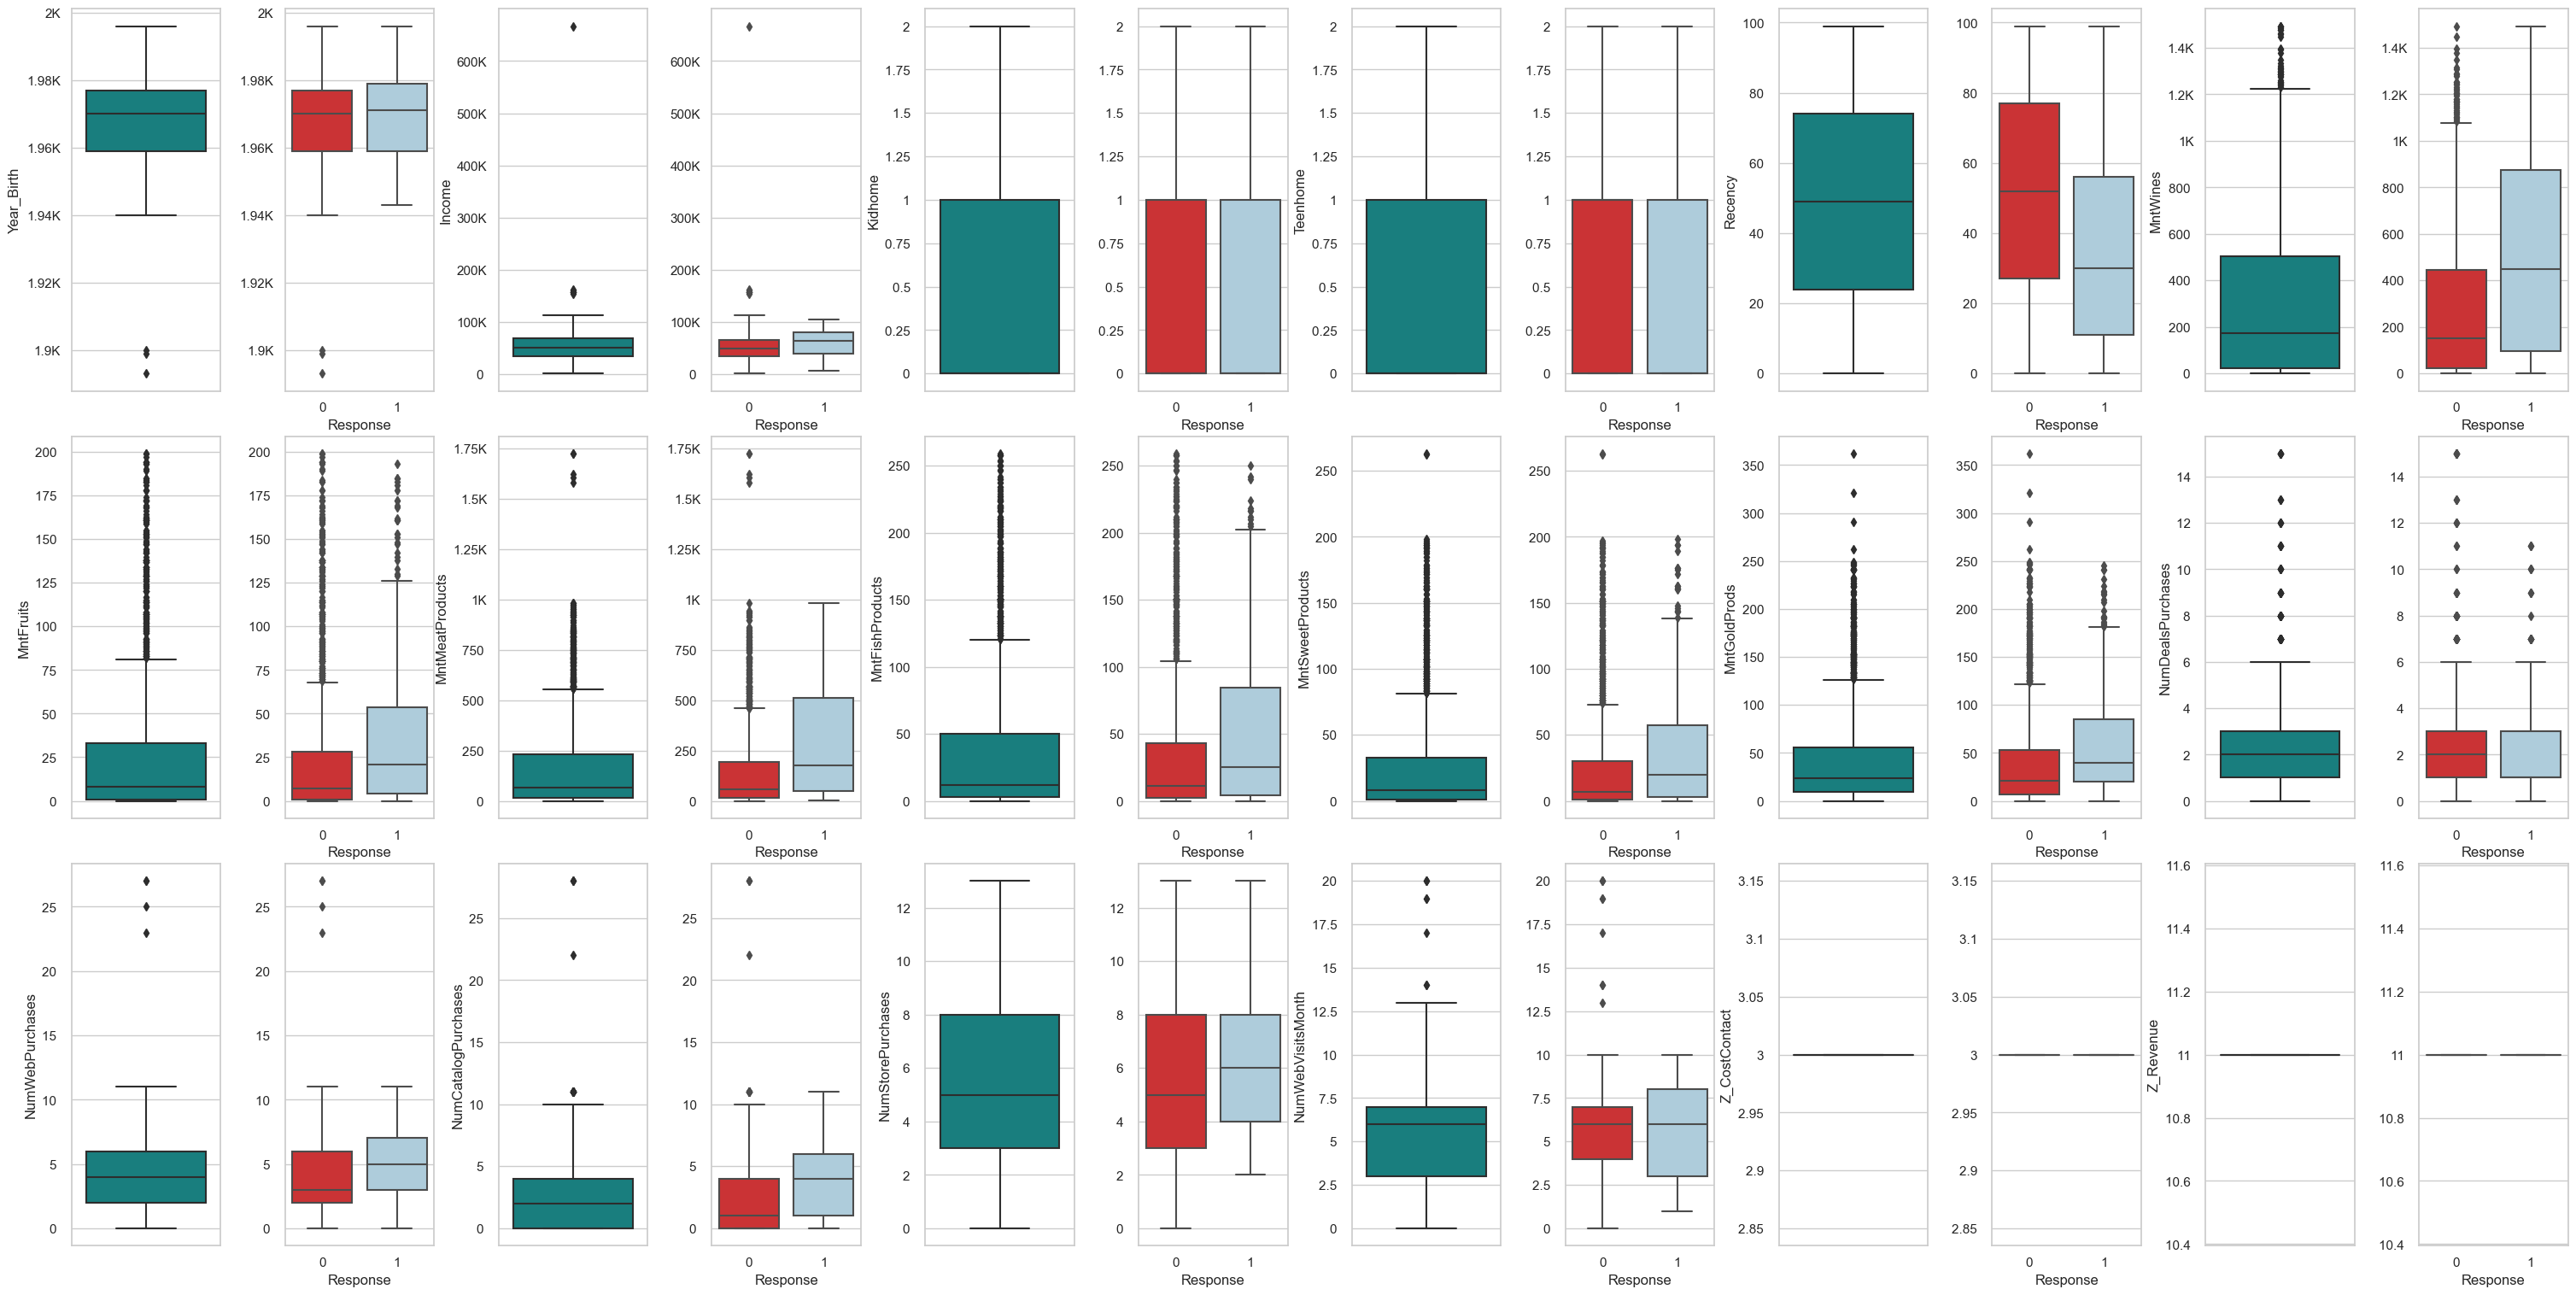

In [39]:
from math import log10, floor
def format_func(value, tick_number=None):
    num_thousands = 0 if abs(value) < 1000 else floor (log10(abs(value))/3)
    value = round(value / 1000**num_thousands, 2)
    return f'{value:g}'+' KMGTPEZY'[num_thousands]

plt.figure(figsize=(30, 15))
n = 3
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(num_cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+1)
    sns.boxplot(y=df[num_cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(num_cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[num_cols[j]], orient='v', palette=colors)
    
    ax2.yaxis.set_major_formatter(plt.FuncFormatter(format_func))
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

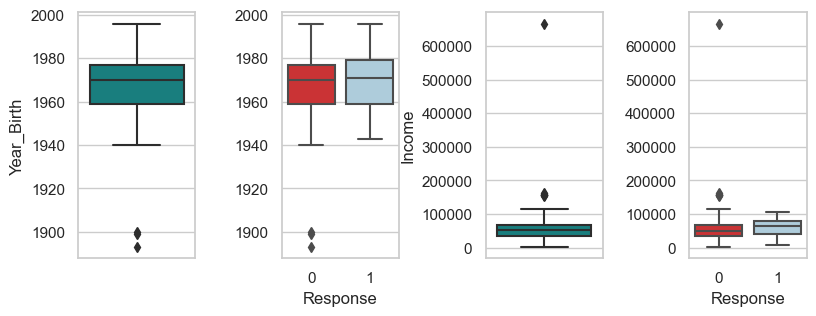

In [40]:
cols = ["Year_Birth","Income"]

plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [41]:
df[["Year_Birth", "Income"]].describe()

Year_Birth         Income
count  2240.000000    2240.000000
mean   1968.805804   52266.220089
std      11.984069   25129.051708
min    1893.000000    1730.000000
25%    1959.000000   35376.000000
50%    1970.000000   51381.500000
75%    1977.000000   68487.000000
max    1996.000000  666666.000000

Karena pada kolom `Year_Birth` memiliki nilai min yang sangat jauh di tahun `1893-1900`

dan `Income` memiliki nilai max yang sangat tinggi sebesar `$666.666`

Maka akan dilakukan Penghapusan rows pada nilai ini agar tidak ada ketimpangan nilai. Ada beberapa metode yang dapat kita lakukan :
- **Handling Oulier**
    - IQR (Interquartile Range)
    - Z-Score
- **Manually Trimmed**

**Choice Determination:**

- Untuk kasus saat ini, akan digunakan metode `Manually Trimmed`, agar menghindari penghapusan data yang terlalu banyak jika menggunakan Handling Outlier
- Adapaun pada kolom lainnya `selain Year_Birth dan Income` yang terdapat outlier tidak kita handle karena akan melalui proses `Normal Distribution Transformation` nantinya yang akan `mereduksi outliernya.`

### **IQR (Interquartile Range)**

IQR to be more robust since outliers are not included in the calculation of percentiles.

In [42]:
# def handling_outliers_iqr(data, cols):
#     q1 = data[cols].quantile(q=0.25)
#     q3 = data[cols].quantile(q=0.75)
#     iqr = q3-q1
#     fence_low  = q1 - 1.5*iqr
#     fence_high = q3 + 1.5*iqr
    
#     lower_outlier = data[data[cols] < fence_low]
#     upper_outlier = data[data[cols] > fence_high]
    
#     filter_outliers = (data[cols] >= fence_low) & (data[cols] <= fence_high)
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df.shape[0])

# for i in cols:
#     df = handling_outliers_iqr(df, i)
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

### **Z-Score**

Z-score is highly dependent on normality. If your data is non-normal (bimodal, extreme outlier, etc) then z-score will give poor results since the outliers are included in the mean and standard deviation calculations.

In [43]:
# from scipy import stats
# def handling_outliers_zscore(data, cols):
#     thres = 3
#     mean = np.mean(df[cols])
#     std = np.std(df[cols])
#     zscore = abs((df[cols]-mean)/std)
#     # zscore = abs(stats.zscore(data[cols]))
    
#     outlier = data[zscore >= thres]
    
#     filter_outliers = zscore < thres # negative value none, bcs absolute
#     filtered = data[filter_outliers]
#     return filtered

# cols = ["Year_Birth","Income"]
# print("Jumlah data sebelum handling outliers :", df.shape[0])

# for i in cols:
#     df = handling_outliers_zscore(df, i) 
#     print("Jumlah data setelah handling outliers ({}) : {}".format(i, df.shape[0]))

### **Manually Trimmed**

- Kolom `Year_Birth`, menghapus nilai yang sangat jauh di tahun `1893-1900`
- Kolom `Income` menghapus nilai yang sangat tinggi sebesar `$666.666`

In [44]:
print("Jumlah data sebelum handling outliers :", df.shape[0])

df = df[~(df["Year_Birth"] <= 1900)]
print("Jumlah data setelah handling outliers (Year_Birth) : {}".format(df.shape[0]))

df = df[~(df["Income"] >= 666666)]
print("Jumlah data setelah handling outliers (Income) : {}".format(df.shape[0]))

Jumlah data sebelum handling outliers : 2240
Jumlah data setelah handling outliers (Year_Birth) : 2237
Jumlah data setelah handling outliers (Income) : 2236


In [45]:
df[["Year_Birth", "Income"]].describe()

Year_Birth         Income
count  2236.000000    2236.000000
mean   1968.898032   51980.909213
std      11.703281   21518.486256
min    1940.000000    1730.000000
25%    1959.000000   35335.500000
50%    1970.000000   51371.000000
75%    1977.000000   68468.250000
max    1996.000000  162397.000000

**Mengecek hasil Trimmed / Drop Outliers**

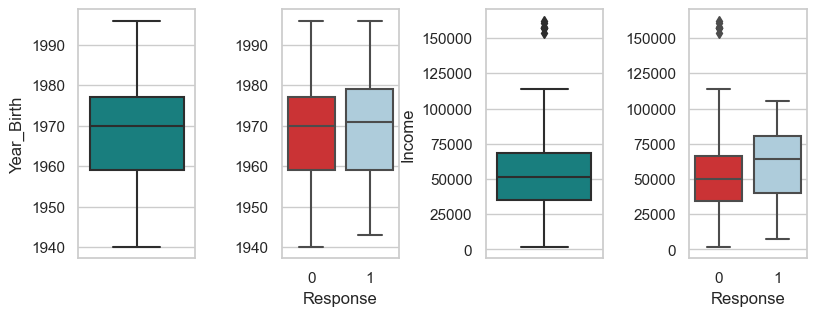

In [46]:
plt.figure(figsize=(8, 3))
n = 1
j = 0

colors=["#e31a1c", "#a6cee3"]

for i in range(0, len(cols)*2, 2):
    ax1 = plt.subplot(n, math.ceil(len(cols)*2/n), i+1)
    sns.boxplot(y=df[cols[j]], color='#088F8F', orient='v')
    
    ax2 = plt.subplot(n, math.ceil(len(cols)*2/n), i+2, sharey=ax1)
    sns.boxplot(x=df["Response"], y=df[cols[j]], orient='v', palette=colors)
    
    ax2.set_ylabel(None)
    
    plt.tight_layout(pad=0.1)
    
    j+=1

In [47]:
df.reset_index(drop=True, inplace=True)

### **Kesimpulan**
Berdasarkan hasil perhitungan menggunakan `Z-score` dan juga `IQR`, dapat diketahui bahwa jumlah baris yang dihapus dari `Year_Birth` dan `Income` berdasarkan `IQR` untuk kolom  tidak jauh berbeda dibandingkan dengan `Z-score`, yaitu :
- IQR :
    - Jumlah data sebelum handling outliers : 2240
    - Jumlah data setelah handling outliers (Year_Birth) : 2237
    - Jumlah data setelah handling outliers (Income) : 2229

- Z_Score :
    - Jumlah data sebelum handling outliers : 2240
    - Jumlah data setelah handling outliers (Year_Birth) : 2237
    - Jumlah data setelah handling outliers (Income) : 2229

Namun, karena kita ingin meminimalisasi penghapusan data maka untuk proses ini kita memiliki `Manually Trimmed` agar tidak terlalu banyak data yang dihapus, jadi hanya berfokus pada data yang memiliki jauh yang sangat tinggi

- Jumlah data sebelum handling outliers : 2240
- Jumlah data setelah handling outliers (Year_Birth) : 2237
- Jumlah data setelah handling outliers (Income) : 2236

## **📌 Feature Engineering / Extraction**

Kita akan melakukan Calculation, Extraction, dan Binning features :
- Age Customer
- Age Group
- Has Child
- Dependents
- Month Customer (Lifetime)
- Spending
- Primer and Tersier product
- Total of Purchases
- Total_Cmp (Accepted Campaign 1-5)
- Ever_Accept (Accepted Campaign 1-5)
- Total Revenue
- Income Segment
- Conversion Rate Web
- Month Joined
- Recency Segment

**Membuat Kolom `Umur / Age`**

Berdasarkan data diketahui basis tahunnya : SAS Institute, 2014

In [48]:
# currentYear = datetime.now().year
currentYear = 2014 # based on data
df['Age'] = currentYear - df['Year_Birth']

**Membuat Kolom `Age Group`** 

[source age group](https://www.google.com/url?sa=i&url=https%3A%2F%2Fwww.semanticscholar.org%2Fpaper%2FHuman-Age-Group-Classification-Using-Facial-Bhat-V.K.Patil%2F19ddb412336ce633c1fe21544605c7bd65ff8d66&psig=AOvVaw3Sm17zYYJRrkisQVRyg4rf&ust=1684919686463000&source=images&cd=vfe&ved=0CBMQjhxqFwoTCJDXlY2Ni_8CFQAAAAAdAAAAABAI)

<div>
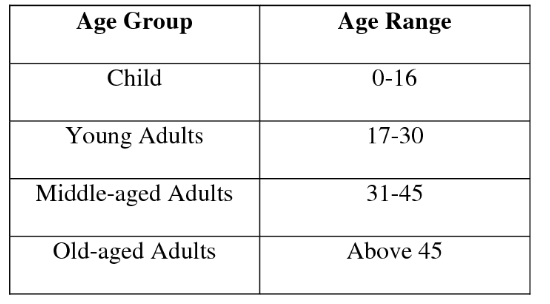
</div>

Akan disederhanakan lagi :
- Young Adult < 30
- Adult 30-45 Tahun
- Senior Adult > 45 tahun

In [49]:
def age_group(x):
    if x > 45:
        grup = 'Senior Adult'
    elif x > 30:
        grup = 'Adult'
    else:
        grup = 'Young Adult'
    
    return grup

df['Age_group'] = df["Age"].apply(lambda x: age_group(x))

**Membuat Kolom `Has_child`**

Menggabungkan Kidhome dan Teenhome menjadi feature Has_child, yang mana hasil penjumlahannya yang memiliki anak minimal 1

In [50]:
df['Has_child'] = np.where(df["Kidhome"]+df["Teenhome"] > 0, 1, 0)

**Membuat Kolom `Dependents`**

Jumlah tanggungan dari customer, dari penjumlahan Kidhome dan Teenhome

In [51]:
df['Dependents'] = df['Kidhome'] + df['Teenhome']

**Membuat Kolom `Lifetime`**

Sudah berapa bulan customer sejak pembelian pertama di supermarket

In [52]:
df['Lifetime'] = (2014 - df["Dt_Customer"].dt.year)*12 + df["Dt_Customer"].dt.month

**Membuat Kolom `Spending`**

Jumlah pembelian tiap customer pada keseluruhan product

In [53]:
df['Spending']=df['MntWines']+ \
    df['MntFruits']+ \
    df['MntMeatProducts']+ \
    df['MntFishProducts']+ \
    df['MntSweetProducts']+ \
    df['MntGoldProds']

**Membuat Kolom `Primer and Tersier product`**

Jumlah pembelian tiap customer pada kelompok primer dan tersier product

In [54]:
# primer and tersier product
df['Primer_purchase'] = df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']
df['Tersier_purchase'] = df['MntWines']+df['MntSweetProducts']+df["MntGoldProds"]

**Membuat Kolom `Total of Purchases`**

In [55]:
df['Total_Purchases'] = df['NumDealsPurchases'] + \
    df['NumWebPurchases'] + \
    df['NumCatalogPurchases'] + \
    df['NumStorePurchases']

**Membuat Kolom `Total_Cmp`**

Berapa kali tiap customer merespon ke 5 campign yang dilaksanakan (AcceptedCmp 1 - 5)

In [56]:
df['Total_Cmp']=df['AcceptedCmp1'].astype("int64")+ \
    df['AcceptedCmp2'].astype("int64")+ \
    df['AcceptedCmp3'].astype("int64")+ \
    df['AcceptedCmp4'].astype("int64")+ \
    df['AcceptedCmp5'].astype("int64")

**Membuat Kolom `Ever_Accept`**

Apakah Customer pernah minimal sekali menerima campign atau tidak pernah sama sekali

In [57]:
df['Ever_Accept']=df['Total_Cmp'].apply(lambda x : 1 if x >= 1 else 0)

**Membuat Kolom `Total Revenue`**

Jumlah Campaign yang diresponse/accept (Campaign 1-5) dikali dengan revenue = 11

In [58]:
# total revenue
df['Total_revenue'] = (df['Total_Cmp']) * df['Z_Revenue']
df[['Z_Revenue', 'Total_revenue']].sample(5)

Z_Revenue  Total_revenue
1610         11              0
4            11              0
251          11              0
1275         11             11
589          11              0

**Membuat Kolom `Income Segmentation`**

- None -> Missing values
- High -> >= q3(68468)
- Medium -> q1(35335) - q3(68468)
- Low -> < q1(35335)

In [59]:
Q1 = df["Income"].quantile(.25)
print(Q1)
Q3 = df["Income"].quantile(.75)
print(Q3)

def income_sgmt(x):
    if (x is None) or (type(x) not in [int, float]) :
        segment = "None"
    else:
        if x >= Q3:
            segment = "High"
        elif x < Q3 and x >= Q1:
            segment = "Medium"
        else:
            segment = "Low"
    return segment

df["Income_sgmt"] = df["Income"].fillna("None")
df["Income_sgmt"] = df["Income_sgmt"].apply(lambda x: income_sgmt(x))

35335.5
68468.25


In [60]:
df["Income_sgmt"].unique()

array(['Medium', 'High', 'Low'], dtype=object)

**Membuat Kolom `Conversion Rate Web`**

Perbandingan Total Purchases dengan Jumlah Pengunjung Website

In [61]:
df['Conversion_rate_web'] = np.round(df['Total_Purchases'] / df['NumWebVisitsMonth'], 2)
df['Conversion_rate_web'].fillna(0, inplace=True)
df['Conversion_rate_web'].replace([np.inf, -np.inf], 0, inplace=True)

**Membuat Kolom `Month Joined`**

Membuat kolom extraction month dari tanggal Customer pertama kali berbelanja

Note : Untuk nilai tahun tidak digunakan karena berpotensi bias karena dari nilai nya akan increasing tiap waktu, sedangkan month akan repeat pada tiap periode

In [62]:
df['Month_joined'] = df['Dt_Customer'].dt.month

**Membuat Kolom `Recency_sgmt`**

In [63]:
np.sort(df['Recency'].unique())

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64)

In [64]:
num_score = 5
cek = pd.qcut(df['Recency'].unique(), num_score, labels=range(num_score, 0, -1))
cek = pd.DataFrame({
    "value":df['Recency'].unique(),
    "score": cek
})

cek.groupby(['score'])[['value']] \
    .agg(['min', 'max']).sort_index(ascending=False) \
    .style.background_gradient(cmap='Reds')

In [65]:
divided = {5: 19, 4: 39, 3: 59, 2: 79}
 
def RScore(x,d):
    if x <= d[5]:
        return 4
    elif x <= d[4]:
        return 3
    elif x <= d[3]: 
        return 2
    elif x <= d[2]: 
        return 1
    else:
        return 0

df['Recency_sgmt'] = df['Recency'].apply(lambda x: RScore(x, divided))
df.groupby(['Recency_sgmt'])[['Recency']].agg(['min', 'max', 'count']).style.background_gradient(cmap='Reds')

Perkiraan pembagian dengan rentang 19 Hari:
- 4 score -> setengah bulan
- 3 score -> 1 bulan
- 2 score -> 1 setengah bulan
- 1 score -> 2 bulan
- 0 score -> 3 bulan

**Mengecek nilai Extraction**

In [66]:
df.sample(5)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
233   3233        1965         PhD        Married  62745.0        0         1   
1837  9576        1982         PhD        Married  32313.0        1         0   
392   3428        1991         PhD        Married  68682.0        0         0   
763   5331        1977  Graduation        Married  74985.0        0         0   
820   3855        1963  Graduation        Married  22419.0        0         0   

     Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
233   2013-03-23       89       562         21              464   
1837  2013-02-11       60        86          4               56   
392   2013-10-06       56       919          0              505   
763   2012-09-11        8       587         51              898   
820   2013-04-18       74        30          3               47   

      MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
233                28                10            32                  3   
1837                2                 4             7                  3   
392                99                30            45                  1   
763               247                 0            86                  1   
820                19                21            42                  1   

      NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
233                 7                    8                 11   
1837                4                    0                  4   
392                 4                    9                 10   
763                 3                    6                  7   
820                 3                    2                  2   

      NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  \
233                   5             0             0             0   
1837                  9             0             0             0   
392                   2             0             0             0   
763                   2             0             0             0   
820                   8             0             0             0   

      AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  \
233              0             0         0              3         11   
1837             0             0         0              3         11   
392              0             0         0              3         11   
763              0             0         0              3         11   
820              0             0         0              3         11   

      Response  Age     Age_group  Has_child  Dependents  Lifetime  Spending  \
233          0   49  Senior Adult          1           1        15      1117   
1837         0   32         Adult          1           1        14       159   
392          0   23   Young Adult          0           0        22      1598   
763          0   37         Adult          0           0        33      1869   
820          0   51  Senior Adult          0           0        16       162   

      Primer_purchase  Tersier_purchase  Total_Purchases  Total_Cmp  \
233               513               604               29          0   
1837               62                97               11          0   
392               604               994               24          0   
763              1196               673               17          0   
820                69                93                8          0   

      Ever_Accept  Total_revenue Income_sgmt  Conversion_rate_web  \
233             0              0      Medium                 5.80   
1837            0              0         Low                 1.22   
392             0              0        High                12.00   
763             0              0        High                 8.50   
820             0              0         Low                 1.00   

      Month_joined  Recency_sgmt  
233              3             0  
1837             2           

**Categorical (String)**

- Education - Basic, Graduation, Master, PhD
- Marital_Status - Single, Married, Divorced
- Age_group - Young Adult, Adult, Senior Adult
- Income_sgmt - High, Medium, Low

**Categorical (Int)**

- ID
- Kidhome - 0, 1, 2
- Teenhome - 0, 1, 2
- AcceptedCmp1 - 0, 1
- AcceptedCmp2 - 0, 1
- AcceptedCmp3 - 0, 1
- AcceptedCmp4 - 0, 1
- AcceptedCmp5 - 0, 1
- Ever_Accept - 0, 1
- Complain - 0, 1
- Response - 0, 1
- Has_child - 0, 1
- Recency_sgmt - 0, 1, 2, 3, 4

**Numericals**

- Year_Birth = 1940 - 1996
- Income = 1730.0 - 162397.0
- Kidhome = 0 - 2
- Teenhome = 0 - 2
- Recency = 0 - 99
- Age = 18 - 74
- Dependents = 0 - 3
- Lifetime = 1 - 36
- Spending = 5 - 2525
- Primer_purchase = 1 - 1727
- Tersier_purchase = 3 - 1689
- Total_Purchases = 0 - 44
- NumWebVisitsMonth = 0 - 20
- Conversion_rate_web = 0.0 - 43.0
- Total_Cmp = 0 - 4
- Total_revenue = 0 - 44
- Month_joined = 1 - 12

**Numericals (one)**

- Z_CostContact = 3
- Z_Revenue = 11

**Numericals (Product)**

- MntWines = 0 - 1493
- MntFruits = 0 - 199
- MntMeatProducts = 0 - 1725
- MntFishProducts = 0 - 259
- MntSweetProducts = 0 - 263
- MntGoldProds = 0 - 362

**Numericals (Purchases)**

- NumDealsPurchases = 0 - 15
- NumWebPurchases = 0 - 27
- NumCatalogPurchases = 0 - 28
- NumStorePurchases = 0 - 13

**Timestamp**
- Dt_Customer = 2012-07-30 - 2014-06-29

In [67]:
cat_str = ['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']
cat_int = ['ID', 'Kidhome', 'Teenhome', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 
           'Ever_Accept', 'Complain', 'Response', 'Has_child', 'Recency_sgmt']

num = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'Age', 'Dependents', 'Lifetime', 'Spending', 
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'NumWebVisitsMonth', 'Conversion_rate_web', 
       'Total_Cmp', 'Total_revenue', 'Month_joined']

num_one = ['Z_CostContact', 'Z_Revenue']

num_product = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
num_purchases = ['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']

timestamp = ["Dt_Customer"]

Mengecek Kolom di pembagian type

In [68]:
allcol = cat_str + cat_int + num + num_one + num_product + num_purchases + timestamp
for i in df:
    if i not in allcol:
        print(i)

In [69]:
#cek unique value
cat_cols = cat_str+cat_int
for x in cat_cols: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

num_cols = num + num_one + num_product + num_purchases
for x in num_cols + timestamp: 
    print("{} = {} - {}".format(x, min(df[x]), max(df[x])))

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']

===== ID =====
[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, '.....']

===== Kidhome =====
[0, 1, 2]

===== Teenhome =====
[0, 1, 2]

===== AcceptedCmp1 =====
[0, 1]

===== AcceptedCmp2 =====
[0, 1]

===== AcceptedCmp3 =====
[0, 1]

===== AcceptedCmp4 =====
[0, 1]

===== AcceptedCmp5 =====
[0, 1]

===== Ever_Accept =====
[0, 1]

===== Complain =====
[0, 1]

===== Response =====
[1, 0]

===== Has_child =====
[0, 1]

===== Recency_sgmt =====
[2, 3, 0, 4, 1]

Year_Birth = 1940 - 1996
Income = 1730.0 - 162397.0
Kidhome = 0 - 2
Teenhome = 0 - 2
Recency = 0 - 99
Age = 18 - 74
Dependents = 0 - 3
Lifetime = 1 - 36
Spending = 5 - 2525
Primer_purchase = 1 - 1727
Tersier_purchase = 3 - 1689
Total_Purchases = 0 - 44
NumWebVisitsMonth = 0 - 20
Conv

In [70]:
new_cols = list(df.columns.values)
new_cols.remove("Response")
new_cols.append("Response")
df = df[new_cols].copy()

In [71]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Age',
       'Age_group', 'Has_child', 'Dependents', 'Lifetime', 'Spending',
       'Primer_purchase', 'Tersier_purchase', 'Total_Purchases', 'Total_Cmp',
       'Ever_Accept', 'Total_revenue', 'Income_sgmt', 'Conversion_rate_web',
       'Month_joined', 'Recency_sgmt', 'Response'],
      dtype='object')

## **📌 Feature Transformation (Numeric)**

Mengecek Skewness di tiap kolom untuk menentukan jenis Transformation

In [72]:
skew_type_list = []
skew_val_list = []
kurtosis_val_list = []

for column in num_cols:
    data = df[column].dropna(axis=0)
    q1 = data.quantile(q=0.25)
    mean = round(data.mean(), 3)
    median = data.median()
    mode = data.mode()[0]
    q3 = data.quantile(q=0.75)
    # skew_val = round(data.skew(),3)
    skew_val = round(skew(data, nan_policy="omit"),3)
    kurtosis_val = round(kurtosis(data, nan_policy="omit"),3)

    if (mean == median == mode) or (-0.2 < skew_val < 0.2):
        skew_type = "Normal Distribution (Symmetric)"
    elif mean < median < mode:
        skew_type = "Negatively Skewed"
        if skew_val <= -1:
            skew_type = "Highly Negatively Skewed"
        elif -0.5 >= skew_val > -1:
            skew_type = "Moderately Negatively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    else:
        skew_type = "Positively Skewed"
        if skew_val >= 1:
            skew_type = "Highly Positively Skewed"
        elif 0.5 <= skew_val < 1:
            skew_type = "Moderately Positively Skewed"
        else :
            skew_type = "Moderately Normal Distribution (Symmetric)"
    skew_type_list.append(skew_type)
    skew_val_list.append(skew_val)
    kurtosis_val_list.append(kurtosis_val)
            
dist = pd.DataFrame({
    "Column Name":num_cols,
    "Skewness": skew_val_list,
    "Kurtosis": kurtosis_val_list,
    "Type of Distribution": skew_type_list
})

# for bimodial and Uniform

dist.loc[dist["Column Name"].isin(["Z_CostContact", "Z_Revenue"]), "Type of Distribution"] = "Uniform Distribution"
dist.loc[dist["Column Name"].isin(["Kidhome", "Teenhome"]), "Type of Distribution"] = "Bimodal Distribution"
dist = dist.sort_values(["Type of Distribution","Column Name"]).reset_index(drop=True)
dist

C:\Users\nurim\AppData\Local\Temp\ipykernel_18840\1677991082.py:13: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_18840\1677991082.py:14: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_18840\1677991082.py:13: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

C:\Users\nurim\AppData\Local\Temp\ipykernel_18840\1677991082.py:14: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.



Column Name  Skewness  Kurtosis  \
0               Kidhome     0.636    -0.779   
1              Teenhome     0.406    -0.987   
2   Conversion_rate_web     2.332     6.442   
3       MntFishProducts     1.919     3.086   
4             MntFruits     2.103     4.058   
5          MntGoldProds     1.884     3.548   
6       MntMeatProducts     2.084     5.515   
7      MntSweetProducts     2.134     4.360   
8              MntWines     1.175     0.597   
9   NumCatalogPurchases     1.880     8.030   
10    NumDealsPurchases     2.417     8.910   
11      NumWebPurchases     1.380     5.681   
12      Primer_purchase     1.588     2.214   
13            Total_Cmp     2.721     7.971   
14        Total_revenue     2.721     7.971   
15           Dependents     0.415    -0.252   
16               Income     0.352     0.709   
17    NumWebVisitsMonth     0.208     1.816   
18      Total_Purchases     0.250    -0.895   
19    NumStorePurchases     0.700    -0.626   
20             Spending     0.860    -0.343   
21     Tersier_purchase     0.972     0.045   
22                  Age     0.092    -0.797   
23             Lifetime     0.061    -1.003   
24         Month_joined     0.001    -1.277   
25              Recency    -0.004    -1.202   
26           Year_Birth    -0.092    -0.797   
27        Z_CostContact       NaN       NaN   
28            Z_Revenue       NaN       NaN   

                          Type of Distribution  
0                         Bimodal Distribution  
1                         Bimodal Distribution  
2                     Highly Positively Skewed  
3                     Highly Positively Skewed  
4                     Highly Positively Skewed  
5                     Highly Positively Skewed  
6                     Highly Positively Skewed  
7                     Highly Positively Skewed  
8                     Highly Positively Skewed  
9                     Highly Positively Skewed  
10                    Highly Positively Skewed  
11                    Highly Positively Skewed  
12                    Highly Positively Skewed  
13                    Highly Positively Skewed  
14                    Highly Positively Skewed  
15  Moderately Normal Distribution (Symmetric)  
16  Moderately Normal Distribution (Symmetric)  
17  Moderately Normal Distribution (Symmetric)  
18  Moderately Normal Distribution (Symmetric)  
19                Moderately Positively Skewed  
20                Moderately Positively Skewed  
21                Moderately Positively Skewed  
22             Normal Distribution (Symmetric)  
23             Normal Distribution (Symmetric)  
24             Normal Distribution (Symmetric)  
25             Normal Distribution (Symmetric)  
26             Normal Distribution (Symmetric)  
27                        Uniform Distribution  
28                        Uniform Distribution

In [73]:
exclude = ["Kidhome", "Teenhome", "Dependents", "Total_Cmp"]

log_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Positively Skewed") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

norm_cols = sorted(list(dist[
    dist["Type of Distribution"].str.contains("Normal Distribution") & 
    ~dist["Column Name"].isin(exclude)
]["Column Name"].values))

print("Log Transformation =", log_cols)
print("Normalisasi/Standardization =", norm_cols)

Log Transformation = ['Conversion_rate_web', 'MntFishProducts', 'MntFruits', 'MntGoldProds', 'MntMeatProducts', 'MntSweetProducts', 'MntWines', 'NumCatalogPurchases', 'NumDealsPurchases', 'NumStorePurchases', 'NumWebPurchases', 'Primer_purchase', 'Spending', 'Tersier_purchase', 'Total_revenue']
Normalisasi/Standardization = ['Age', 'Income', 'Lifetime', 'Month_joined', 'NumWebVisitsMonth', 'Recency', 'Total_Purchases', 'Year_Birth']


Dari hasil temuan, kita dapat menentukan beberapa transformasi yang akan kita lakukan :
- **Scaling and Converting to a Normal Distribution :**
    - log Transformation
    - Box-Cox Transformation
    - Yeo-Johnson Transformation
    
    **Adapun daftar column yang akan kita transform pada proses ini :**
        - Conversion_rate_web
        - MntFishProducts
        - MntFruits
        - MntGoldProds
        - MntMeatProducts
        - MntSweetProducts
        - MntWines
        - NumCatalogPurchases
        - NumDealsPurchases
        - NumStorePurchases
        - NumWebPurchases
        - Primer_purchase
        - Spending
        - Tersier_purchase
        - Total_revenue
    
- **Just Scaling :**
    - Normalization
    - Standardization
    
    **Adapun daftar column yang akan kita transform pada proses ini :**
        - Age
        - Income
        - Lifetime
        - Month_joined
        - NumWebVisitsMonth
        - Recency
        - Total_Purchases
        - Year_Birth

- Sedangkan untuk beberapa kolom yang **tidak perlu melakukan Transformasi** karena rentang nilai yang masih wajar sebagai berikut :
    - Kidhome
    - Teenhome
    - Dependents
    - Total_Cmp

**Choice Determination:**

- Pada proses `Scaling and Converting to a Normal Distribution` ini kita menggunakan `Yeo-Johnson Transformation`, karena dari hasilnya kita bisa melihat hasil bentuk curve yang lebih Normal Distribusi
- Pada proses `Just Scaling` ini kita menggunakan `Normalization` karena lebih robust untuk algoritma yang akan kita gunakan 

### **Log Transformation**

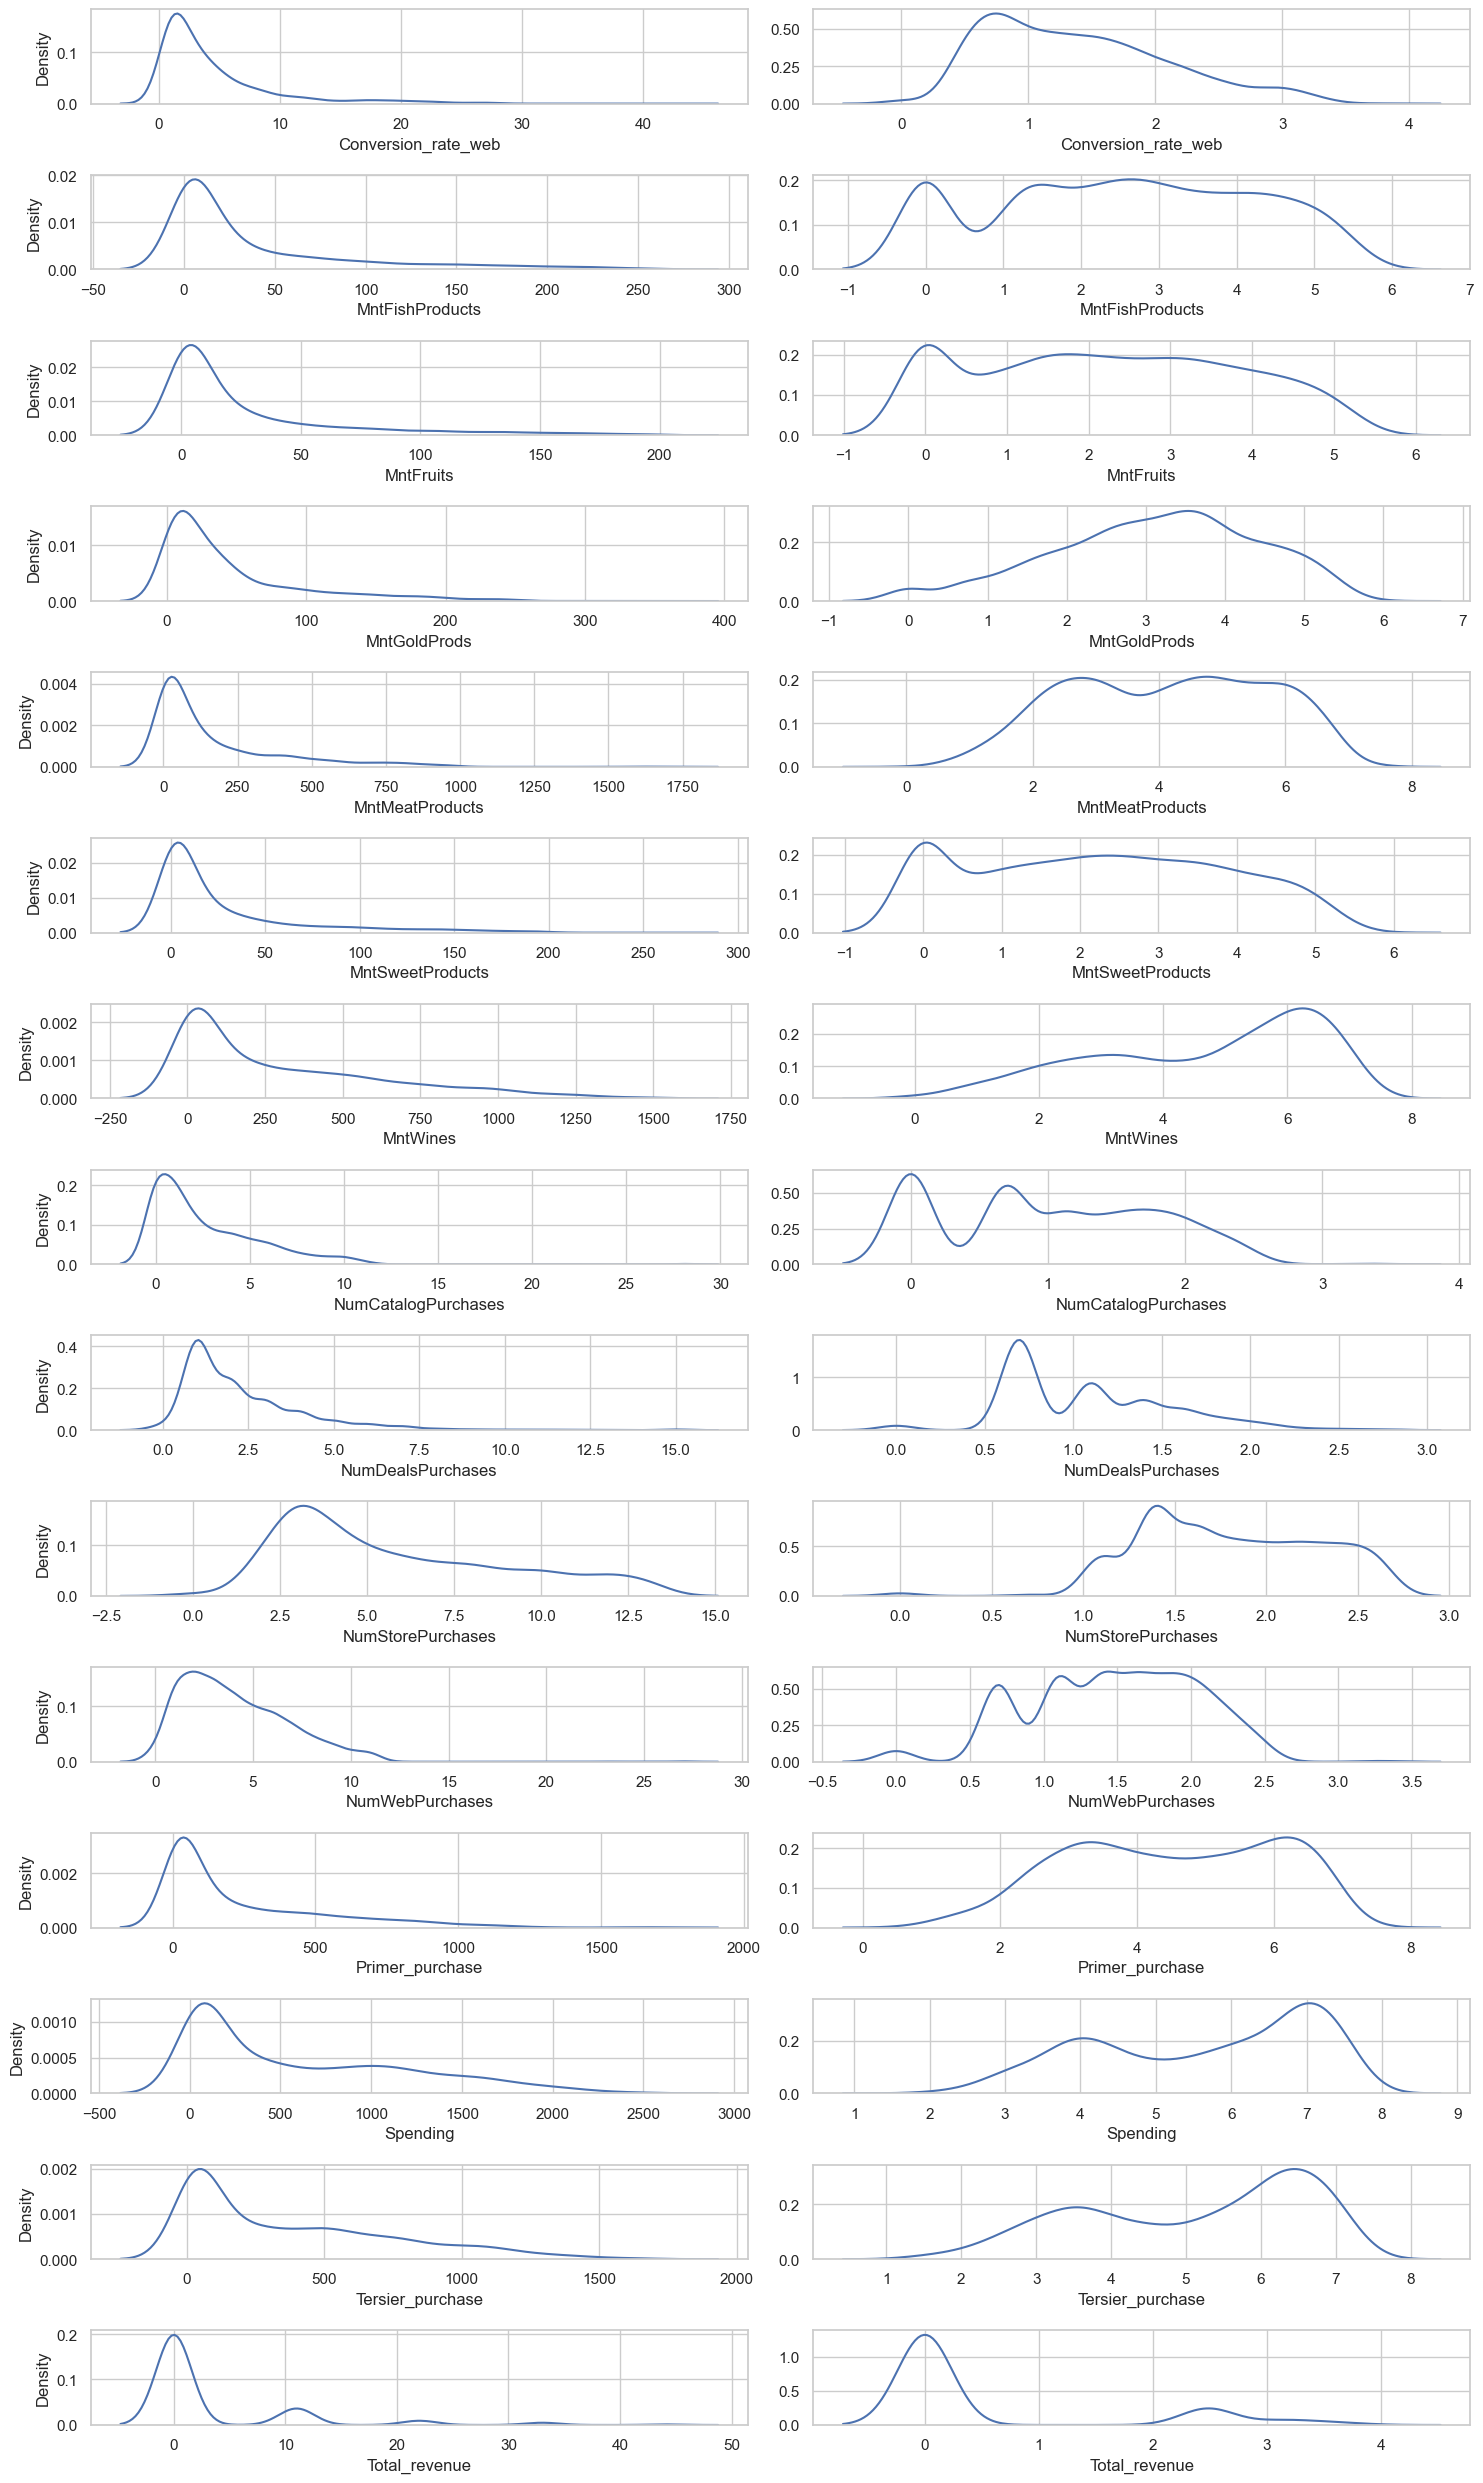

In [74]:
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(np.log(df[log_cols[i]]+1), ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [75]:
# add 1 bcs err : divide by zero encountered in log
# df[log_cols] = np.log(df[log_cols]+1)
# df[log_cols] = np.log1p(df[log_cols])

In [76]:
# df[log_cols].describe()

### **Box-Cox Transformation**

- **with Scipy**

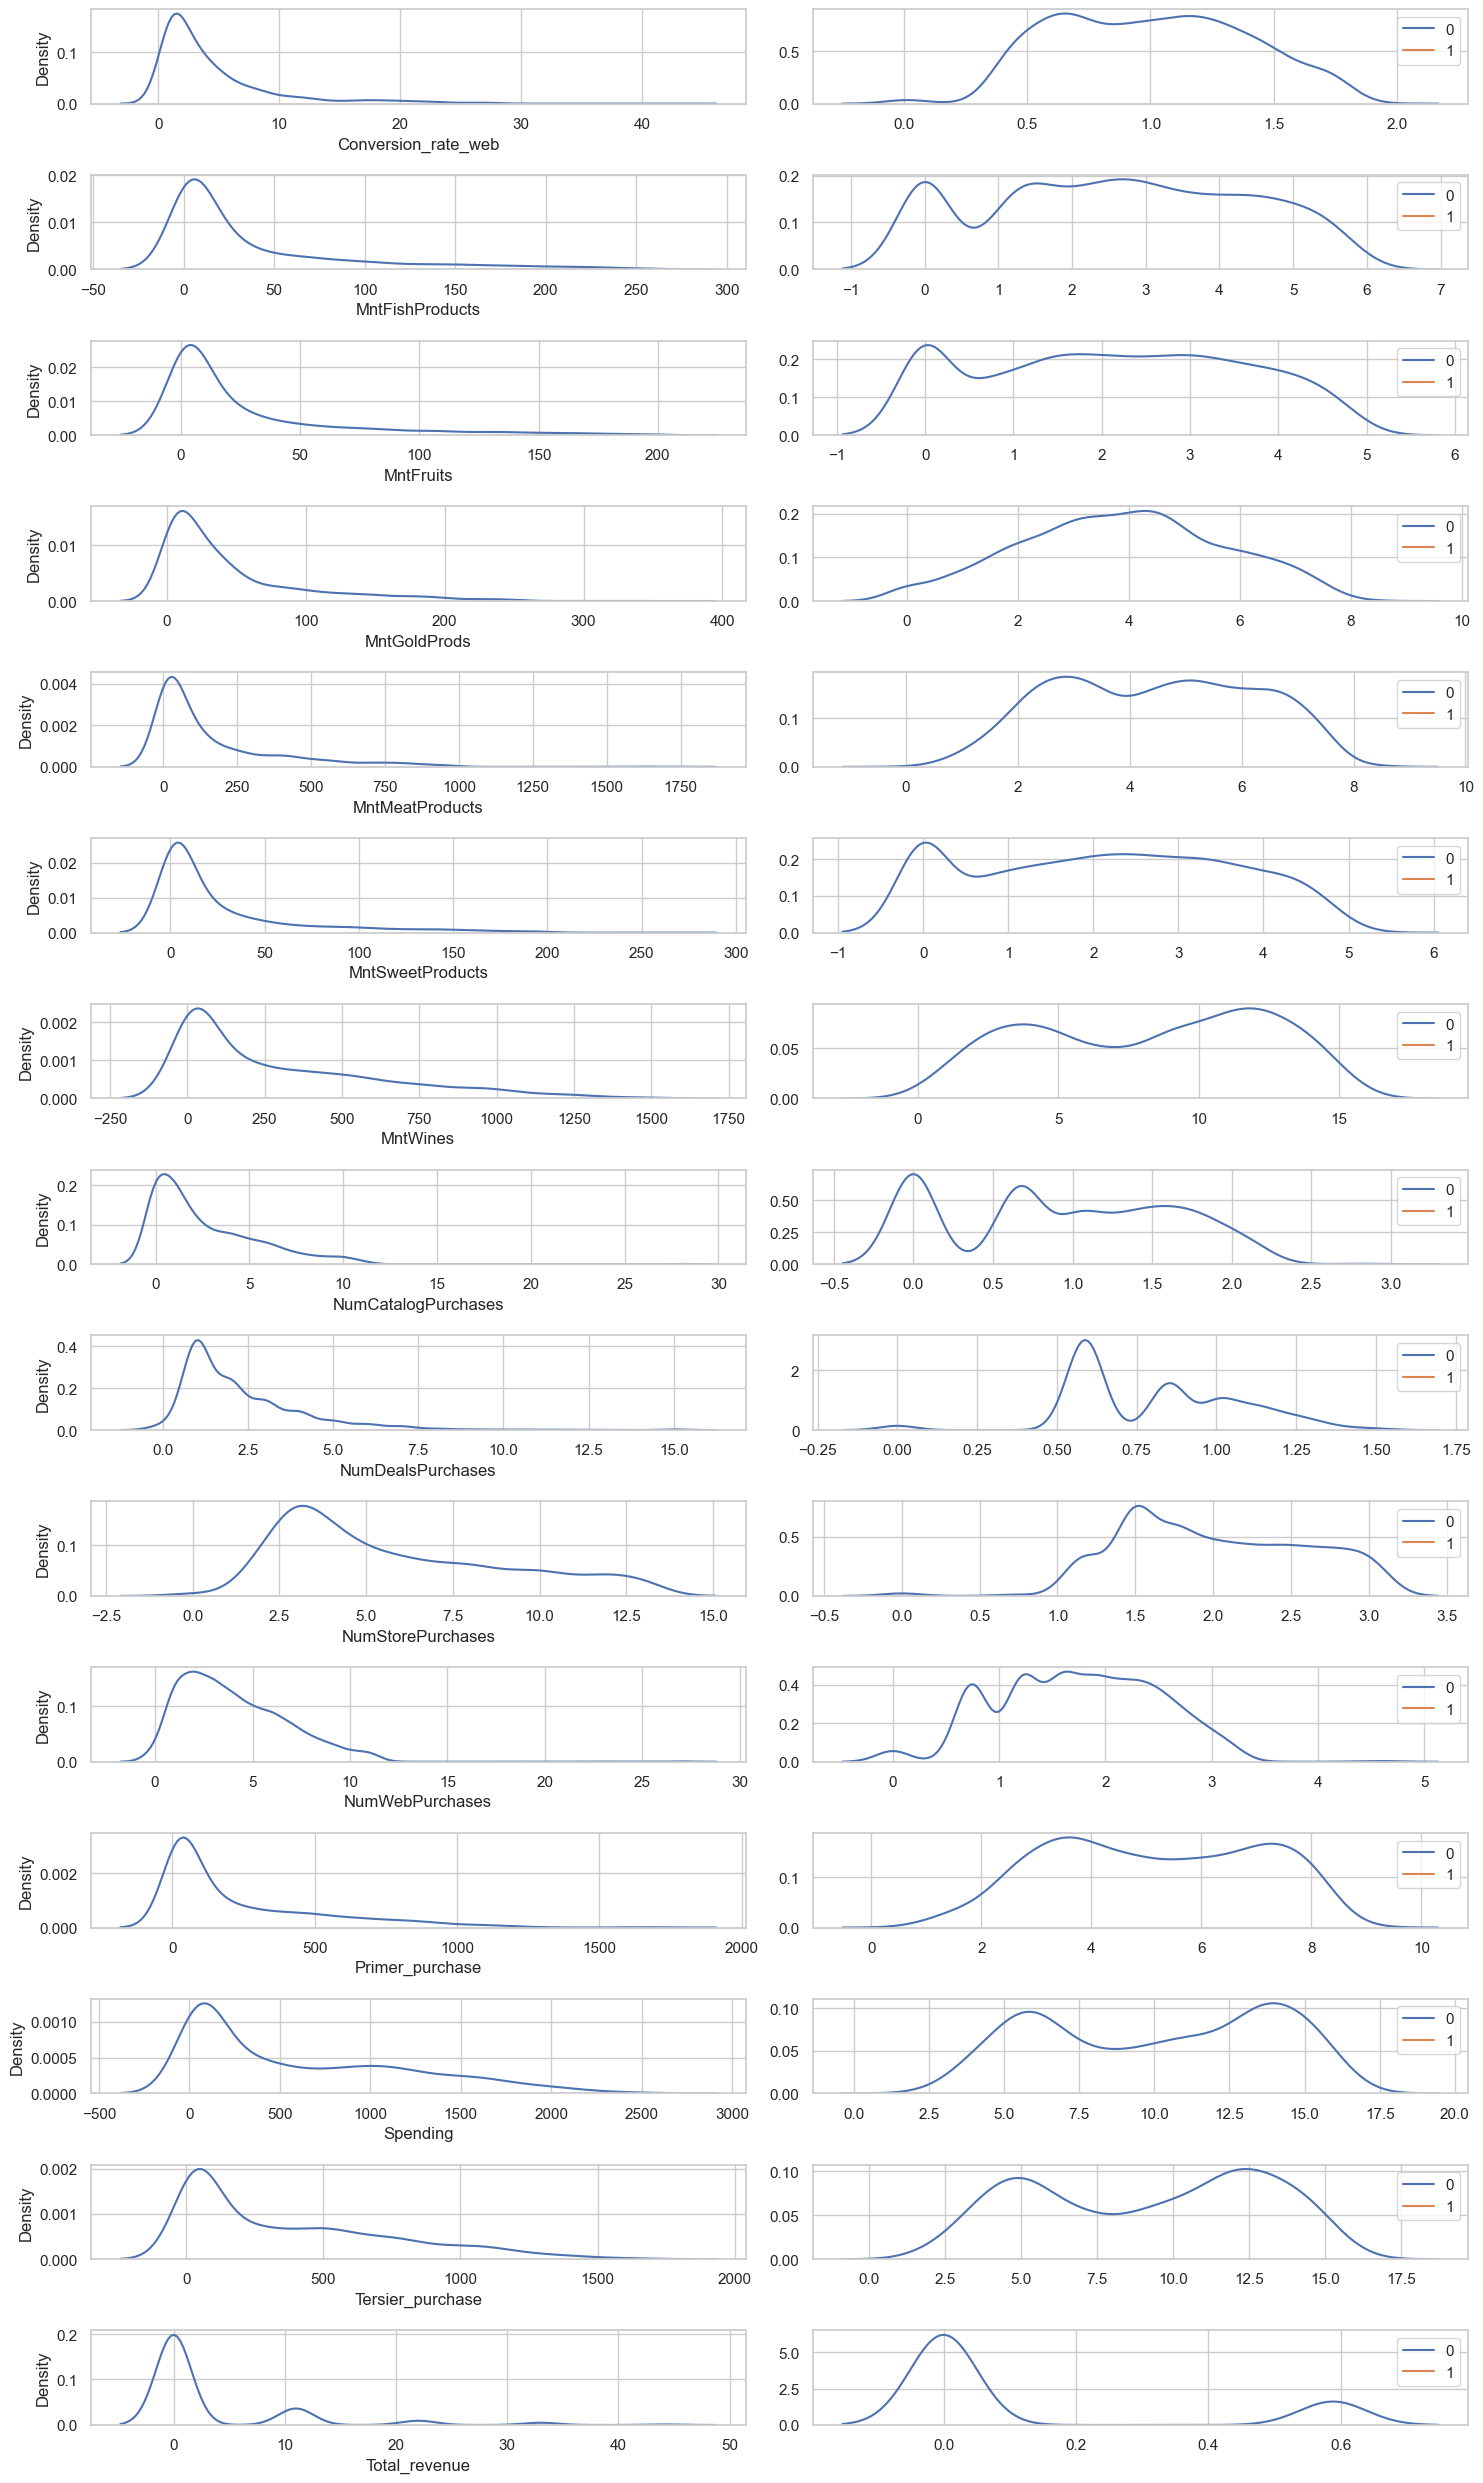

In [77]:
from scipy.stats import boxcox
fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(boxcox(df[log_cols[i]]+1), warn_singular=False, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [78]:
# for i in log_cols:
#     df[i], parameters = boxcox(df[i]+1)

In [79]:
# df[log_cols].describe()

- **with Sklearn**

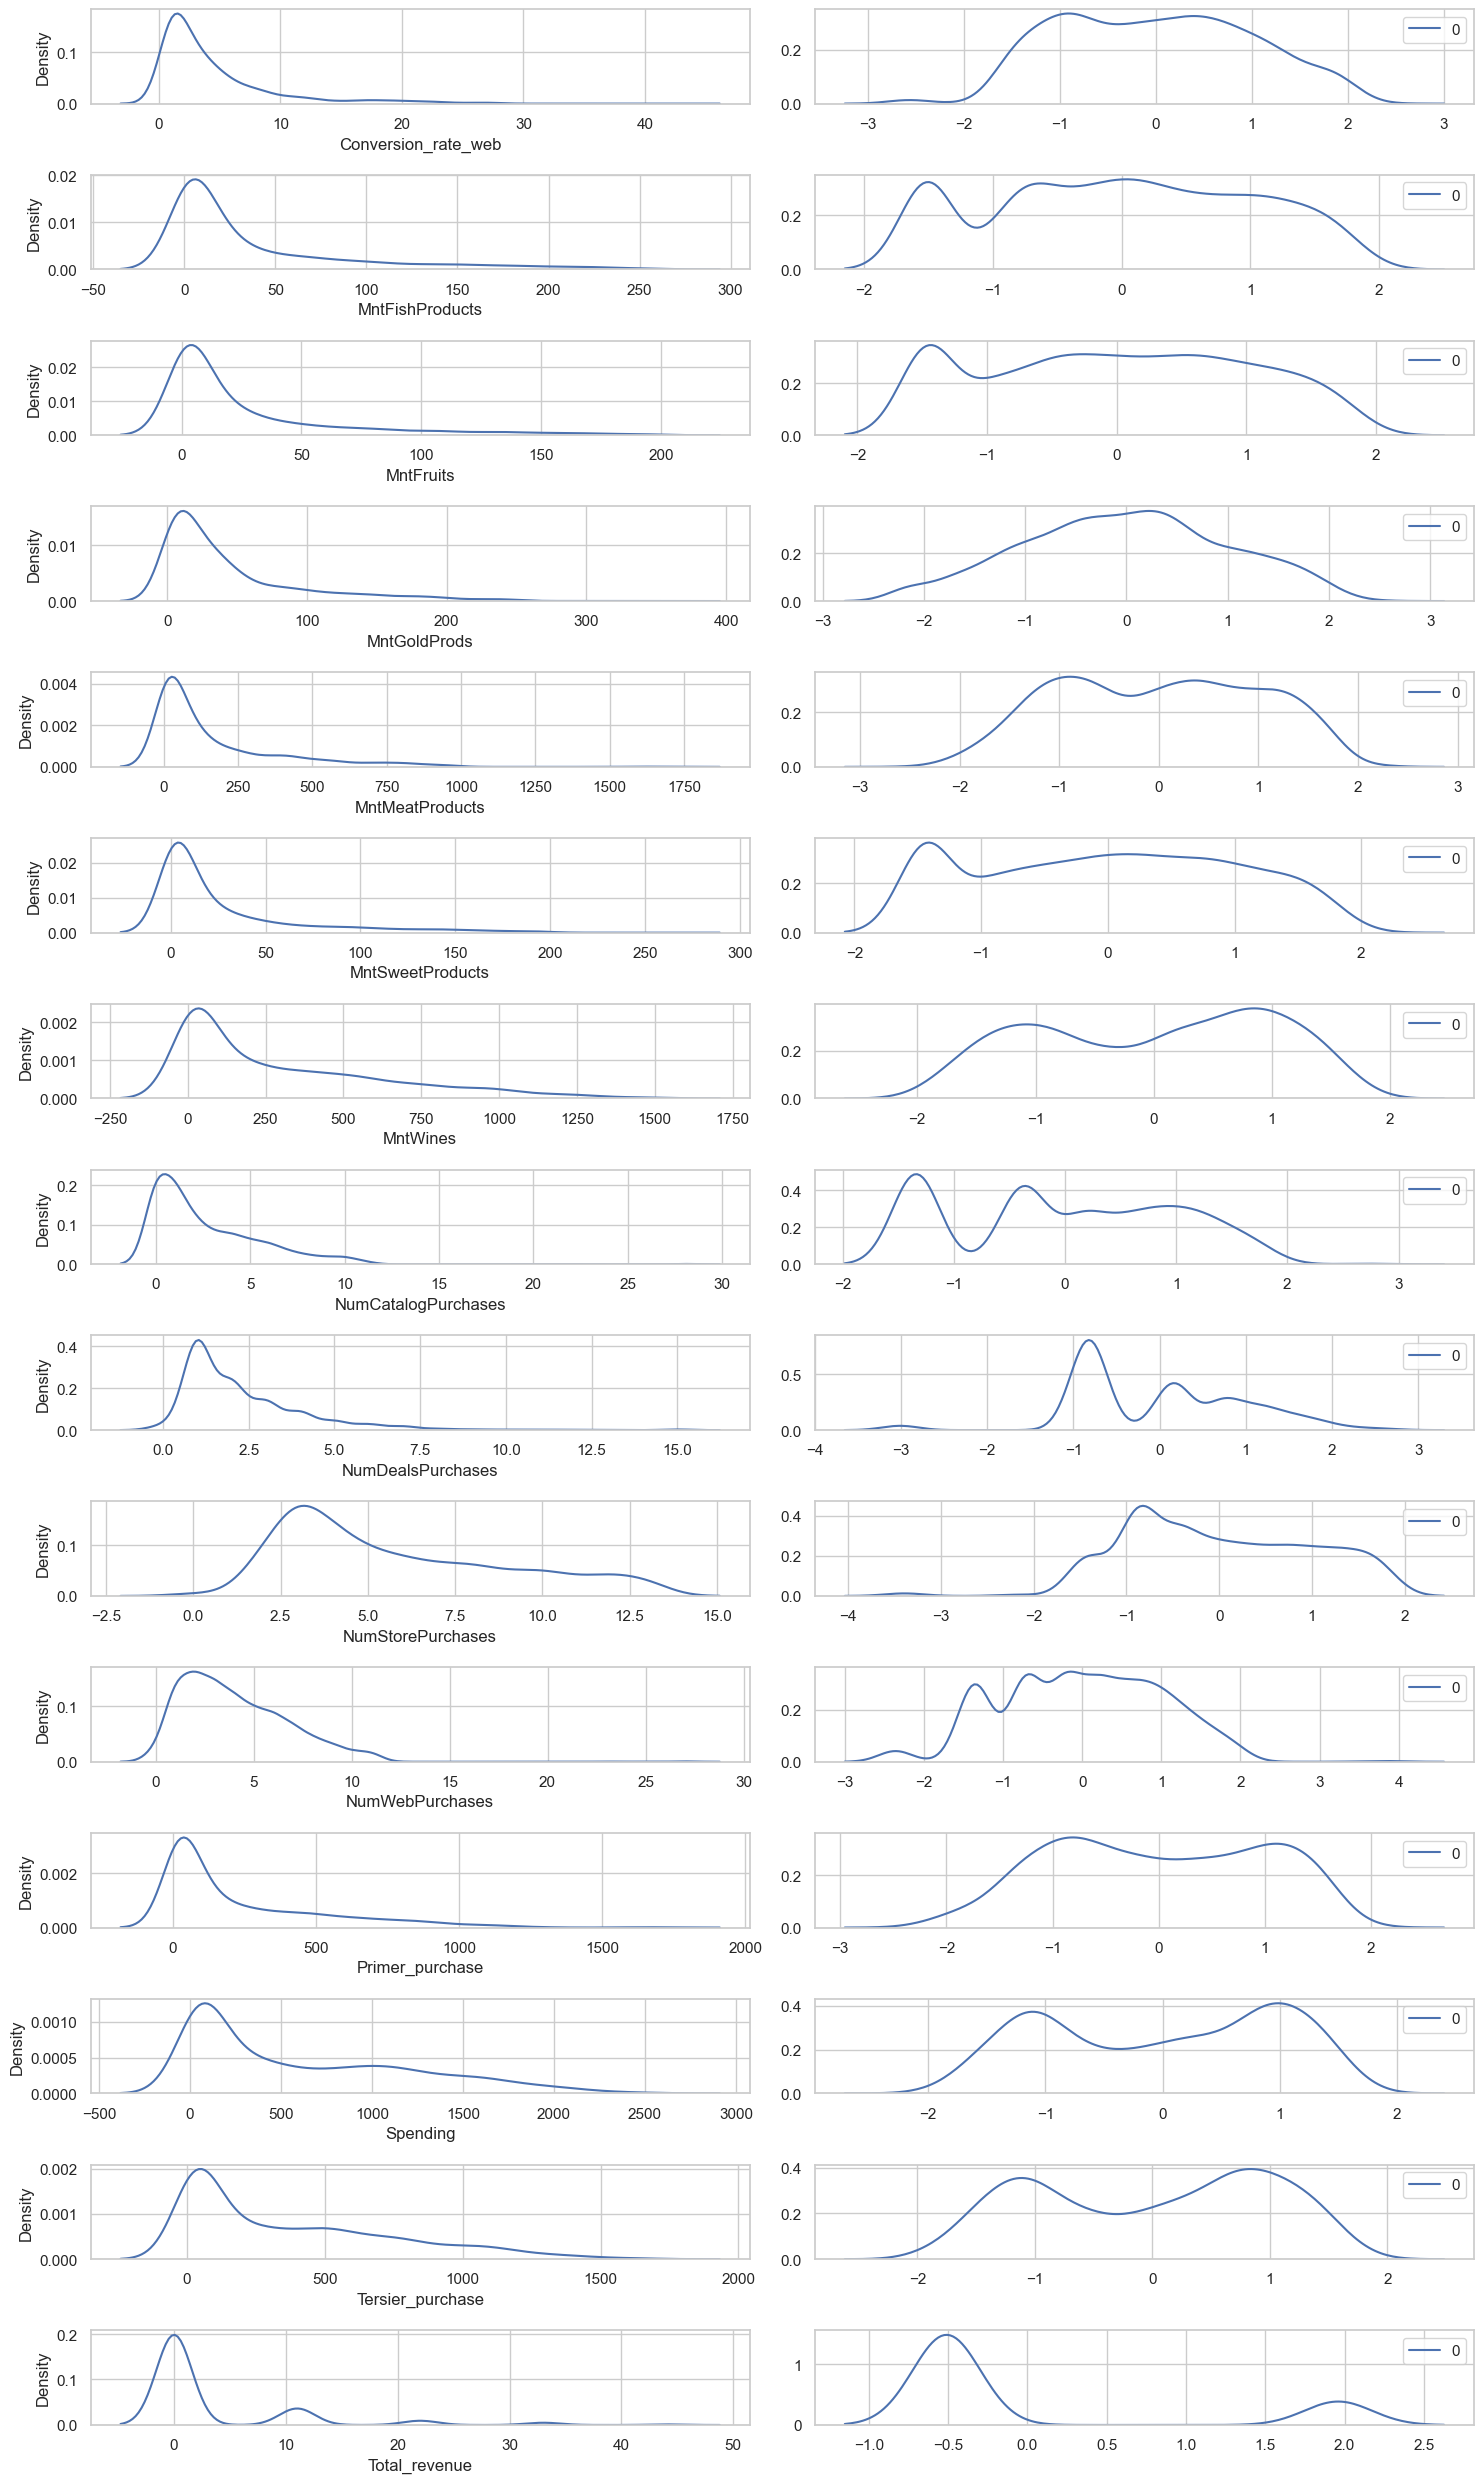

In [80]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='box-cox')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [81]:
# pt = PowerTransformer(method='box-cox')
# df[log_cols] = pt.fit_transform(df[log_cols]+1)

In [82]:
# df[log_cols].describe()

### **Yeo-Johnson Transformation**

Unlike the Box-Cox transform, it does not require the values for each input variable to be strictly positive.

It supports zero values and negative values. This means we can apply it to our dataset without scaling it first.

- **with scipy**

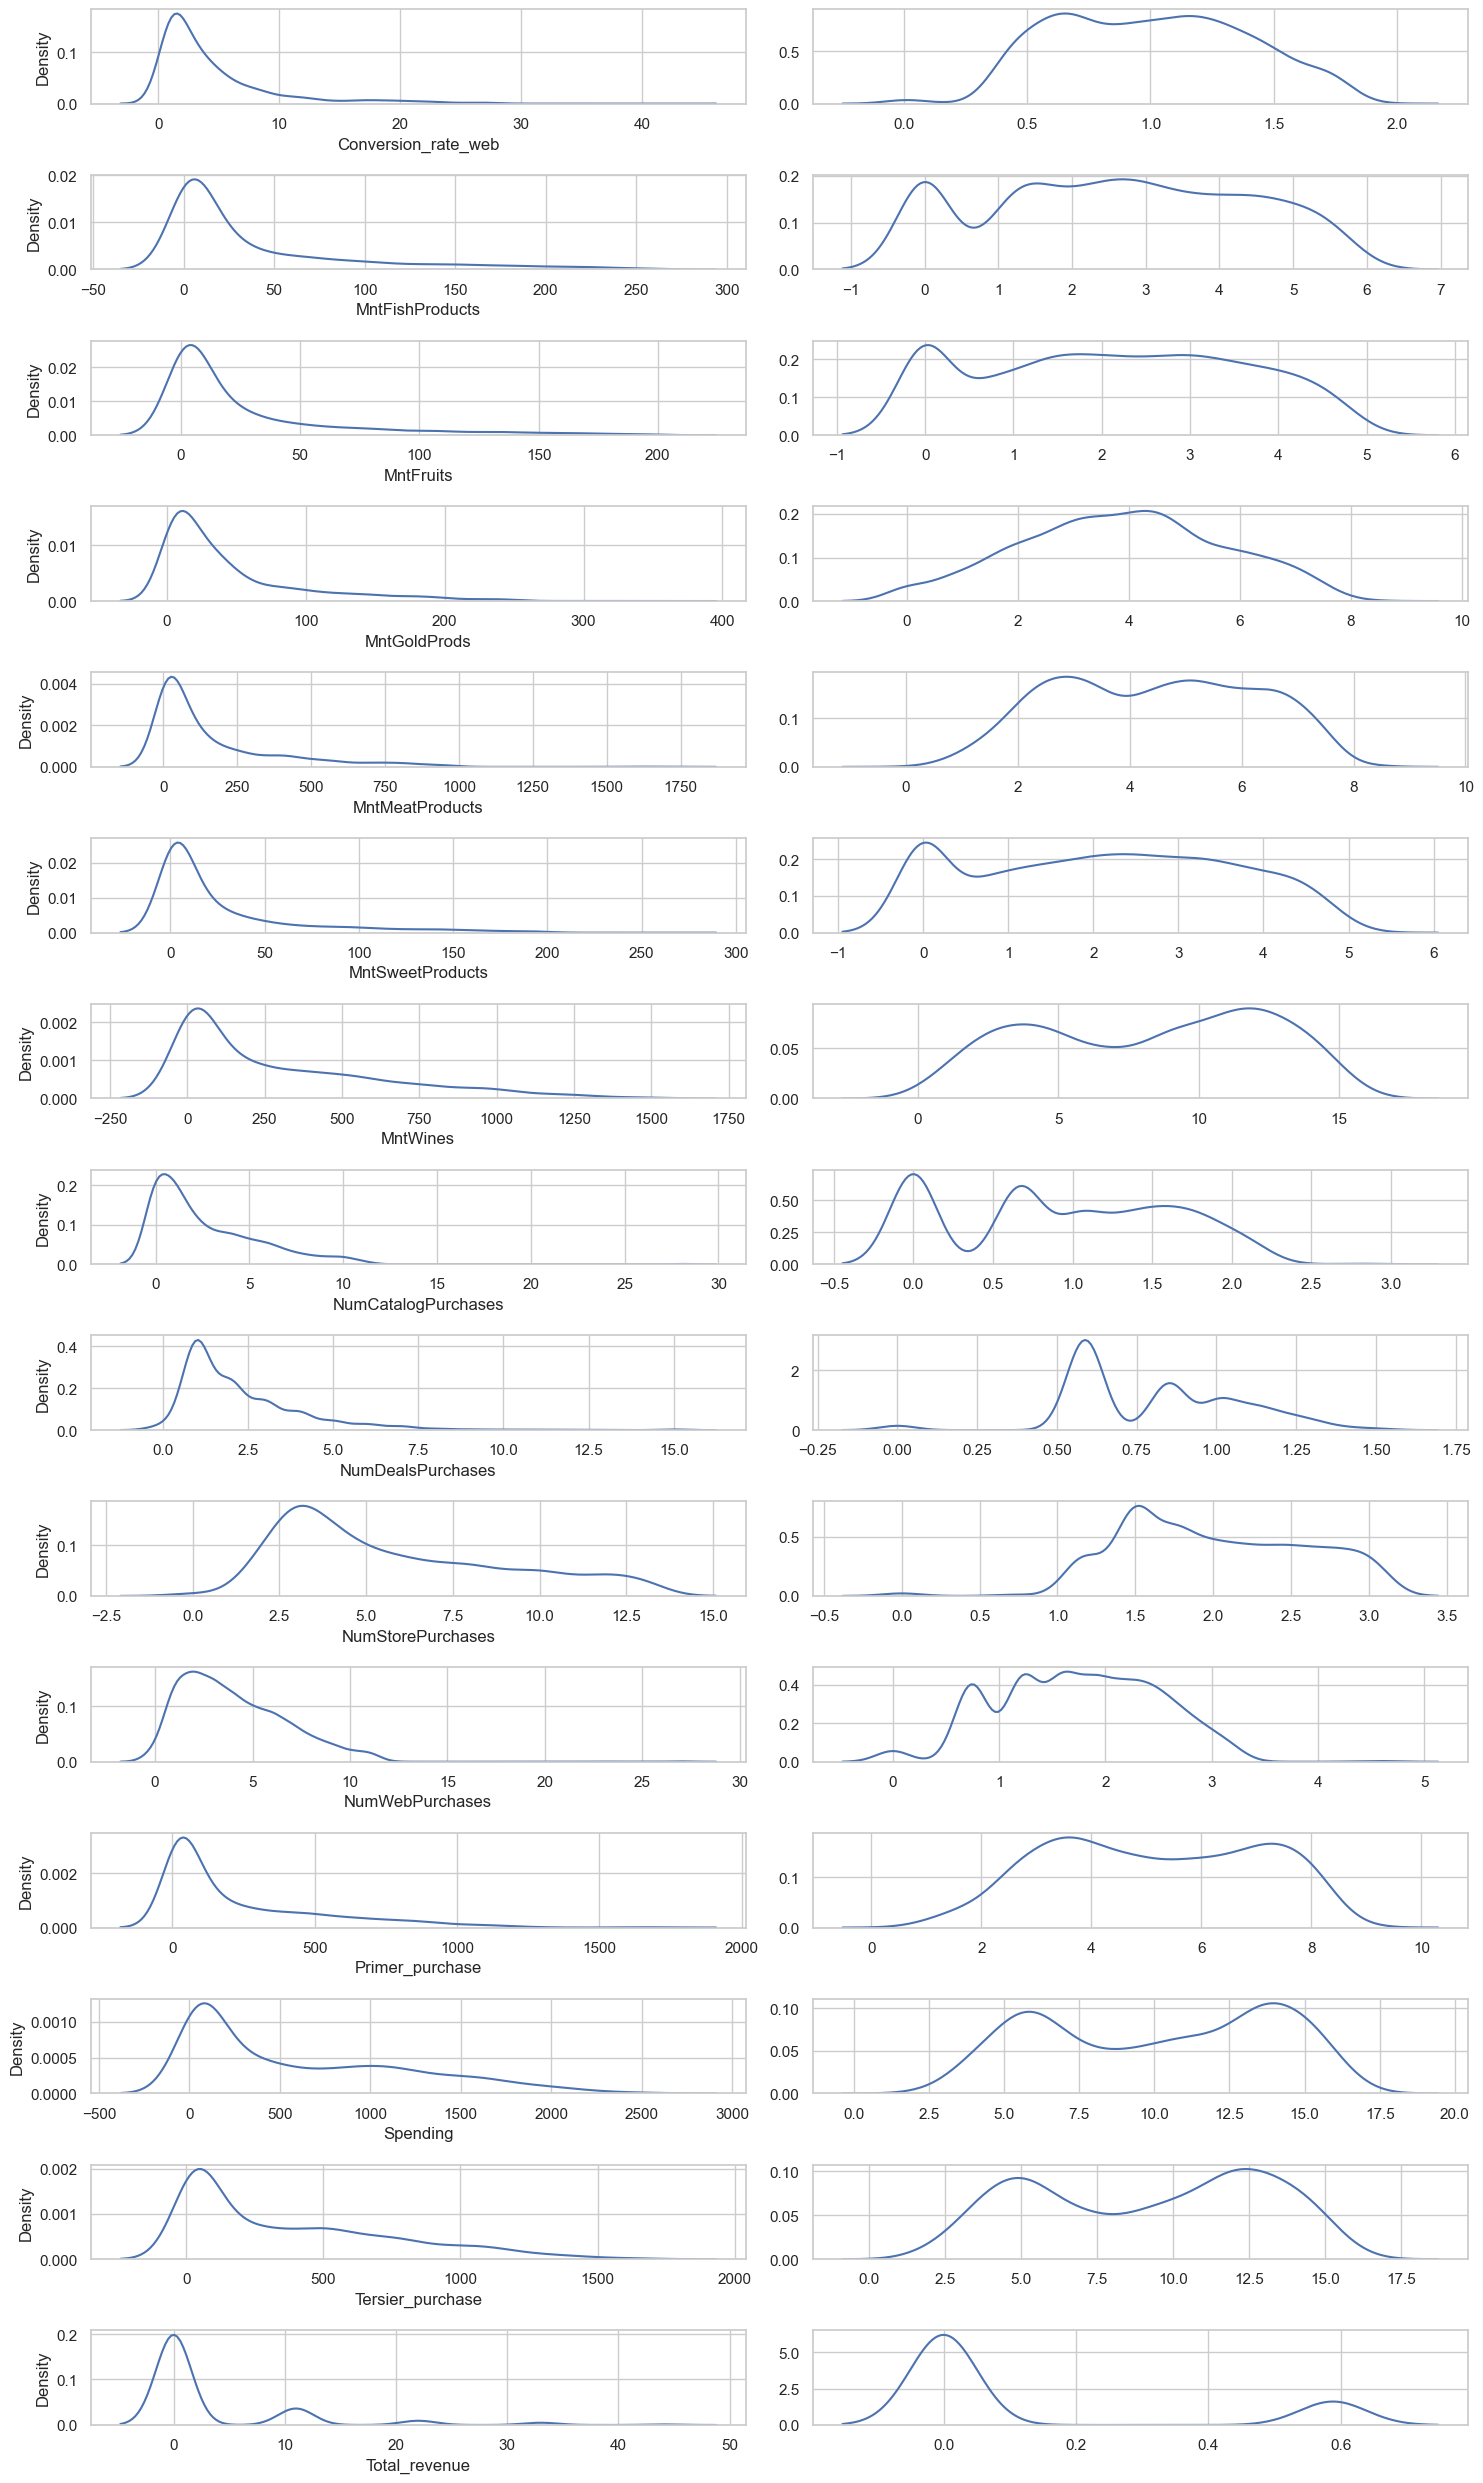

In [83]:
from scipy.stats import yeojohnson

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    data, fitted_lambda = yeojohnson(df[log_cols[i]],lmbda=None)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [84]:
# for i in log_cols:
#     df[i], fitted_lambda = yeojohnson(df[i], lmbda=None)

In [85]:
# df[log_cols].describe()

- **with sklearn**

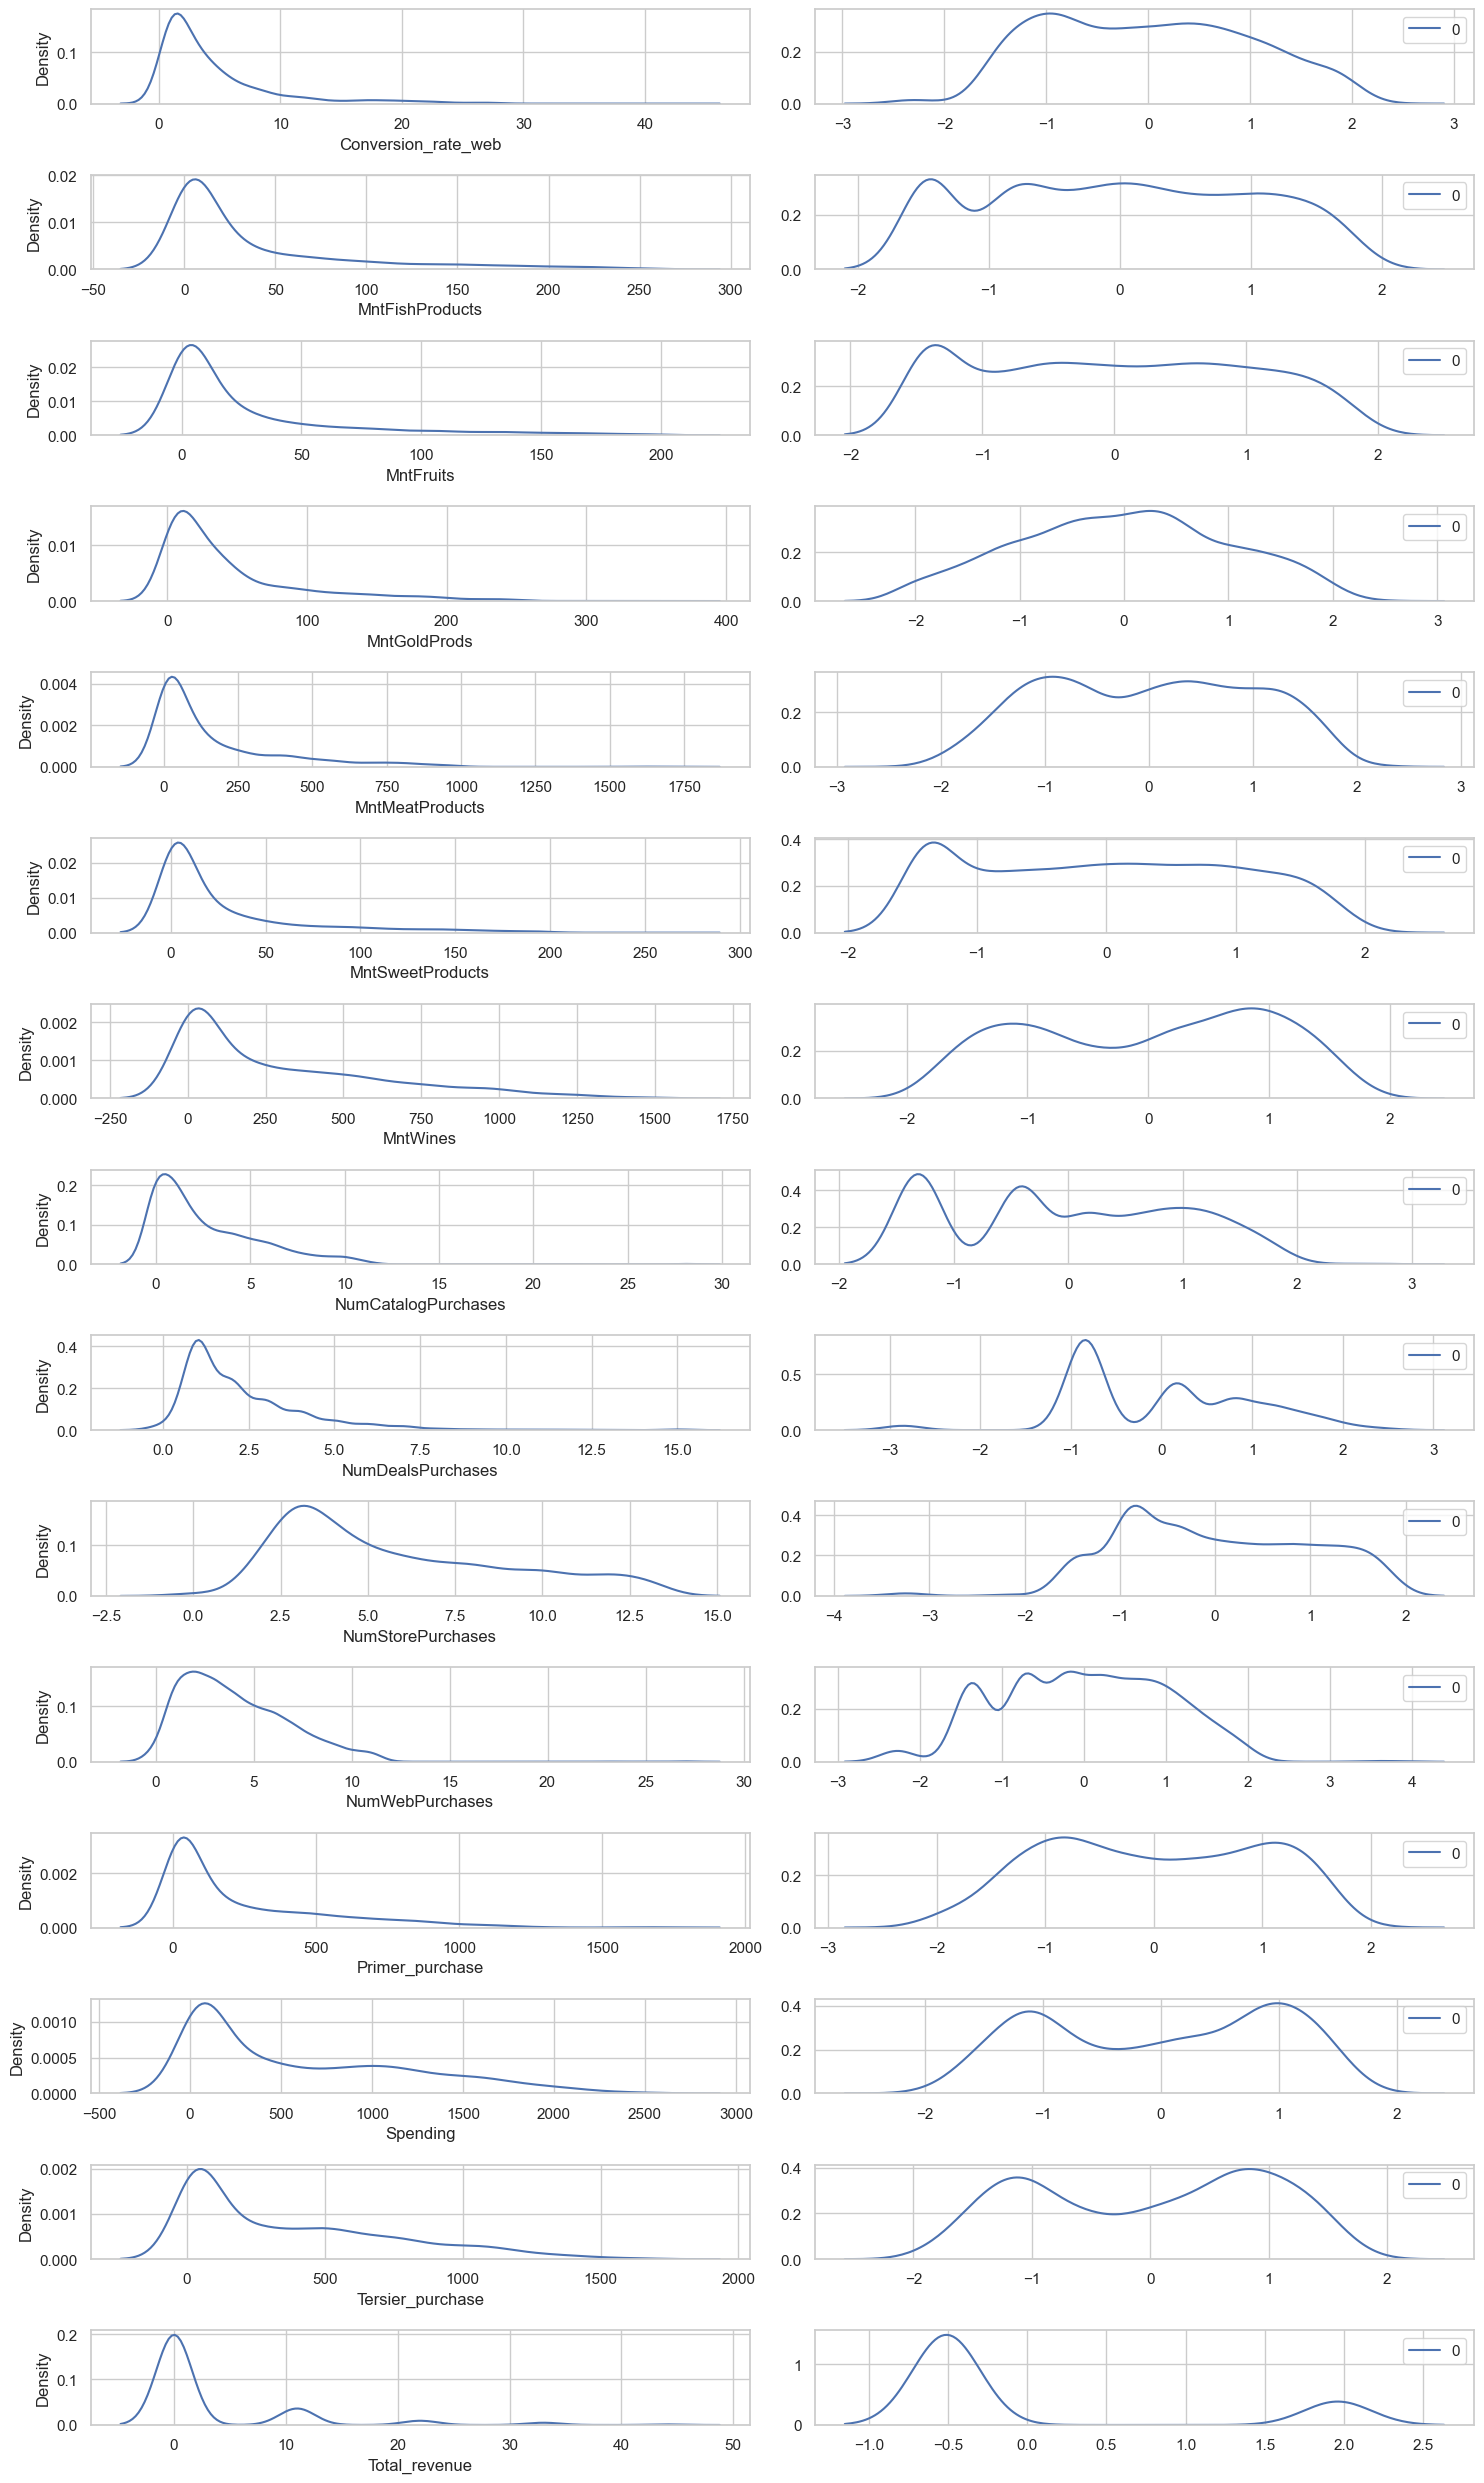

In [86]:
from sklearn.preprocessing import PowerTransformer

fig, ax = plt.subplots(len(log_cols),2,figsize=(15,25))
for i in range(0,len(log_cols)):
    pt = PowerTransformer(method='yeo-johnson')
    data = pt.fit_transform(df[[log_cols[i]]]+1)
    kde1 = sns.kdeplot(df[log_cols[i]], ax=ax[i][0])
    kde2 = sns.kdeplot(data, ax=ax[i][1])
    kde2.set_ylabel(None)
    plt.tight_layout()

In [87]:
pt = PowerTransformer(method='yeo-johnson')
df[log_cols] = pt.fit_transform(df[log_cols])

In [88]:
df[log_cols].describe()

Conversion_rate_web  MntFishProducts     MntFruits  MntGoldProds  \
count         2.236000e+03     2.236000e+03  2.236000e+03  2.236000e+03   
mean          2.955298e-16     1.112209e-17 -1.763646e-16 -8.818229e-17   
std           1.000224e+00     1.000224e+00  1.000224e+00  1.000224e+00   
min          -2.602504e+00    -1.509682e+00 -1.454849e+00 -2.138575e+00   
25%          -8.424338e-01    -7.007989e-01 -9.853113e-01 -6.882051e-01   
50%          -2.079832e-02     3.254224e-03 -1.431804e-03  3.731807e-03   
75%           7.479659e-01     8.389835e-01  8.296137e-01  6.910780e-01   
max           2.363106e+00     1.862577e+00  1.884177e+00  2.492608e+00   

       MntMeatProducts  MntSweetProducts      MntWines  NumCatalogPurchases  \
count     2.236000e+03      2.236000e+03  2.236000e+03         2.236000e+03   
mean      1.747757e-17      2.812300e-16  3.495514e-17        -5.878820e-17   
std       1.000224e+00      1.000224e+00  1.000224e+00         1.000224e+00   
min      -2.511714e+00     -1.434003e+00 -1.970872e+00        -1.338023e+00   
25%      -8.385940e-01     -9.711568e-01 -9.104855e-01        -1.338023e+00   
50%       3.471239e-02     -1.681003e-03  1.261694e-01         1.589299e-01   
75%       8.423659e-01      8.167801e-01  8.746546e-01         7.999743e-01   
max       2.222716e+00      2.012128e+00  1.812958e+00         2.767807e+00   

       NumDealsPurchases  NumStorePurchases  NumWebPurchases  Primer_purchase  \
count       2.236000e+03       2.236000e+03     2.236000e+03     2.236000e+03   
mean       -4.448836e-16      -3.860954e-16     1.382317e-16    -7.467690e-17   
std         1.000224e+00       1.000224e+00     1.000224e+00     1.000224e+00   
min        -3.011224e+00      -3.392032e+00    -2.362005e+00    -2.314924e+00   
25%        -8.201550e-01      -8.627790e-01    -7.093807e-01    -8.349123e-01   
50%         1.581372e-01      -4.692181e-02     1.851832e-01    -3.838851e-02   
75%         7.441576e-01       8.062471e-01     8.238423e-01     8.913990e-01   
max         2.658365e+00       1.780425e+00     3.933317e+00     2.046915e+00   

           Spending  Tersier_purchase  Total_revenue  
count  2.236000e+03      2.236000e+03   2.236000e+03  
mean   2.351528e-16     -9.930439e-17   7.944351e-18  
std    1.000224e+00      1.000224e+00   1.000224e+00  
min   -2.069143e+00     -1.976478e+00  -5.103128e-01  
25%   -9.800995e-01     -9.755613e-01  -5.103128e-01  
50%    1.312892e-01      1.334070e-01  -5.103128e-01  
75%    9.161492e-01      8.693208e-01  -5.103128e-01  
max    1.757460e+00      1.840735e+00   1.985443e+00

### **Normalization**

In [89]:
from sklearn.preprocessing import MinMaxScaler
# create a scaler object
scaler = MinMaxScaler()
# fit and transform the data
df[norm_cols] = pd.DataFrame(scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [90]:
df[norm_cols].describe()

Age       Income     Lifetime  Month_joined  NumWebVisitsMonth  \
count  2236.000000  2236.000000  2236.000000   2236.000000        2236.000000   
mean      0.483964     0.312764     0.489522      0.496910           0.265944   
std       0.208987     0.133932     0.306805      0.317167           0.121344   
min       0.000000     0.000000     0.000000      0.000000           0.000000   
25%       0.339286     0.209162     0.342857      0.181818           0.150000   
50%       0.464286     0.308968     0.485714      0.454545           0.300000   
75%       0.660714     0.415382     0.657143      0.818182           0.350000   
max       1.000000     1.000000     1.000000      1.000000           1.000000   

           Recency  Total_Purchases   Year_Birth  
count  2236.000000      2236.000000  2236.000000  
mean      0.496124         0.338012     0.516036  
std       0.292498         0.174497     0.208987  
min       0.000000         0.000000     0.000000  
25%       0.242424         0.181818     0.339286  
50%       0.494949         0.340909     0.535714  
75%       0.747475         0.477273     0.660714  
max       1.000000         1.000000     1.000000

### **Standardization**

In [91]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# std_scaler = StandardScaler()
# std_scaler
# # fit and transform the data
# df[norm_cols] = pd.DataFrame(std_scaler.fit_transform(df[norm_cols]), columns=df[norm_cols].columns)

In [92]:
# df[norm_cols].describe()

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan transformation sebelumnya, dapat diketahui bahwa keseluruhan nilai skewnessnya sudah memiliki rentang yang lebih seragam (tidak jauh dan tidak terlalu bervariasi). Sehingga dapat disimpulkan bahwa teknik fitur transformation yang telah kami lakukan sudah valid dan kami.

## **📌 Feature Encoding (Categoric)**


Mengecek feature categorical yang masih memiliki nilai betype string/object

In [93]:
#cek unique value
for x in cat_str: 
    unq = list(df[x].unique())
    sorted(unq)
    
    print (f'===== {x} =====')
    if len(unq) >= 10:
        unq = list(unq[:10])+['.....']
        print (f'{unq}')
    else:
        print (f'{unq}')
    print()

===== Education =====
['Graduation', 'PhD', 'Master', 'Basic']

===== Marital_Status =====
['Single', 'Married', 'Divorced']

===== Age_group =====
['Senior Adult', 'Young Adult', 'Adult']

===== Income_sgmt =====
['Medium', 'High', 'Low']



In [94]:
cat_str

['Education', 'Marital_Status', 'Age_group', 'Income_sgmt']

Dari hasil temuan, kita dapat menentukan beberapa encoding yang akan kita lakukan :
- **Label Encoding :**
    - LabelEncoder
    - Manually Mapped
    
    **Adapun daftar column yang akan kita proses :**
    - `Education` - Basic (0), Graduation (1), Master (2), PhD (3)
    - `Age_group` - Young Adult (0), Adult (1), Senior Adult (2)
    - `Income_sgmt` - Low (0), Medium (1), High (2)
    
- **One Hot Encoding :**
    - get_dummies
    - OneHotEncoder
    
    **Adapun daftar column yang akan kita proses :**
    - `Marital_Status` - Single, Married, Divorced

**Choice Determination:**

- Pada proses `Label Encoding` ini kita menggunakan `Manually Mapped`, karena kita bisa menentukan secara fleksible urutan/order dari categorical feature
- Pada proses `One Hot Encoding` ini kita menggunakan `OneHotEncoder`, karena hasil encodingnya lebih rapi dan lebih mudah untuk dilakukan adjust

### **Label Encoding**

1. Menggunakan `LabelEncoder`

In [95]:
# from sklearn.preprocessing import LabelEncoder

# cat = cat_str.copy()
# cat.remove("Marital_Status")

# le = LabelEncoder()

# for i in cat_str:
#     le.fit(df[i])
#     df[i] = le.transform(df[i])
#     print(le.classes_)

2. Menggunakan Metode `Mapping`

In [96]:
map_edu = {
    'Basic' : 0,
    'Graduation' : 1,
    'Master' : 2,
    'PhD' : 3
}

df['Education'] = df['Education'].map(map_edu)
df['Education'].unique()

array([1, 3, 2, 0], dtype=int64)

In [97]:
map_age = {
    'Young Adult' : 0,
    'Adult' : 1,
    'Senior Adult' : 2
}

df['Age_group'] = df['Age_group'].map(map_age)
df['Age_group'].unique()

array([2, 0, 1], dtype=int64)

In [98]:
map_income = {
    'Low' : 0,
    'Medium' : 1,
    'High' : 2
}

df['Income_sgmt'] = df['Income_sgmt'].map(map_income)
df['Income_sgmt'].unique()

array([1, 2, 0], dtype=int64)

In [99]:
df.head()

ID  Year_Birth  Education Marital_Status    Income  Kidhome  Teenhome  \
0  5524    0.303571          1         Single  0.351086        0         0   
1  2174    0.250000          1         Single  0.277680        1         1   
2  4141    0.446429          1        Married  0.434956        0         0   
3  6182    0.785714          1        Married  0.155079        1         0   
4  5324    0.732143          3        Married  0.352051        1         0   

  Dt_Customer   Recency  MntWines  MntFruits  MntMeatProducts  \
0  2012-09-04  0.585859  1.058011   1.409686         1.420252   
1  2014-03-08  0.383838 -1.212159  -0.985311        -1.378336   
2  2013-08-21  0.262626  0.745578   1.064234         0.445709   
3  2014-02-10  0.262626 -1.212159  -0.380323        -0.707871   
4  2014-01-19  0.949495  0.122520   0.986785         0.397927   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0         1.603700          1.387832      1.090527           0.744158   
1        -0.870349         -0.971157     -0.938568           0.158137   
2         1.329530          0.552570      0.448706          -0.820155   
3        -0.097459         -0.518536     -1.043656           0.158137   
4         0.788455          0.699398     -0.342328           1.442609   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0         1.328316             1.726261          -0.418298               0.35   
1        -1.359951            -0.374162          -1.419908               0.25   
2         1.328316             0.158930           1.242818               0.20   
3        -0.709381            -1.338023          -0.418298               0.30   
4         0.526159             0.524042           0.272951               0.25   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             0   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             0             0             0             0             0   

   Complain  Z_CostContact  Z_Revenue       Age  Age_group  Has_child  \
0         0              3         11  0.696429          2          0   
1         0              3         11  0.750000          2          1   
2         0              3         11  0.553571          2          0   
3         0              3         11  0.214286          0          1   
4         0              3         11  0.267857          1          1   

   Dependents  Lifetime  Spending  Primer_purchase  Tersier_purchase  \
0           0  0.914286  1.315785         1.477134          1.116046   
1           2  0.057143 -1.442462        -1.409056         -1.363875   
2           0  0.542857  0.660253         0.740554          0.671920   
3           1  0.028571 -1.118746        -0.650506         -1.340485   
4           1  0.000000  0.177763         0.515865          0.035887   

   Total_Purchases  Total_Cmp  Ever_Accept  Total_revenue  Income_sgmt  \
0         0.568182          0            0      -0.510313            1   
1         0.136364          0            0      -0.510313            1   
2         0.477273          0            0      -0.510313            2   
3         0.181818          0            0      -0.510313            0   
4         0.431818          0            0      -0.510313            1   

   Conversion_rate_web  Month_joined  Recency_sgmt  Response  
0             0.322257      0.727273             2         1  
1            -0.859340      0.181818             3         0  
2             0.729193      0.636364             3         0  
3            -0.753151      0.090909             3         0  
4             0.389599      0.000000             0         0

### **One Hot Encoding**

1. Menggunakan `get_dummies`

In [100]:
# # Not Auto Drop Columns
# ohe = pd.get_dummies(df["Marital_Status"])
# df.drop("Marital_Status", axis=1, inplace=True)
# df = df.join(ohe)

# # cara 2 : Auto drop Column
# # df = pd.get_dummies(data=df, columns=["Marital_Status"])

# df.head()

2. Menggunakan `OneHotEncoder`

In [101]:
from sklearn.preprocessing import OneHotEncoder

oh = OneHotEncoder()
df_ohe = pd.DataFrame(
    oh.fit_transform(df[["Marital_Status"]]).toarray(),
    columns=list(oh.categories_[0])
)
print(oh.categories_[0])

df.drop("Marital_Status", axis=1, inplace=True)

df = pd.concat([df, df_ohe], axis=1)

['Divorced' 'Married' 'Single']


### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan encoding sebelumnya, dapat diketahui bahwa keseluruhan nilai telah beripe numeric sesuai dengan nilai yang kita assign. Sehingga dapat disimpulkan bahwa teknik fitur encoding yang telah kami lakukan sudah valid dan kami.

## **📌 Feature Selection**

### **1. Drop Unnecessary Feature**

- Drop kolom `ID` karena memiliki banyak kategori dan tidak berguna untuk pemodelan
- Drop kolom `Year_Birth` sudah dilakukan Feature extraction untuk mengambil data Umur/Age pada range tahun saat ini 2014 (sesuai pada data)
- Drop kolom `Dt_Customer` karena tidak terlalu mempengaruhi model prediksi
- Drop kolom `Z_CostContact` (3) dan `Z_Revenue` (11) karena  hanya memiliki satu nilai, tidak memberikan informasi yang signifikan terhadap model prediksi

In [102]:
df.drop(['ID', 'Year_Birth', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], inplace=True, axis=1)

### **2. Univariate Selection**

In [103]:
# define X and y
X = df.drop(['Response'], axis=1) #features
y = df['Response'] #target

- #### **ANOVA F-value**

`ANOVA F-value` estimates the degree of linearity between the input feature (i.e., independent features) and the output feature (i.e., dependent feature). A high F-value indicates a high degree of linearity and a low F-value indicates a low degree of linearity.

Scikit-learn provides two functions to calculate F-value:

1. `sklearn.feature_selection.f_regression` for regression problems
2. `sklearn.feature_selection.f_classif` for classification problems

Disadvantage:

ANOVA F-value only captures the linear relationships between input and output feature.

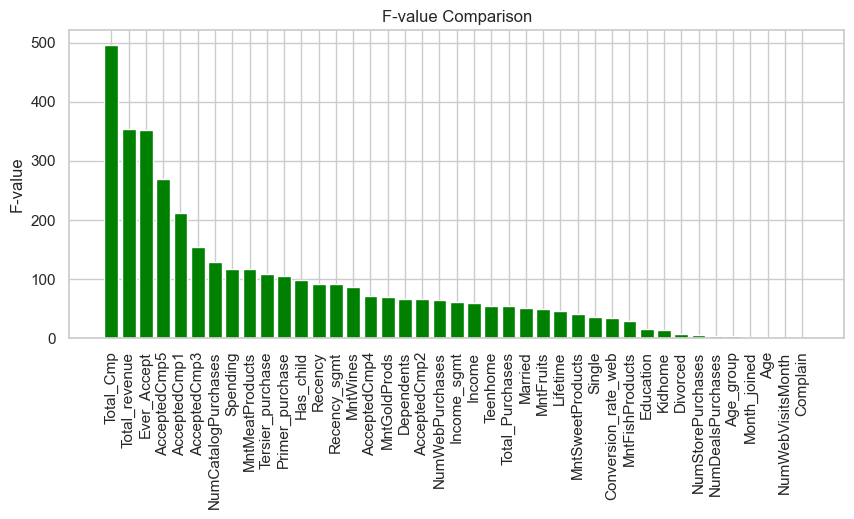

In [104]:
from sklearn.feature_selection import f_classif
feature_names = X.columns

# create f_classif object
f_value = f_classif(X, y)

# print the name and F-value of each feature
# for feature in zip(feature_names, f_value[0]):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "f_value":f_value[0]
}).sort_values("f_value", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="f_value", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("F-value")
plt.title("F-value Comparison")
plt.show()

Mengambil 20 top feature

In [105]:
feature_importance = []
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases']

- #### **Variance Threshold**

Variance Threshold removes the features whose variance is below the pre-defined `threshold` value. By default, it removes all zero-variance features, i.e. features that have the same value in all samples.

Advantage:

This can be used for unsupervised learning.

Disadvantage:

Variance Threshold only considers the relationship among the features but not the relationship between input features with the output feature.

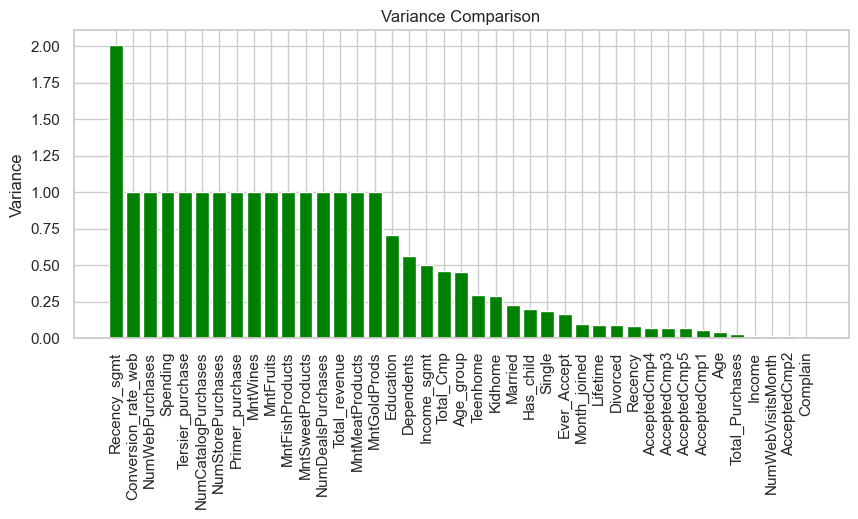

In [106]:
# import VarianceThreshold
from sklearn.feature_selection import VarianceThreshold
# create VarianceThreshold object
selector = VarianceThreshold(threshold=0.0)
# train and transform
selector.fit_transform(X)
# print the name and variance of each feature
# for feature in zip(feature_names, selector.variances_):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "variances":selector.variances_
}).sort_values("variances", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="variances", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Variance")
plt.title("Variance Comparison")
plt.show()

Mengambil 20 top feature

In [107]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt']

- #### **Mutual information**

Mutual information (MI) measures the dependence of one variable to another by quantifying the amount of information obtained about one feature, through the other feature. MI is symmetric and non-negative and is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

Scikit-learn provides two functions to calculate F-value:

- `sklearn.feature_selection.mutual_info_regression` for regression problems
- `sklearn.feature_selection.mutual_info_classif` for classification problems

Advantage:

MI can capture non-linear relationships between input and output feature.

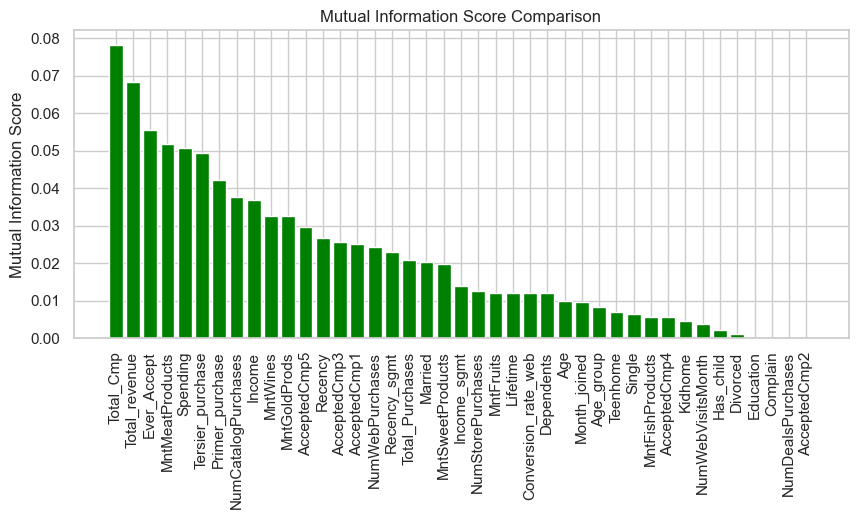

In [108]:
# import mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
# create mutual_info_classif object
MI_score = mutual_info_classif(X, y, random_state=0)
# Print the name and mutual information score of each feature
# for feature in zip(feature_names, MI_score):
#     print(feature)

fs = pd.DataFrame({
    "feature_names":feature_names,
    "MI_score":MI_score
}).sort_values("MI_score", ascending=False)
    
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=fs, x="feature_names", height="MI_score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("Mutual Information Score")
plt.title("Mutual Information Score Comparison")
plt.show()

Mengambil 20 top feature

In [109]:
for i in fs["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married']

- #### **Scikit-learn’s SelectKBest**

SelectKBest selects the features using a function (in this case ANOVA F-value) and then "removes all but the k highest scoring features".

Statistical tests can be used to select those features that have the strongest relationship with the output variable. `Mutual information, ANOVA F-test and chi square` are some of the most popular methods of univariate feature selection.

---

ERROR :

`Input X must be non-negative`

The error message you got that:

Tells that: Pearson's chi-square test (goodness of fit) does not apply to negative values. It occurred because the chi-square test assumes frequencies distribution and a frequency can't be a negative number. But, `sklearn.feature_selection.chi2` asserts the input as non-negative.

If data transformation is for some reason not possible (e.g. a negative value is an important factor), then you should pick another statistic to score your features:

```
sklearn.feature_selection.f_classif computes ANOVA f-value
sklearn.feature_selection.mutual_info_classif
```

In [110]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, f_classif, mutual_info_classif

# apply SelectKBest class to extract top 10 best features

# computes chi2
# semuanya harus positif
# bestfeatures = SelectKBest(score_func=chi2, k=10)

# computes ANOVA f-value
bestfeatures = SelectKBest(score_func=f_classif, k=10)

fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.sort_values('Score', ascending=False, inplace=True)
print(featureScores.nlargest(10,'Score'))  #print 10 best features

                  Specs       Score
31            Total_Cmp  495.889239
33        Total_revenue  354.134798
32          Ever_Accept  351.524183
18         AcceptedCmp5  269.590003
19         AcceptedCmp1  211.130800
16         AcceptedCmp3  154.206347
13  NumCatalogPurchases  129.077831
27             Spending  117.971705
7       MntMeatProducts  117.687083
29     Tersier_purchase  108.789997


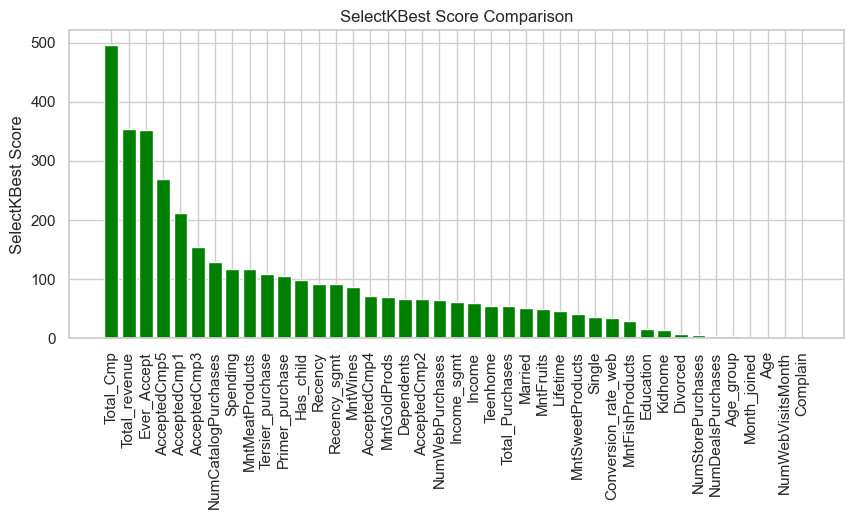

In [111]:
# Create a bar chart
plt.figure(figsize=(10,4))
plt.bar(data=featureScores, x="Specs", height="Score", color="green")
plt.xticks(rotation="vertical")
plt.ylabel("SelectKBest Score")
plt.title("SelectKBest Score Comparison")
plt.show()

Mengambil 20 top feature

In [112]:
for i in featureScores["Specs"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married']

### **3. Feature Importance**

You can get the feature importance of each feature of your dataset by using the feature importance property of the model.

Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

Feature importance is an inbuilt class that comes with Tree Based Classifiers, we will be using Extra Tree Classifier for extracting the top 10 features for the dataset.

[0.02558048 0.02815626 0.01031978 0.01339319 0.0444733  0.02682563
 0.02722961 0.02918223 0.023262   0.02611908 0.02591418 0.02278647
 0.02387847 0.02963702 0.02929528 0.02995614 0.02071426 0.00927447
 0.02486222 0.01979253 0.00547111 0.0015301  0.02637831 0.01951219
 0.01450992 0.01391807 0.03870657 0.0287877  0.02585515 0.02362614
 0.02424021 0.03498844 0.03755705 0.04945252 0.0147695  0.02384867
 0.02353284 0.04806272 0.01027291 0.02700588 0.01732139]


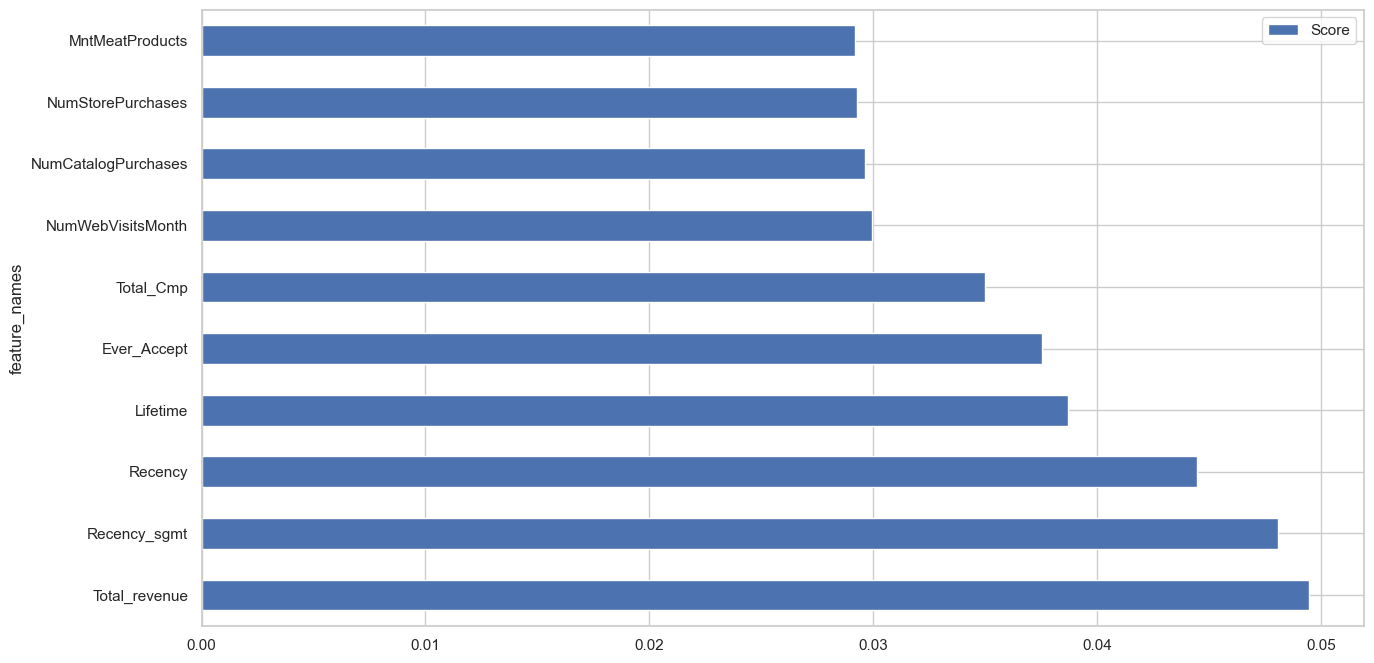

In [113]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances = pd.DataFrame(feat_importances).reset_index(names="feature_names") \
    .rename(columns={0:"Score"}) \
    .sort_values("Score", ascending=False).reset_index(drop=True)
feat_importances.nlargest(10, "Score").plot(x="feature_names", y="Score", kind='barh')
plt.show()

Mengambil 20 top feature

In [114]:
for i in feat_importances["feature_names"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married',
 'Lifetime',
 'NumWebVisitsMonth',
 'Age']

### **4. Correlation Matrix with Heatmap**

- Correlation states how the features are related to each other or the target variable.

- Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

- Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

- Cek Feature Redundan pada korelasi Antar Feature, Drop salah satunya, yang rendah korelsinya dengan Response (target)

<Axes: >

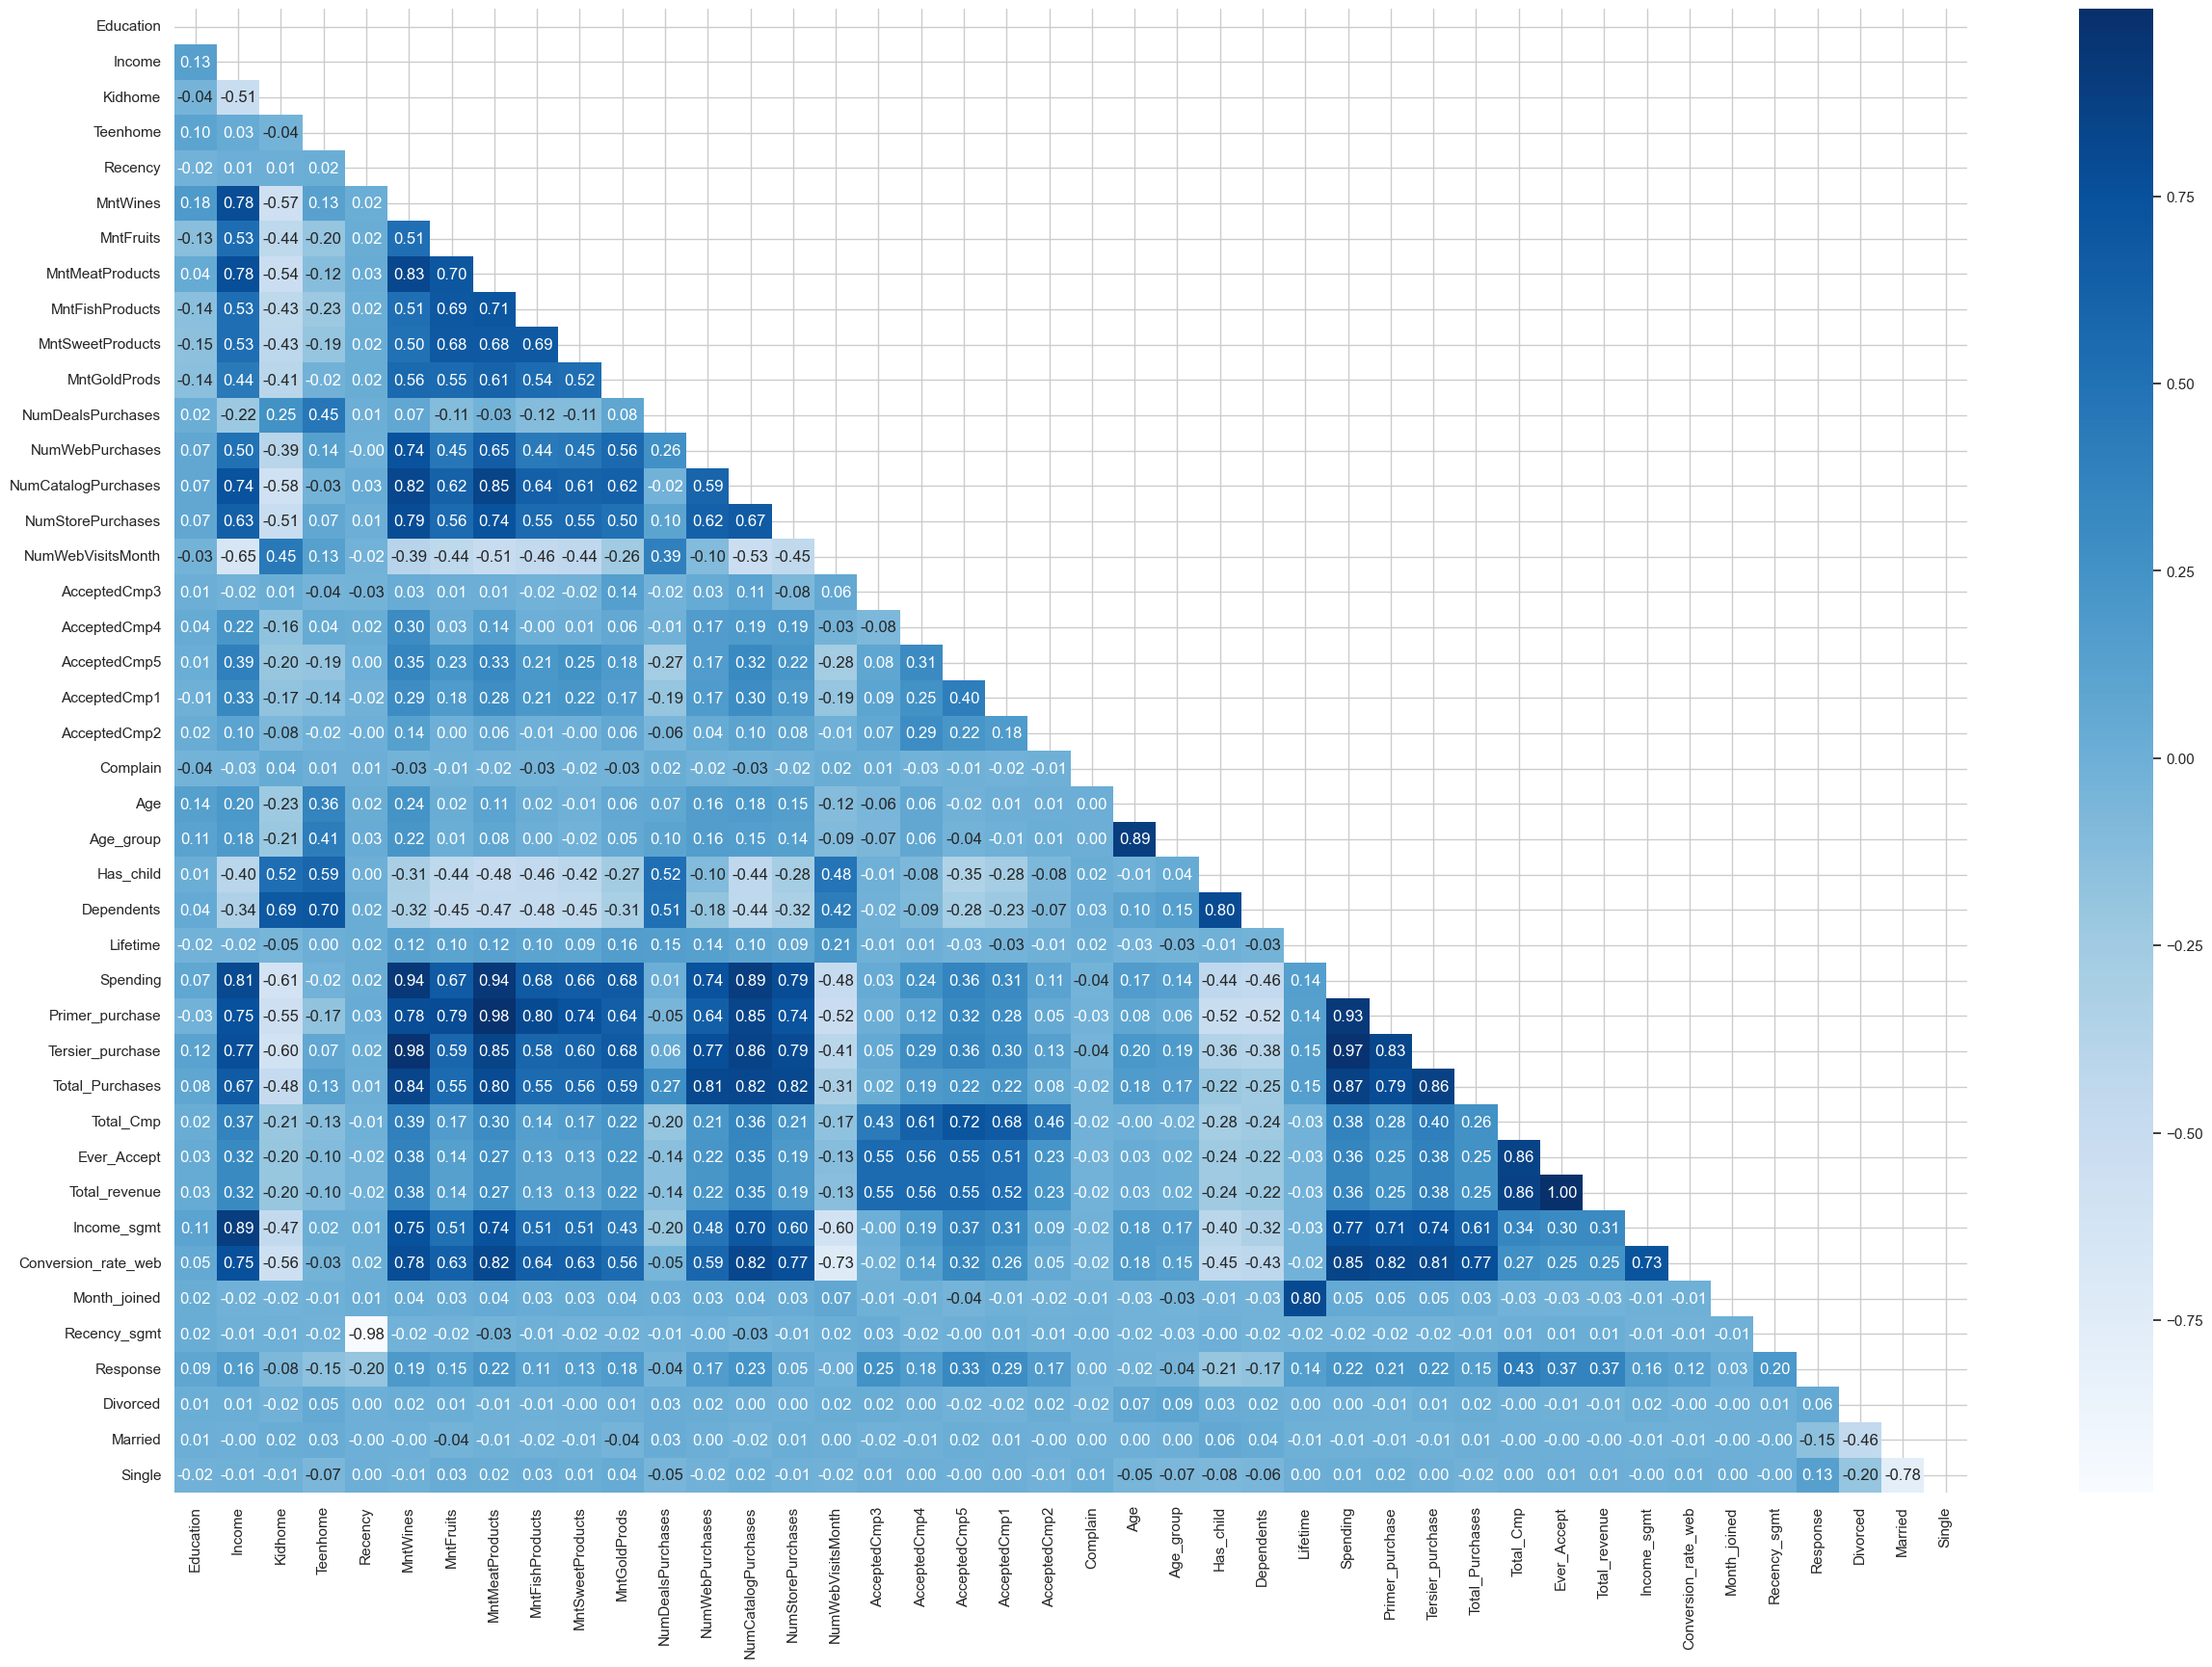

In [115]:
plt.figure(figsize=(30,20))
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Checking Correlation with Target (Response)**

In [116]:
corr = df.corrwith(df["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr["Corr Type"] = corr["corr value"].apply(lambda x : "Positif" if x >= 0 else "Negatif")
corr["corr value"] = corr["corr value"].apply(lambda x : abs(x))
corr = corr.sort_values('corr value', ascending=False, ignore_index=True)
corr.head(10)

index  corr value Corr Type
0             Response    1.000000   Positif
1            Total_Cmp    0.426206   Positif
2        Total_revenue    0.369906   Positif
3          Ever_Accept    0.368726   Positif
4         AcceptedCmp5    0.328148   Positif
5         AcceptedCmp1    0.293849   Positif
6         AcceptedCmp3    0.254106   Positif
7  NumCatalogPurchases    0.233715   Positif
8             Spending    0.223961   Positif
9      MntMeatProducts    0.223704   Positif

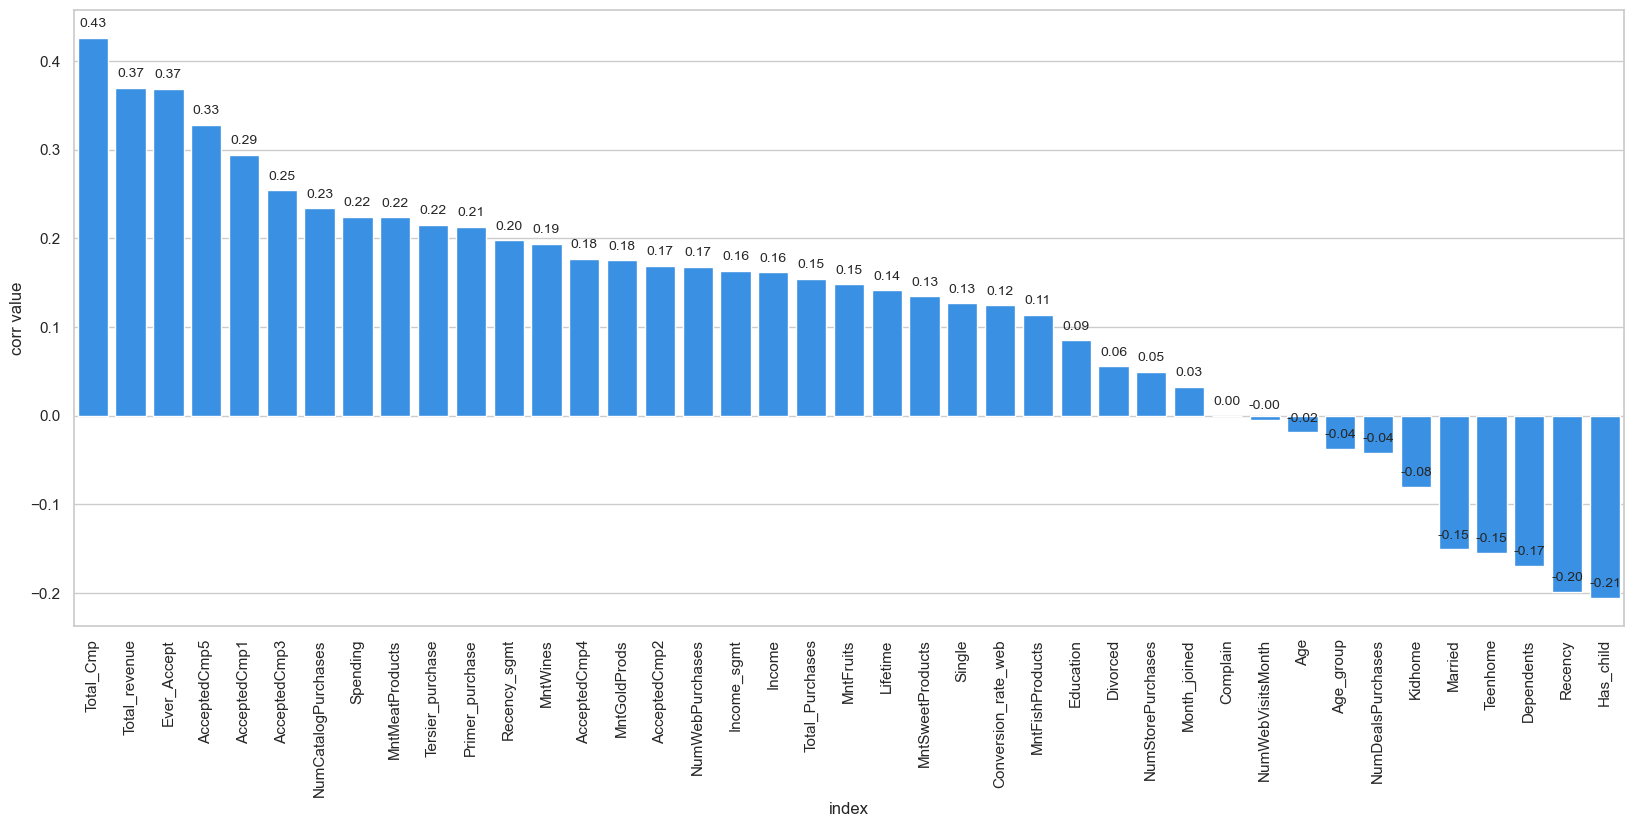

In [117]:
corr = df.corrwith(df["Response"], numeric_only=True)
corr = corr.reset_index(name='corr value')
corr = corr.sort_values('corr value', ascending=False)[1:]

plt.figure(figsize=(20, 8))
ax = sns.barplot(x='index', y="corr value", data=corr, order=corr["index"], color='dodgerblue')
for p in ax.patches:
    ax.annotate(
        f'{p.get_height():0.2f}', 
        (p.get_x() + p.get_width() / 2., p.get_height()), 
        ha = 'center', 
        va = 'center', 
        xytext = (0, 10), 
        fontsize=10,
        textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

In [118]:
target = "Response"
high_corr_cols = [i for i in list(corr[corr["corr value"] > 0.15]["index"].values) if i != target]
print(high_corr_cols)

['Total_Cmp', 'Total_revenue', 'Ever_Accept', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp3', 'NumCatalogPurchases', 'Spending', 'MntMeatProducts', 'Tersier_purchase', 'Primer_purchase', 'Recency_sgmt', 'MntWines', 'AcceptedCmp4', 'MntGoldProds', 'AcceptedCmp2', 'NumWebPurchases', 'Income_sgmt', 'Income', 'Total_Purchases']


Mengambil 20 top feature

In [119]:
for i in corr["index"].values[:20]:
    if i not in feature_importance:
        feature_importance.append(i)
feature_importance  

['Total_Cmp',
 'Total_revenue',
 'Ever_Accept',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp3',
 'NumCatalogPurchases',
 'Spending',
 'MntMeatProducts',
 'Tersier_purchase',
 'Primer_purchase',
 'Has_child',
 'Recency',
 'Recency_sgmt',
 'MntWines',
 'AcceptedCmp4',
 'MntGoldProds',
 'Dependents',
 'AcceptedCmp2',
 'NumWebPurchases',
 'Conversion_rate_web',
 'NumStorePurchases',
 'MntFruits',
 'MntFishProducts',
 'MntSweetProducts',
 'NumDealsPurchases',
 'Education',
 'Income_sgmt',
 'Income',
 'Total_Purchases',
 'Married',
 'Lifetime',
 'NumWebVisitsMonth',
 'Age']

### **5. Check Data Redundancy**

Dari feature yang telah kita pilih dari gabungan Top 20 akan di lakukan pengecekan kembali melalui `redudansi antar feature`. Pada proses ini kita memilih antar feature yang memiliki korelasi diatas `threshold > 0.70`, yang kemudian akan di `bandingkan korelasinya dengan Target` untuk `drop salah satu feature`

<Axes: >

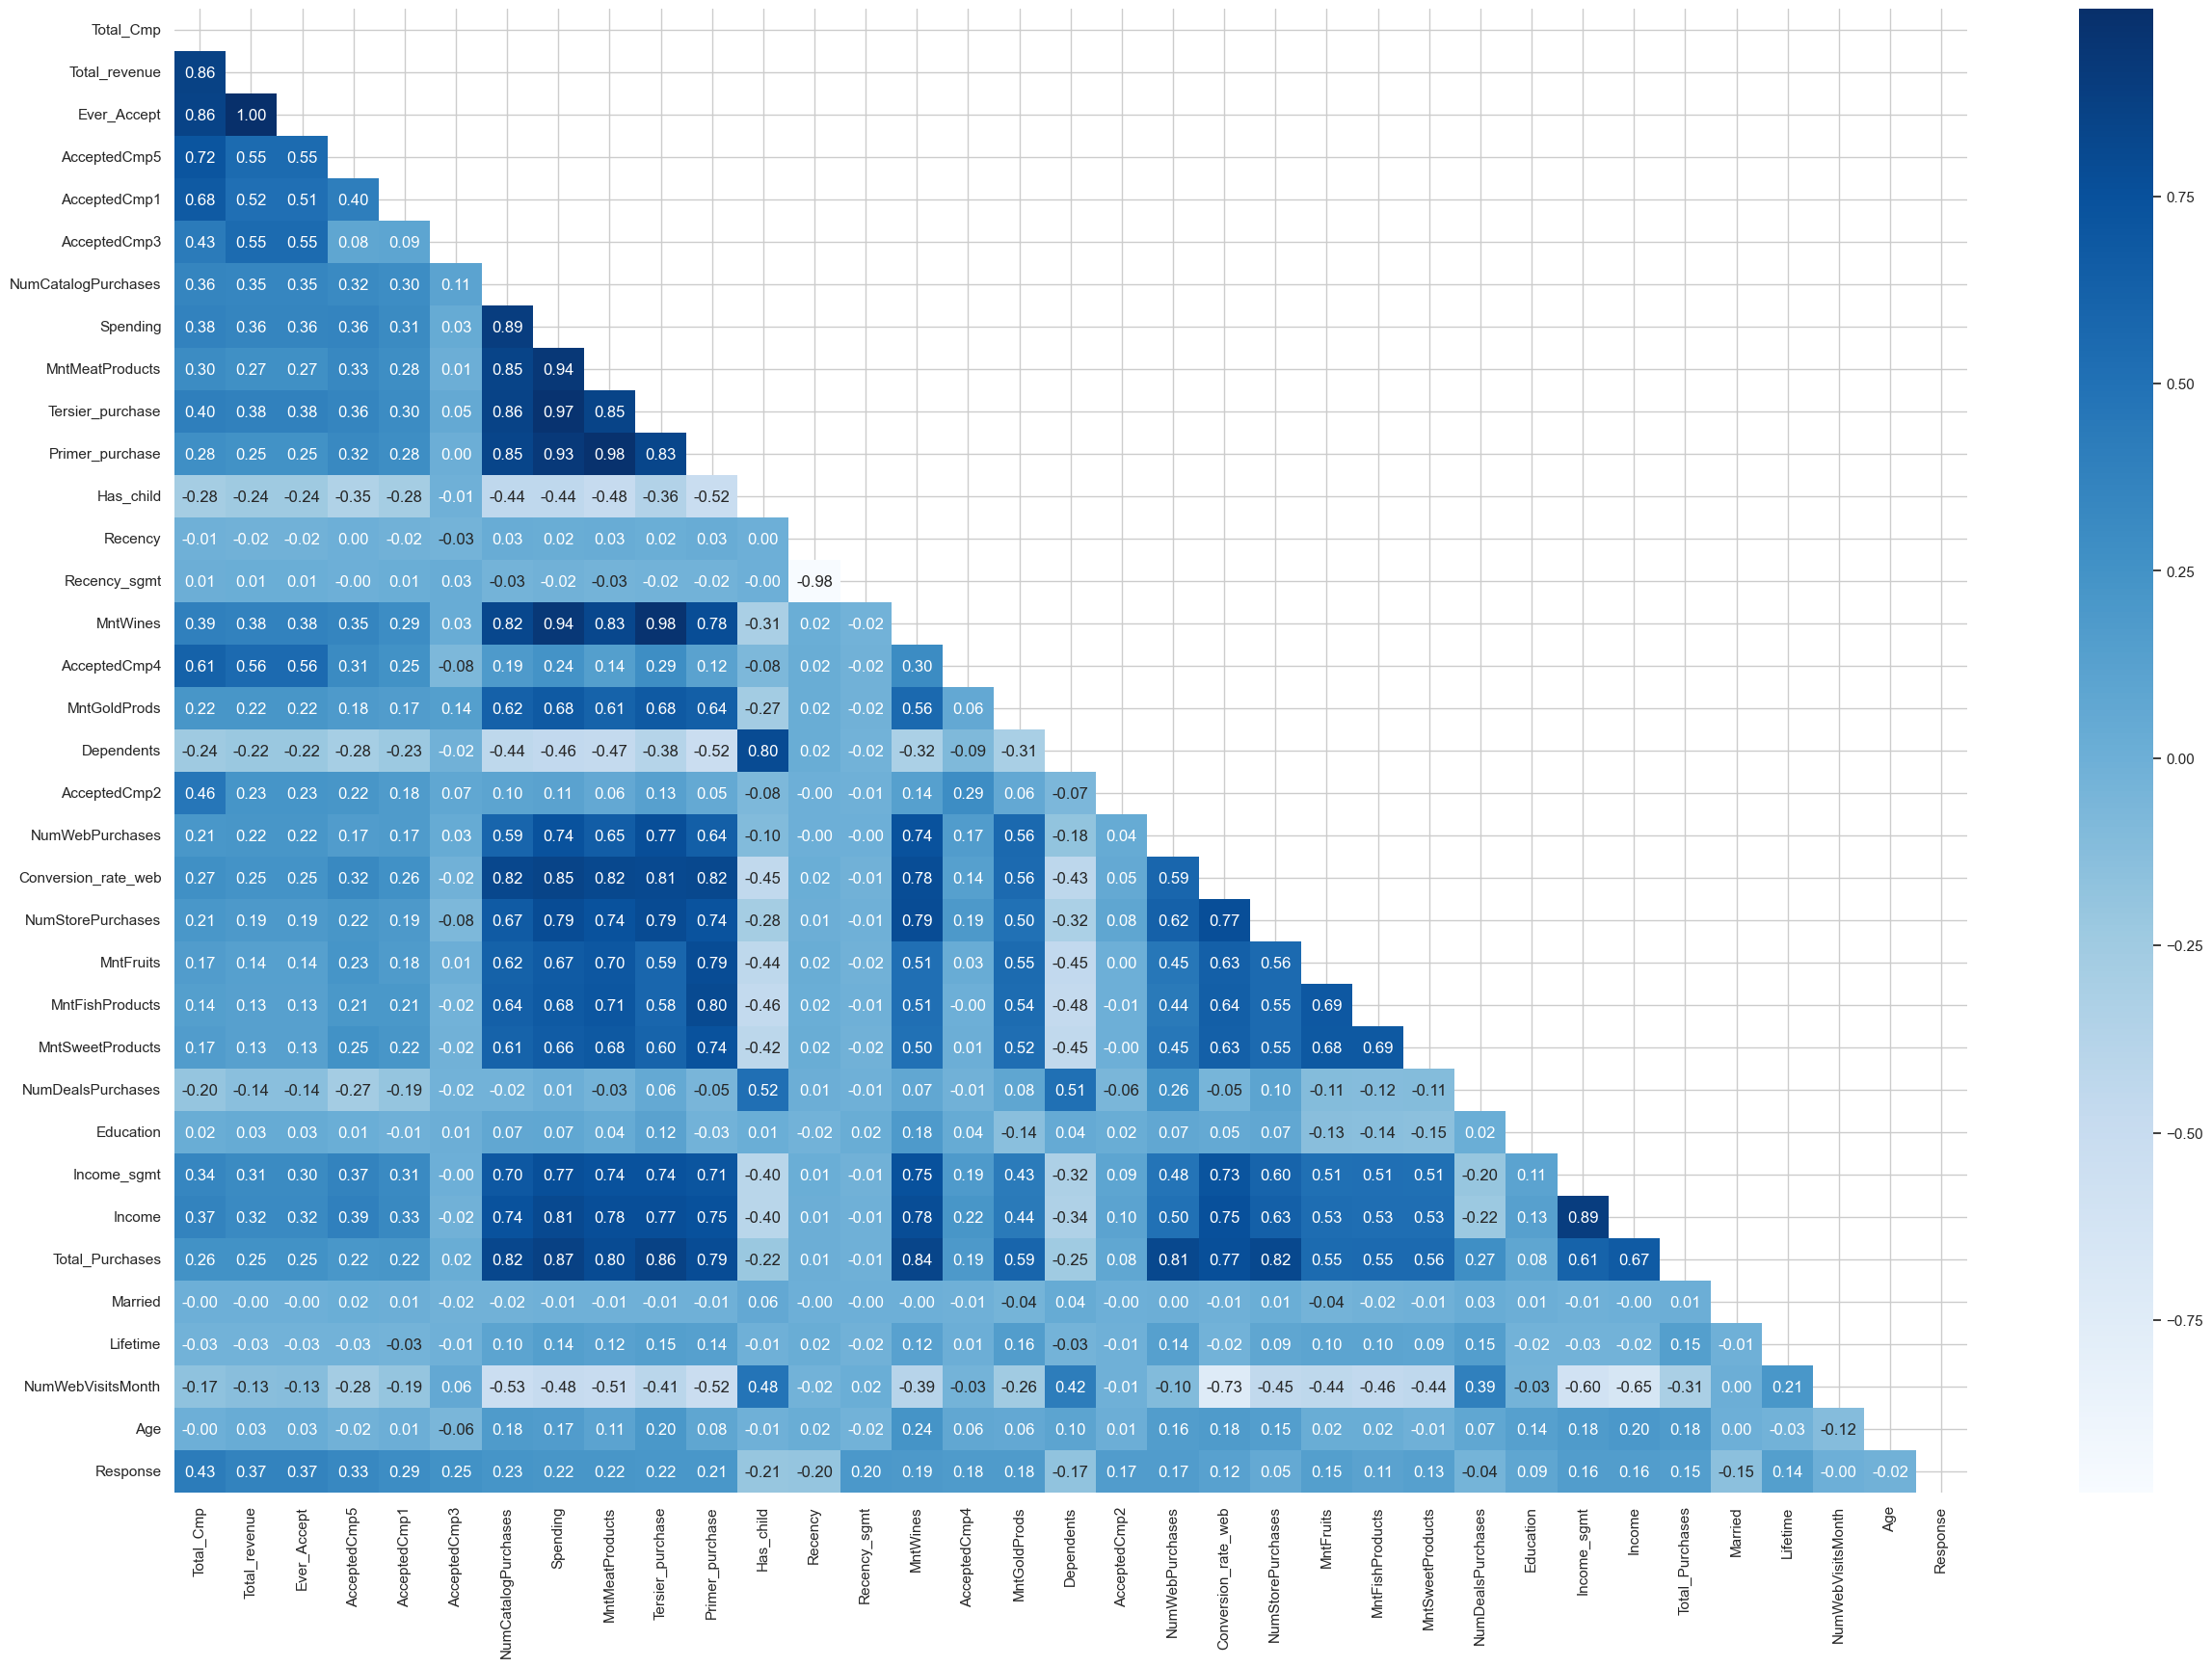

In [120]:
plt.figure(figsize=(30,20))
corr = df[feature_importance+["Response"]].corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=np.bool_)) 
sns.heatmap(corr, cmap='Blues', annot=True, fmt='.2f', mask=mask)

**Manampilkan Korelasi Feature > Threshold 0.70**

Akan ada info mengenai Feature apa saja yang perlu di drop

In [121]:
def corrtarget(x):
    target = "Response"
    return df[x].corr(df[target])

def corrresp(x):
    target = "Response"
    col1 = x["A"]
    col2 = x["B"]
    
    cor1 = df[col1].corr(df[target])
    cor2 = df[col2].corr(df[target])
    
    if cor1 < cor2:
        return col1
    else:
        return col2
    return col1

In [122]:
corr_matrix = df[feature_importance].corr()
target = "Response"

# Flatten correlation matrix.
flat_cm = corr_matrix.stack().reset_index()
flat_cm.columns = ['A', 'B', 'correlation']    
flat_cm = flat_cm.loc[flat_cm.correlation < 1, :]
flat_cm = flat_cm.sort_values("correlation", ascending=False)
redundan = flat_cm[flat_cm["correlation"] >= 0.7].reset_index(drop=True)
redundan['A vs Target'] = redundan['A'].apply(lambda x: corrtarget(x))
redundan['B vs Target'] = redundan['B'].apply(lambda x: corrtarget(x))
redundan = redundan.drop_duplicates(subset=["correlation"])
redundan["drop"] = redundan.apply(corrresp, axis=1)
redundan

A                    B  correlation  A vs Target  \
0            Ever_Accept        Total_revenue     0.999982     0.368726   
2        MntMeatProducts      Primer_purchase     0.977667     0.223704   
4               MntWines     Tersier_purchase     0.976146     0.193849   
6       Tersier_purchase             Spending     0.970442     0.215490   
8        MntMeatProducts             Spending     0.937875     0.223704   
10              MntWines             Spending     0.937196     0.193849   
12              Spending      Primer_purchase     0.929771     0.223961   
14              Spending  NumCatalogPurchases     0.894305     0.223961   
16                Income          Income_sgmt     0.892218     0.161643   
18              Spending      Total_Purchases     0.873134     0.223961   
20         Total_revenue            Total_Cmp     0.862955     0.369906   
22      Tersier_purchase      Total_Purchases     0.861373     0.215490   
24           Ever_Accept            Total_Cmp     0.860109     0.368726   
26      Tersier_purchase  NumCatalogPurchases     0.856828     0.215490   
28      Tersier_purchase      MntMeatProducts     0.852559     0.215490   
30   NumCatalogPurchases      MntMeatProducts     0.845912     0.233715   
32              Spending  Conversion_rate_web     0.845885     0.223961   
34       Primer_purchase  NumCatalogPurchases     0.845184     0.212989   
36              MntWines      Total_Purchases     0.837952     0.193849   
38       Primer_purchase     Tersier_purchase     0.831588     0.212989   
40              MntWines      MntMeatProducts     0.827052     0.193849   
42   NumCatalogPurchases      Total_Purchases     0.824437     0.233715   
44   Conversion_rate_web  NumCatalogPurchases     0.822555     0.124409   
46   NumCatalogPurchases             MntWines     0.822379     0.233715   
48       Primer_purchase  Conversion_rate_web     0.820758     0.212989   
50   Conversion_rate_web      MntMeatProducts     0.819193     0.124409   
52       Total_Purchases    NumStorePurchases     0.817244     0.154715   
54       NumWebPurchases      Total_Purchases     0.814707     0.168142   
56                Income             Spending     0.810414     0.161643   
58   Conversion_rate_web     Tersier_purchase     0.807067     0.124409   
60       Primer_purchase      MntFishProducts     0.803215     0.212989   
62            Dependents            Has_child     0.797991    -0.169451   
64       MntMeatProducts      Total_Purchases     0.796885     0.223704   
66     NumStorePurchases     Tersier_purchase     0.792896     0.049484   
68              Spending    NumStorePurchases     0.790225     0.223961   
70              MntWines    NumStorePurchases     0.788824     0.193849   
72       Total_Purchases      Primer_purchase     0.785870     0.154715   
74       Primer_purchase            MntFruits     0.785458     0.212989   
76                Income             MntWines     0.782283     0.161643   
78       Primer_purchase             MntWines     0.781794     0.212989   
80              MntWines  Conversion_rate_web     0.776535     0.193849   
82       MntMeatProducts               Income     0.775189     0.223704   
84                Income     Tersier_purchase     0.773699     0.161643   
86   Conversion_rate_web    NumStorePurchases     0.772984     0.124409   
88      Tersier_purchase      NumWebPurchases     0.768624     0.215490   
90       Total_Purchases  Conversion_rate_web     0.767078     0.154715   
92              Spending          Income_sgmt     0.766733     0.223961   
94   Conversion_rate_web               Income     0.754997     0.124409   
96                Income      Primer_purchase     0.747966     0.161643   
98              MntWines          Income_sgmt     0.747276     0.193849   
100               Income  NumCatalogPurchases     0.743607     0.161643   
102     MntSweetProducts      Primer_purchase     0.741737     0.134509   
104      MntMeatProducts          Income_sgmt   

**Drop Redundant Features**

In [123]:
for i in list(redundan["drop"].unique()):
    feature_importance.remove(i)
    
feature_importance = sorted(feature_importance)
feature_importance

['AcceptedCmp1',
 'AcceptedCmp2',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'Age',
 'Dependents',
 'Education',
 'Lifetime',
 'Married',
 'MntGoldProds',
 'NumCatalogPurchases',
 'NumDealsPurchases',
 'NumWebVisitsMonth',
 'Recency',
 'Recency_sgmt',
 'Total_Cmp']

### **Kesimpulan**

Berdasarkan hasil pengecekan pada beberapa fitur yang telah diproses menggunakan feature selection :
- Drop Unnecessary Feature
- Univariate Selection
    - Anova F-value
    - Variance Threshold
    - Mutual Information
    - SelectKBest
- Feature Importance
- Pearson Correlation
- Drop Redundace

Maka telah didapatkan feature yang akan digunakan pada proses modelling sebagai berikut :

In [124]:
df[feature_importance].head()

AcceptedCmp1  AcceptedCmp2  AcceptedCmp3  AcceptedCmp4       Age  \
0             0             0             0             0  0.696429   
1             0             0             0             0  0.750000   
2             0             0             0             0  0.553571   
3             0             0             0             0  0.214286   
4             0             0             0             0  0.267857   

   Dependents  Education  Lifetime  Married  MntGoldProds  \
0           0          1  0.914286      0.0      1.090527   
1           2          1  0.057143      0.0     -0.938568   
2           0          1  0.542857      1.0      0.448706   
3           1          1  0.028571      1.0     -1.043656   
4           1          3  0.000000      1.0     -0.342328   

   NumCatalogPurchases  NumDealsPurchases  NumWebVisitsMonth   Recency  \
0             1.726261           0.744158               0.35  0.585859   
1            -0.374162           0.158137               0.25  0.383838   
2             0.158930          -0.820155               0.20  0.262626   
3            -1.338023           0.158137               0.30  0.262626   
4             0.524042           1.442609               0.25  0.949495   

   Recency_sgmt  Total_Cmp  
0             2          0  
1             3          0  
2             3          0  
3             3          0  
4             0          0

## **📌 Data Splitting**

I will split the data into training set and testing set with proportion of 75:25.

In [125]:
# define X and y
X = df.drop(['Response'], axis=1)[feature_importance] #features
y = df['Response'] #target

In [126]:
from sklearn.model_selection import train_test_split

# splitting tha data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify= y, random_state=42)
print(X_train.shape, X_test.shape)

(1677, 16) (559, 16)


## **📌 Handling Imbalanced Data**

Status risiko highly imbalanced, dengan 15% Response dan 85% No Response. Itu sebabnya diperlukan resampling.

**Note**: Saat menerapkan  machine learning algorithms dengan data yang tidak seimbang, model yang diperoleh akan lebih condong ke kelas mayoritas. Artinya model akan memprediksi kelas mayoritas bukan kelas minoritas.

Jika kita ingin melakukan klasifikasi, maka seharusnya melakukan `stratified train_test_split` terlebih dahulu untuk menjaga ketidakseimbangannya (imbalance). Sehingga dataset test dan train memiliki distribusi yang sama, kemudian jangan pernah menyentuh test set lagi. Kemudian lakukan pengambilan sampel ulang hanya pada data train.

**Summary** : You must apply `SMOTE` after splitting into `training and test`, not before. Doing SMOTE before is bogus and defeats the purpose of having a separate test set.

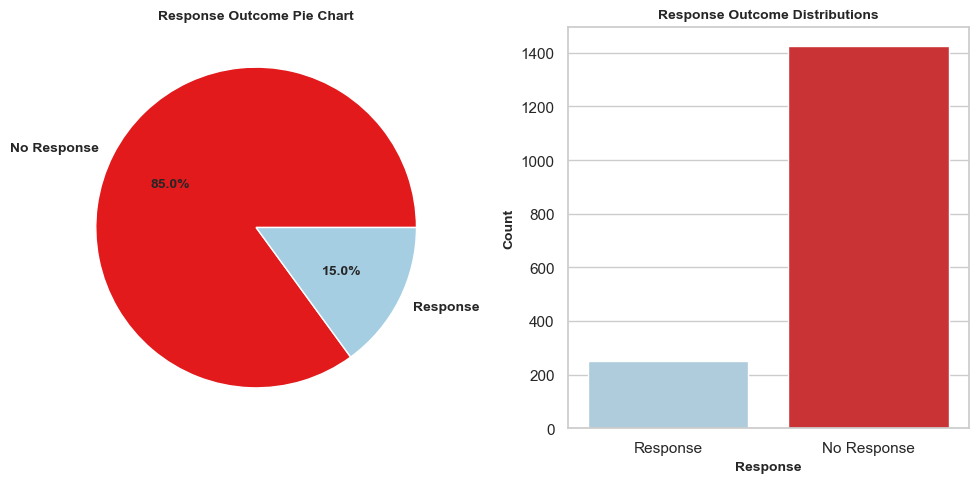

In [127]:
fig = plt.figure(figsize = (10, 5))

plt.subplot(121)
plt.pie(y_train.value_counts(),
        labels = ['No Response', 'Response'], 
        autopct = '%.1f%%', 
        radius = 1, 
        colors=["#e31a1c", "#a6cee3"],
        textprops={'fontsize': 10, 'fontweight': 'bold'})
plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')

plt.subplot(122)
resp = y_train.apply(lambda x: "No Response" if x == 0 else "Response")
t = sns.countplot(x=resp, palette=["#a6cee3", "#e31a1c"])
t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)

plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
plt.tight_layout()

In [128]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) # Response
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) # No Response

# Undersampling
# us = RandomUnderSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = us.fit_resample(X_train,y_train)

# Oversampling
# os = RandomOverSampler(sampling_strategy = 0.5)
# X_balanced_res, y_balanced_res = os.fit_resample(X_train,y_train)

# Oversampling SMOTE
sm = SMOTE(sampling_strategy=0.5, random_state = 2)
X_balanced_res, y_balanced_res = sm.fit_resample(X_train,y_train)

print('After OverSampling, the shape of X_train: {}'.format(X_balanced_res.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_balanced_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_balanced_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_balanced_res == 0)))

X_train = X_balanced_res
y_train = y_balanced_res

Before OverSampling, the shape of X_train: (1677, 16)
Before OverSampling, the shape of y_train: (1677,) 

Before OverSampling, counts of label '1': 251
Before OverSampling, counts of label '0': 1426 

After OverSampling, the shape of X_train: (2139, 16)
After OverSampling, the shape of y_train: (2139,) 

After OverSampling, counts of label '1': 713
After OverSampling, counts of label '0': 1426


# **====== STAGE 3 ======**
`Stage 3 (ML Modelling & Evaluation)`

## **Machine Learning Techniques**

Here are some algorithms that will be tested to determine the best model to predict customer response in Marketing Campign:
1. Decision Tree
2. Random Forest
3. Logistic Regression
4. Gaussian Naive Bayes
5. K-Nearest Neighbor
6. MLP Classifier (Neural Network)
7. Adaboost Classifier
8. XGBoost Classifier
9. Gradient Boosting Classifier
10. Support Vector Machine

### **Target Explanation**

> * `True Positive (TP)`, when a case was positive and predicted positive
> * `False Positive (FP)`, when a case was negative but predicted positive
> * `True Negative (TN)`, when a case was negative and predicted negative
> * `False Negative (FN)`, when a case was positive but predicted negative

> * `Positive / 1` = Customer yang Response
> * `Negative / 0` = Customer yang tidak Response

> * `False Negative` = Customer yang Response tetapi diprediksi tidak Response
> * `False Positive` = Customer yang tidak Response tetapi diprediksi Response

**Parameter Evaluasi Model**

- Precision as Primary Parameter Evaluation

    - Meningkatkan Response Rate 
    - Mereduksi False Positif (Customer yang diprediksi akan merespon, namun kenyataannya tidak)

- Recall as Secondary Parameter Evaluation

    - Mengoptimalkan Revenue Rate
    - Mereduksi False Negative (Customer yang diprediksi tidak mengikuti campaign, namun pada kenyataannya berkeinginan ikut campaign)
    
- F1 Score for check positif and negative score (Imbalance Data)

**Interpretation**

- Precision – What percent of your predictions were correct? :

    Dari test data yang diprediksi positif (Response), berarti x% yg sesungguhnya positif (Response)

- Recall – What percent of the positive cases did we catch? :

    Dari semua yang sebenarnya positif (Response), yang berhasil diprediksi positif (Response) x%

#### `Target Metrics` =  `Precision` / `Recall` & `F1 Score`

- `Precision` adalah rasio prediksi benar positif dibandingkan dengan keseluruhan hasil yang diprediksi positf. Pilih algoritma yang memiliki `Precision` tinggi, jika skenario yang dipilih adalah `False Negative lebih baik terjadi daripada False Positif`.

    `Precission = (TP) / (TP+FP)`

- `Recall` adalah rasio kasus dengan prediksi benar positif dibandingkan dengan keseluruhan data yang benar positif. Pilih algoritma yang memiliki `Recall` tinggi, jika skenario yang dipilih adalah `False Positive lebih baik terjadi daripada False Negative`.
    
    `Recall = (TP) / (TP + FN)`

- `F1-Score` atau dikenal juga dengan nama F-Measure didapatkan dari perbandingan rata-rata presisi dengan recall yang dibobotkan

    `F1 Score = 2 * (Recall*Precission) / (Recall + Precission)`


#### **Description Classification Report :**

It is a python method under sklearn metrics API, useful when we need class-wise metrics alongside global metrics. It provides precision, recall, and F1 score at individual and global levels. 

* The `precision` will be "how many are correctly classified among that class" ( Percentage of correct positive predictions relative to total positive predictions.)

* The `recall` means "how many of this class you find over the whole number of element of this class". (Percentage of correct positive predictions relative to total actual positives.)

* The `f1-score` is the harmonic mean between precision & recall. The closer to 1, the better the model.

* The `support` is the number of occurence of the given class in dataset. These values simply tell us how many players belonged to each class in the test dataset. (to check balanced dataset/Proportion)

* `Accuracy` is The sum of the true positives and true negatives over the total number of samples.

* `Macro Average` is The mean average of the precision/recall/F1-score of all the classes.

* `Weighted Average` is Calculates the scores for each class independent of one another but when it adds them together it takes into account the number of true classifications of each class.


**References**

- https://rey1024.medium.com/mengenal-accuracy-precission-recall-dan-specificity-serta-yang-diprioritaskan-b79ff4d77de8
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
- https://www.statology.org/sklearn-classification-report/
- https://muthu.co/understanding-the-classification-report-in-sklearn/#:~:text=A%20Classification%20report%20is%20used,classification%20report%20as%20shown%20below.





In [130]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.naive_bayes import GaussianNB #gaussian naive bayes
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier #decision tree
from sklearn.ensemble import RandomForestClassifier #random forest
from sklearn.neighbors import KNeighborsClassifier #k-nearest neighbor
from sklearn.svm import SVC # Support Vector Machine/Classifier
from sklearn.neural_network import MLPClassifier #neural network
from sklearn.ensemble import GradientBoostingClassifier #gradient boosting
from xgboost import XGBClassifier #xgboost
from sklearn.ensemble import AdaBoostClassifier #Adaboost

from sklearn import metrics
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_auc_score, roc_curve #roc score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance

## **Function for Model Evaluation**

In [131]:
def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.3f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.3f" % accuracy_score(y_test, y_pred))
    print("Precision (Train Set): %.3f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.3f" % precision_score(y_test, y_pred))
    print("Recall (Train Set): %.3f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.3f" % recall_score(y_test, y_pred))
    print("F1-Score (Train Set): %.3f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.3f" % f1_score(y_test, y_pred))
    print("roc_auc (train-proba): %.3f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.3f" % roc_auc_score(y_test, y_pred_proba[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))
    
# define function to see the feature importance for decision tree model 

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')
    
# define function to see the best tuning hyperparameter 

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [132]:
train_classifier_list = []
train_modelname_list = []
train_accuracy_list = []
train_recall_list = []
train_precision_list = []
train_f1_score_list= [] 
train_roc_auc_score_list = []
train_cross_val_score_list = []

In [133]:
def model_eval_train(classifier, model_name, X_train, y_train):
    # predict data train
    y_train_pred = classifier.predict(X_train)

    # print classification report
    print('Classification Report Training Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_train , y_train_pred) , 3)
    precision = round(precision_score(y_train, y_train_pred)  ,3)
    recall = round(recall_score(y_train , y_train_pred) ,3)
    f1_s = round(f1_score(y_train , y_train_pred) , 3)
    rocauc_score = round(roc_auc_score(y_train , y_train_pred) , 3)
    c_val_score = round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'F1  Score is :{f1_s}')
    print(f'ROC AUC Score is :{rocauc_score}')
    print(f'Cross Val Score (k=10) is :{c_val_score}\n')

    print(classification_report(y_train, y_train_pred))

    # save report detail
    train_classifier_list.append(classifier)
    train_modelname_list.append(model_name)
    train_accuracy_list.append(accuracy)
    train_recall_list.append(recall)
    train_precision_list.append(precision)
    train_f1_score_list.append(f1_s)
    train_roc_auc_score_list.append(rocauc_score)
    train_cross_val_score_list.append(c_val_score)

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_train, y_train_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_train, y_train_pred).ravel()

    print("==== Actual Data (Train) =====")
    print("Total =", len(y_train))
    print("No Response =", len(y_train[y_train == 0]))
    print("Response =", len(y_train[y_train == 1]))
    print("==== Predicted Data (Train) =====")
    print("TN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    heatmap = sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBu')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Training Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('\nPredicted label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_train, y_train_pred)
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

In [134]:
test_classifier_list = []
test_modelname_list = []
test_accuracy_list = []
test_recall_list = []
test_precision_list = []
test_f1_score_list= [] 
test_roc_auc_score_list = []
test_cross_val_score_list = []

In [135]:
def model_eval_test(classifier, model_name, X_test, y_test):

     # predict data test
    y_test_pred = classifier.predict(X_test)

    # print classification report
    print('Classification Report Testing Model ('+model_name+'):\n')
    accuracy = round(accuracy_score(y_test , y_test_pred) , 3)
    precision = round(precision_score(y_test, y_test_pred)  ,3)
    recall = round(recall_score(y_test , y_test_pred) ,3)
    f1_s = round(f1_score(y_test , y_test_pred) , 3)
    rocauc_score = round(roc_auc_score(y_test , y_test_pred) , 3)
    c_val_score = round(cross_val_score(classifier , X , y , cv=10 , scoring='accuracy').mean()  , 3)
    print(f'Accuracy Score is :{accuracy}')
    print(f'Precision Score is :{precision}')
    print(f'Recall Score is :{recall}')
    print(f'F1  Score is :{f1_s}')
    print(f'ROC AUC Score is :{rocauc_score}')
    print(f'Cross Val Score (k=10) is :{c_val_score}\n')
    
    print(classification_report(y_test, y_test_pred))

    # save report detail
    test_classifier_list.append(classifier)
    test_modelname_list.append(model_name)
    test_accuracy_list.append(accuracy)
    test_recall_list.append(recall)
    test_precision_list.append(precision)
    test_f1_score_list.append(f1_s)
    test_roc_auc_score_list.append(rocauc_score)
    test_cross_val_score_list.append(c_val_score)

    # form confusion matrix as a dataFrame
    conf_matrix = pd.DataFrame((confusion_matrix(y_test, y_test_pred)), ('No Response', 'Response'), ('No Response', 'Response'))
    tn, fp, fn, tp = confusion_matrix(y_test, y_test_pred).ravel()

    print("==== Actual Data (Test) =====")
    print("Total =", len(y_test))
    print("No Response =", len(y_test[y_test == 0]))
    print("Response =", len(y_test[y_test == 1]))
    print("==== Predicted Data (Test) =====")
    print("TN = {}, FP = {}, FN = {}, TP = {}".format(tn, fp, fn, tp))
    print("Predictly Correct =", tn+tp)
    print("Predictly Wrong =", fn+fp, "\n")

    # plot confusion matrix
    plt.figure(figsize=[8,5])
    heatmap = sns.heatmap(conf_matrix, annot=True, annot_kws={'size': 13}, fmt='d', cmap='PuBuGn')
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=13)

    plt.title('Confusion Matrix for Testing Model ('+model_name+')\n', fontsize=13, color='black')
    plt.ylabel('True label', fontsize=13)
    plt.xlabel('\nPredicted label', fontsize=13)
    plt.show()
    print("\n")

    # ROC AUC Curve
    plt.figure(figsize=[8,5])
    fpr, tpr, threshold = roc_curve(y_test, y_test_pred)
    plt.plot(fpr, tpr, label = model_name+' (Area (Score) = %0.2f)'%rocauc_score)
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Customer Purchase Deposit')
    plt.legend(loc="lower right")
    plt.show()

In [136]:
def feature_importance_plot(classifier, model_name, X_train=None):
    # important features
    # K-Nearest Neighbors/MLP Classifier = No Function/Method to Check Feature Importance
    if model_name == "Logistic Regression":
        # Logistic Regression
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': log_model.coef_[0]
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    elif model_name in ["Naive Bayes", "K-Nearest Neighbors", "MLP Classifier", "Support Vector Machine"]:
        imp = pd.DataFrame(data={
            'Attribute': X_train.columns,
            'Importance': permutation_importance(gnb_model, X_test, y_test).importances_mean
        })
        imp = imp.sort_values(by='Importance', ascending=False).set_index("Attribute")
        ft_imp = imp["Importance"]
    else: 
        # Decision Tree
        # Random Forest
        # XGBoost Classifier
        # Gradient Boosting Classifier
        ft_imp = classifier.feature_importances_

    importances = pd.Series(ft_imp, index=X.columns).sort_values(ascending=False)

    plt.figure(figsize=(10,7))
    fig = importances.plot(kind ='barh', color='#7faadb', width=0.8)
    plt.title('Features Importance Plot '+model_name+'\n', fontsize=14)

    # Annotate every single Bar with its value, based on it's width   
    N = len(importances)
    thickness = range(1, N+1)
    thick_sum = sum(thickness) 
    barmax = max(importances) 
    for i, p in enumerate(fig.patches):
            fig.annotate("%.2f" % (p.get_width()),
                        (p.get_x() + p.get_width(), p.get_y() + 1),
                        xytext=(5, 15), textcoords='offset points')
            fig.set_ylim(N, -1)
            fig.set_xlim(0,barmax*1.4)

    fig.figure.tight_layout()
    plt.show()

## **Modelling**

### **1. Decision Tree**

In [137]:
# train the model
dt_model = DecisionTreeClassifier().fit(X_train,y_train)
print(dt_model)
eval_classification(dt_model)

DecisionTreeClassifier()
Accuracy (Train Set): 0.997
Accuracy (Test Set): 0.814
Precision (Train Set): 1.000
Precision (Test Set): 0.398
Recall (Train Set): 0.990
Recall (Test Set): 0.494
F1-Score (Train Set): 0.995
F1-Score (Test Set): 0.441
roc_auc (train-proba): 1.000
roc_auc (test-proba): 0.686
roc_auc (crossval train): 0.999790999963551
roc_auc (crossval test): 0.6750012889376473


#### **Performance of Training Model**

Classification Report Training Model (Decision Tree):

Accuracy Score is :0.997
Precision Score is :1.0
Recall Score is :0.99
F1  Score is :0.995
ROC AUC Score is :0.995
Cross Val Score (k=10) is :0.831

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1426
           1       1.00      0.99      1.00       713

    accuracy                           1.00      2139
   macro avg       1.00      1.00      1.00      2139
weighted avg       1.00      1.00      1.00      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Train) =====
TN = 1426, FP = 0, FN = 7, TP = 706
Predictly Correct = 2132
Predictly Wrong = 7 



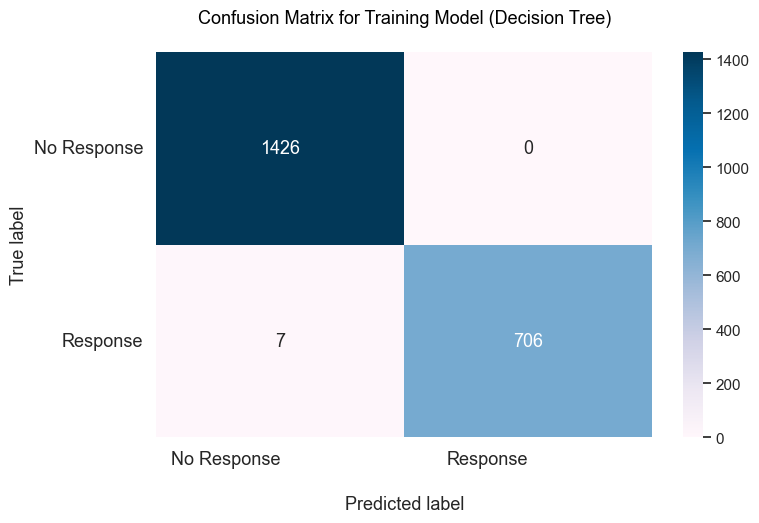

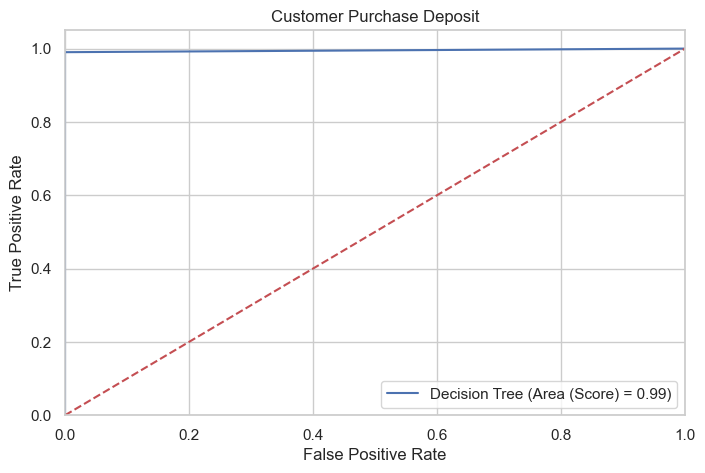

In [138]:
model_eval_train(dt_model, "Decision Tree", X_train, y_train)

Based on the **classification report** results, the training model of `Decision Tree` algorithms has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it observed that:

- The classifier made a total of 3187 predictions. All of them 3187 were predicted correctly.
- The classifier predicted 
     - `Response (TP) 448 times`
     - `No Response (TN) 2739 times`

     In reality, Response status in the sample has the same value.
- Response and No Response are both the best-classified classes. The decision tree model classified 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (Decision Tree):

Accuracy Score is :0.814
Precision Score is :0.398
Recall Score is :0.494
F1  Score is :0.441
ROC AUC Score is :0.682
Cross Val Score (k=10) is :0.835

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       476
           1       0.40      0.49      0.44        83

    accuracy                           0.81       559
   macro avg       0.65      0.68      0.66       559
weighted avg       0.83      0.81      0.82       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 414, FP = 62, FN = 42, TP = 41
Predictly Correct = 455
Predictly Wrong = 104 



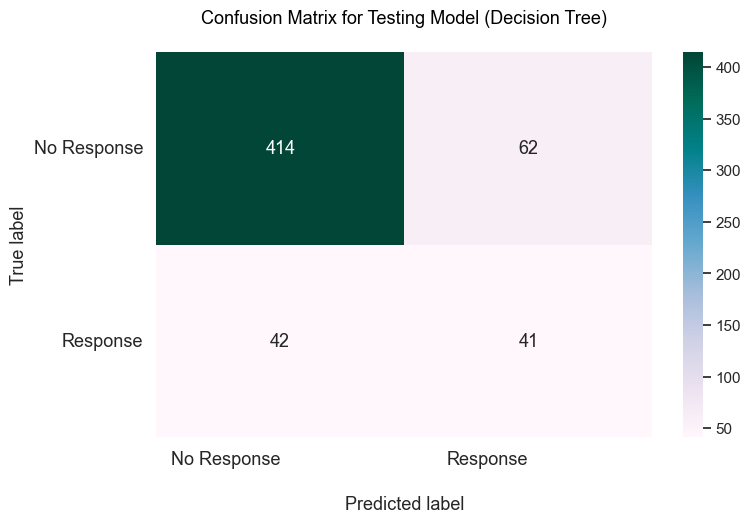

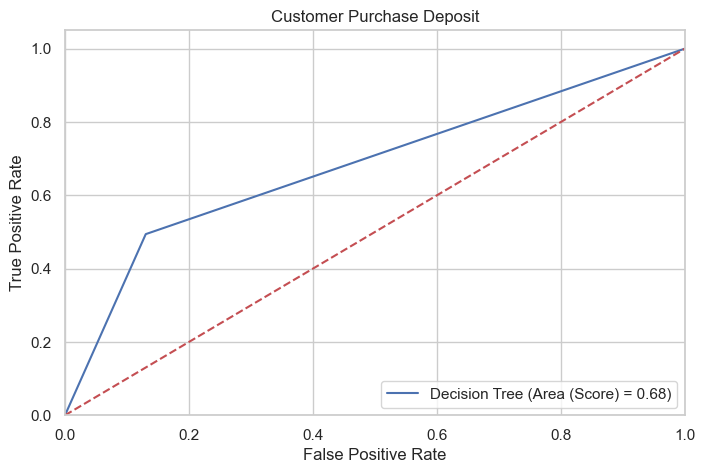

In [139]:
model_eval_test(dt_model, "Decision Tree", X_test, y_test)

Based on the **classification report** results, the testing model of `Decision Tree` algorithms has a `high accuracy, recall and f1 score` above 80%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 126 times`
     - `No Response (TN) 890 times`
- Response and No Response are both well classified. The decision tree model classified approaches 100% of them correctly.
- Both recall and f1-score are also pretty good
- However, there is an indication of `Overfitting`, but not high

In [140]:
acc_dt_train=round(dt_model.score(X_train,y_train)*100,2)
acc_dt_test=round(dt_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_dt_train))
print("Testing Accuracy: {} %".format(acc_dt_test))

Training Accuracy: 99.67 %
Testing Accuracy: 81.4 %


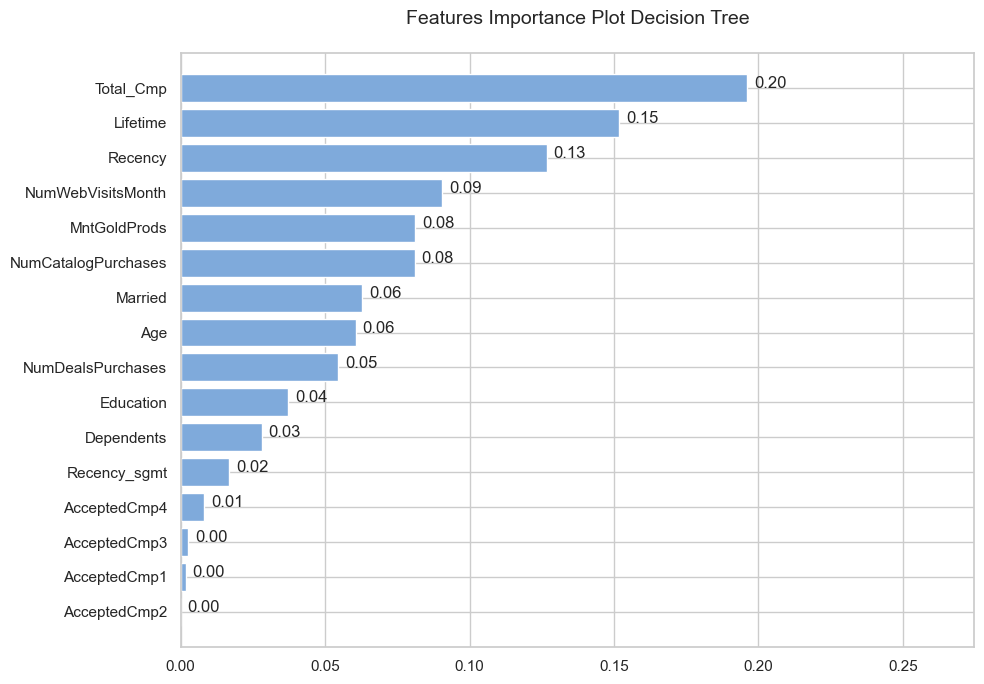

In [141]:
feature_importance_plot(dt_model, "Decision Tree")

### **2. Random Forest**

In [142]:
# train the model
rf_model = RandomForestClassifier().fit(X_train, y_train)
print(rf_model)
eval_classification(rf_model)

RandomForestClassifier()
Accuracy (Train Set): 0.997
Accuracy (Test Set): 0.887
Precision (Train Set): 0.997
Precision (Test Set): 0.652
Recall (Train Set): 0.993
Recall (Test Set): 0.518
F1-Score (Train Set): 0.995
F1-Score (Test Set): 0.577
roc_auc (train-proba): 1.000
roc_auc (test-proba): 0.887
roc_auc (crossval train): 0.9997678644718613
roc_auc (crossval test): 0.8755894353097317


#### **Performance of Training Model**

Classification Report Training Model (Random Forest):

Accuracy Score is :0.997
Precision Score is :0.997
Recall Score is :0.993
F1  Score is :0.995
ROC AUC Score is :0.996
Cross Val Score (k=10) is :0.89

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1426
           1       1.00      0.99      1.00       713

    accuracy                           1.00      2139
   macro avg       1.00      1.00      1.00      2139
weighted avg       1.00      1.00      1.00      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Train) =====
TN = 1424, FP = 2, FN = 5, TP = 708
Predictly Correct = 2132
Predictly Wrong = 7 



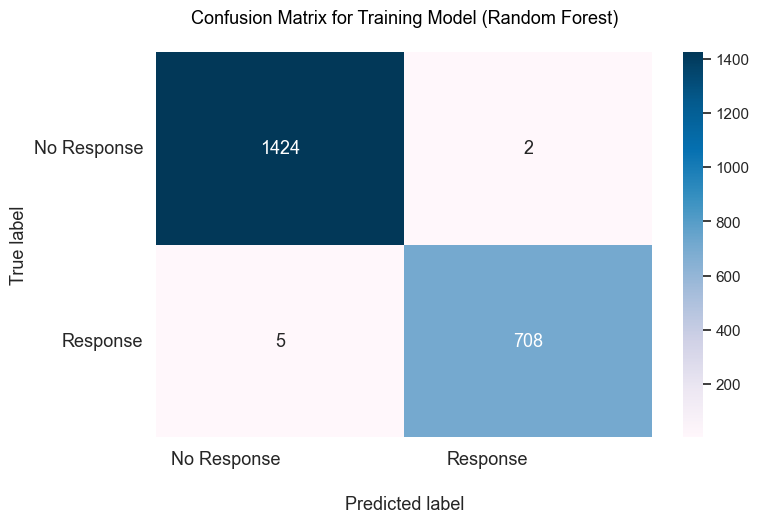

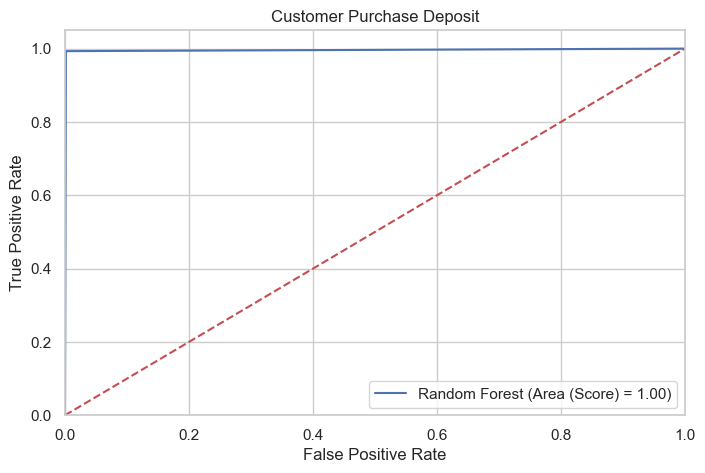

In [143]:
model_eval_train(rf_model, "Random Forest", X_train, y_train)

Based on the **classification report** results, the training model of `Random Forest` algorithms also has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it observed that:

- The classifier made a total of 3187 predictions. All of them 3187 were predicted correctly.
- The classifier predicted 
     - `Response (TP) 448 times`
     - `No Response (TN) 2739 times`
     
     In reality, Response status in the sample has the same value.
- Response and No Response are both the best-classified classes. The model classified 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (Random Forest):

Accuracy Score is :0.887
Precision Score is :0.652
Recall Score is :0.518
F1  Score is :0.577
ROC AUC Score is :0.735
Cross Val Score (k=10) is :0.885

              precision    recall  f1-score   support

           0       0.92      0.95      0.93       476
           1       0.65      0.52      0.58        83

    accuracy                           0.89       559
   macro avg       0.79      0.73      0.76       559
weighted avg       0.88      0.89      0.88       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 453, FP = 23, FN = 40, TP = 43
Predictly Correct = 496
Predictly Wrong = 63 



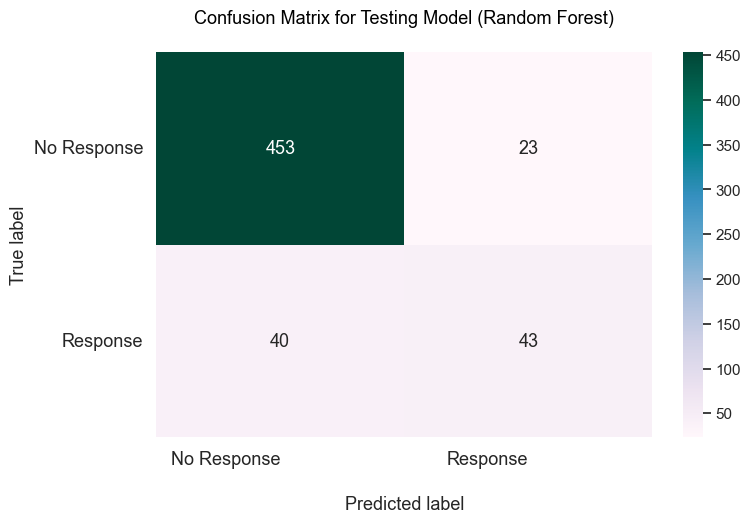

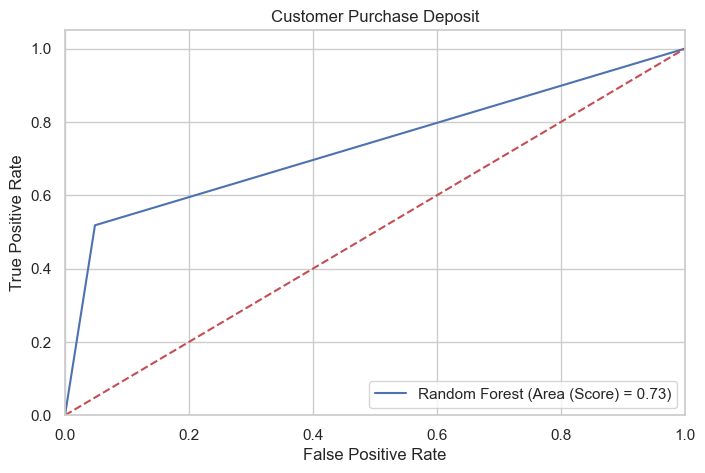

In [144]:
model_eval_test(rf_model, "Random Forest", X_test, y_test)

Based on the **classification report** results, the testing model of `Random Forest` algorithms has a `very high accuracy, recall and f1 score` above 97%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 127 times`
     - `No Response (TN) 912 times`
- Response and No Response are both well classified. The model classified approaches 100% of them correctly.
- Both recall and f1-score are also pretty good

In [145]:
acc_rf_train=round(rf_model.score(X_train,y_train)*100,2)
acc_rf_test=round(rf_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_rf_train))
print("Test Accuracy: {} %".format(acc_rf_test))

Training Accuracy: 99.67 %
Test Accuracy: 88.73 %


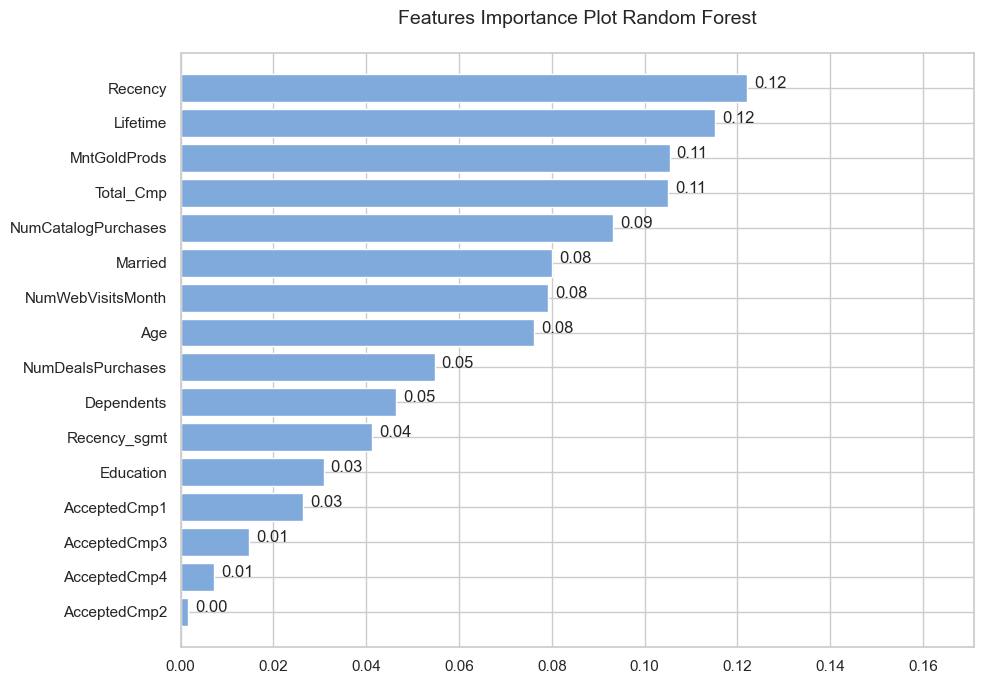

In [146]:
feature_importance_plot(rf_model, "Random Forest")

### **3. Logistic Regression**

In [147]:
# train the model
log_model = LogisticRegression(solver='lbfgs', max_iter=len(X_train)).fit(X_train, y_train)
print(log_model)
eval_classification(log_model)

LogisticRegression(max_iter=2139)
Accuracy (Train Set): 0.793
Accuracy (Test Set): 0.859
Precision (Train Set): 0.737
Precision (Test Set): 0.519
Recall (Train Set): 0.589
Recall (Test Set): 0.651
F1-Score (Train Set): 0.655
F1-Score (Test Set): 0.578
roc_auc (train-proba): 0.868
roc_auc (test-proba): 0.885
roc_auc (crossval train): 0.8794359171805848
roc_auc (crossval test): 0.873039523026843


#### **Performance of Training Model**

Classification Report Training Model (Logistic Regression):

Accuracy Score is :0.793
Precision Score is :0.737
Recall Score is :0.589
F1  Score is :0.655
ROC AUC Score is :0.742
Cross Val Score (k=10) is :0.882

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      1426
           1       0.74      0.59      0.65       713

    accuracy                           0.79      2139
   macro avg       0.78      0.74      0.75      2139
weighted avg       0.79      0.79      0.79      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Train) =====
TN = 1276, FP = 150, FN = 293, TP = 420
Predictly Correct = 1696
Predictly Wrong = 443 



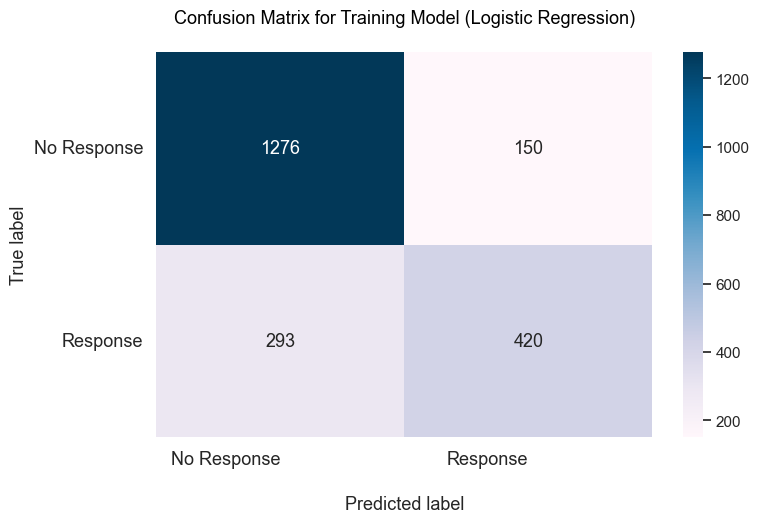

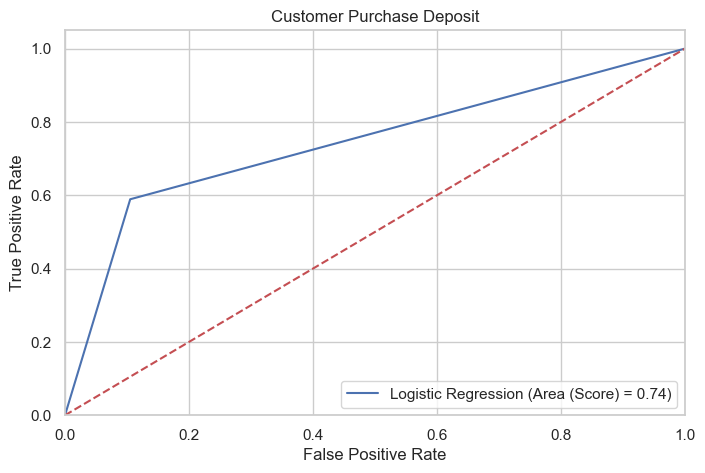

In [148]:
model_eval_train(log_model, "Logistic Regression", X_train, y_train)

Based on the **classification report** results, the training model of `Logistic Regression` algorithms have a `fairly good accuracy`, but `very poor recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
    - `Response (TP) 47 times`
    - `No Response (TN) 2697 times`
     
      In reality, this value is a high indication of incorrect predictions FP = 42, FN = 401.
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also very bad

#### **Performance of Testing Model**

Classification Report Testing Model (Logistic Regression):

Accuracy Score is :0.859
Precision Score is :0.519
Recall Score is :0.651
F1  Score is :0.578
ROC AUC Score is :0.773
Cross Val Score (k=10) is :0.882

              precision    recall  f1-score   support

           0       0.94      0.89      0.92       476
           1       0.52      0.65      0.58        83

    accuracy                           0.86       559
   macro avg       0.73      0.77      0.75       559
weighted avg       0.87      0.86      0.87       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 426, FP = 50, FN = 29, TP = 54
Predictly Correct = 480
Predictly Wrong = 79 



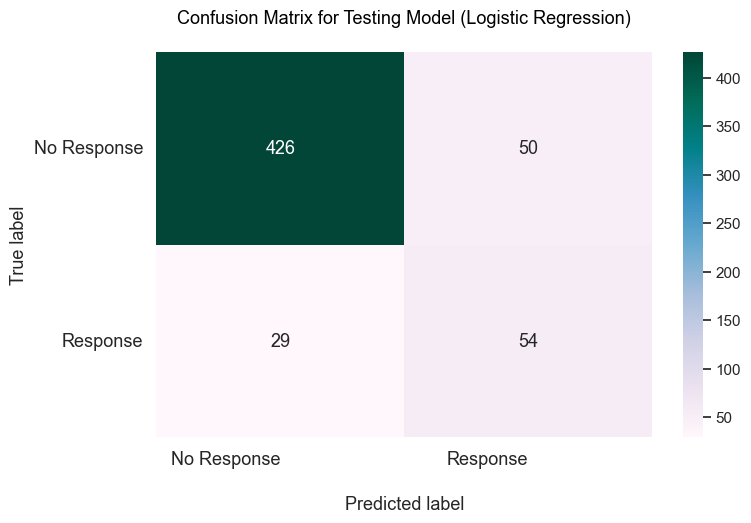

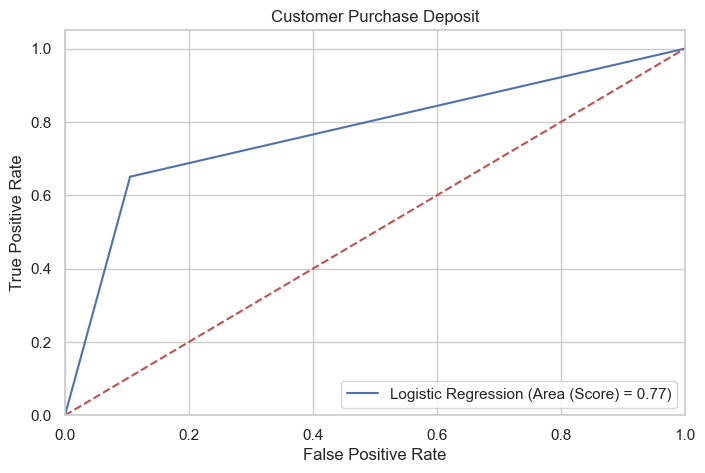

In [149]:
model_eval_test(log_model, "Logistic Regression", X_test, y_test)

Based on the **classification report** results, the training model of `Logistic Regression` algorithms have a `fairly good accuracy and f1 score`, but `quite low on recall` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 7 times`
     - `No Response (TN) 898 times`
     
       In reality, this value is a high indication of incorrect predictions on False Negative, FN = 143
- No Response are not very good at classified classes
- Recalls are also quite low

In [150]:
acc_log_train=round(log_model.score(X_train,y_train)*100,2)
acc_log_test=round(log_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_log_train))
print("Test Accuracy: {} %".format(acc_log_test))

Training Accuracy: 79.29 %
Test Accuracy: 85.87 %


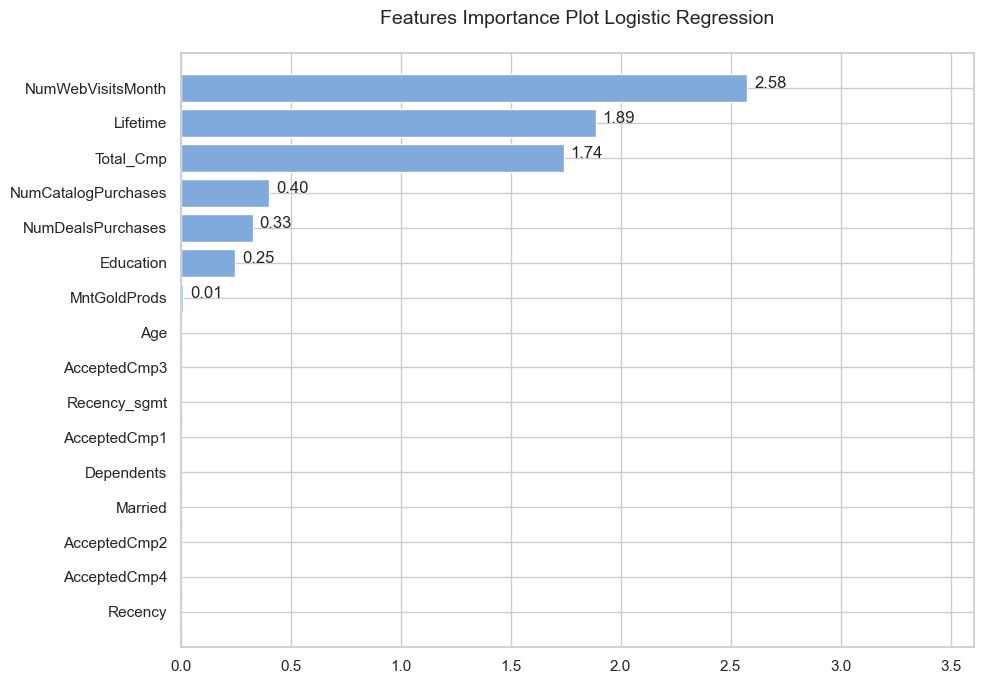

In [151]:
feature_importance_plot(log_model, "Logistic Regression", X_train)

### **4. Naive Bayes**

In [152]:
# train the model
gnb_model = GaussianNB().fit(X_train, y_train)
print(gnb_model)
eval_classification(gnb_model)

GaussianNB()
Accuracy (Train Set): 0.736
Accuracy (Test Set): 0.819
Precision (Train Set): 0.653
Precision (Test Set): 0.413
Recall (Train Set): 0.443
Recall (Test Set): 0.518
F1-Score (Train Set): 0.528
F1-Score (Test Set): 0.460
roc_auc (train-proba): 0.799
roc_auc (test-proba): 0.832
roc_auc (crossval train): 0.8258476821232505
roc_auc (crossval test): 0.8220804028433102


#### **Performance of Training Model**

Classification Report Training Model (Naive Bayes):

Accuracy Score is :0.736
Precision Score is :0.653
Recall Score is :0.443
F1  Score is :0.528
ROC AUC Score is :0.663
Cross Val Score (k=10) is :0.828

              precision    recall  f1-score   support

           0       0.76      0.88      0.82      1426
           1       0.65      0.44      0.53       713

    accuracy                           0.74      2139
   macro avg       0.71      0.66      0.67      2139
weighted avg       0.72      0.74      0.72      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Train) =====
TN = 1258, FP = 168, FN = 397, TP = 316
Predictly Correct = 1574
Predictly Wrong = 565 



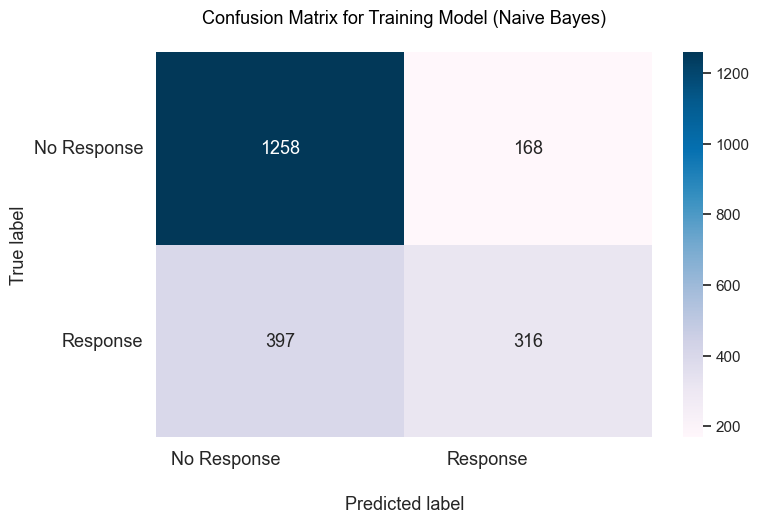

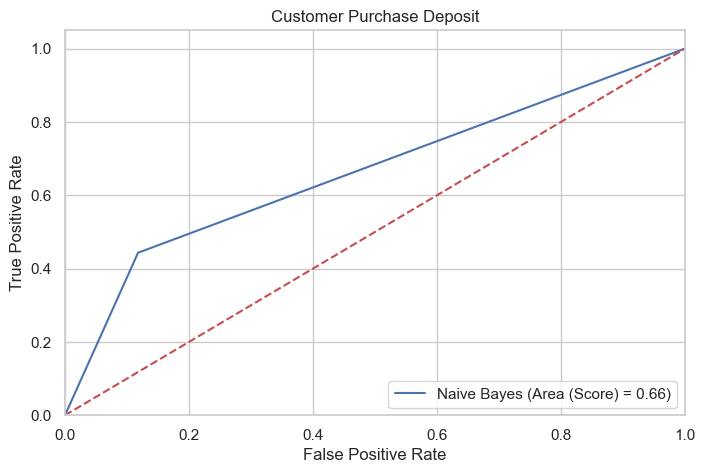

In [153]:
model_eval_train(gnb_model, "Naive Bayes", X_train, y_train)

Based on the **classification report** results, the training model of `Naive Bayes` algorithms have a `fairly good accuracy`, but `quite low recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
     - `Response (TP) 251 times`
     - `No Response (TN) 2530 times`
     
       In reality, this value is a high indication of incorrect predictions FP = 209, FN = 197
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also quite low

#### **Performance of Testing Model**

Classification Report Testing Model (Naive Bayes):

Accuracy Score is :0.819
Precision Score is :0.413
Recall Score is :0.518
F1  Score is :0.46
ROC AUC Score is :0.695
Cross Val Score (k=10) is :0.828

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       476
           1       0.41      0.52      0.46        83

    accuracy                           0.82       559
   macro avg       0.66      0.69      0.68       559
weighted avg       0.84      0.82      0.83       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 415, FP = 61, FN = 40, TP = 43
Predictly Correct = 458
Predictly Wrong = 101 



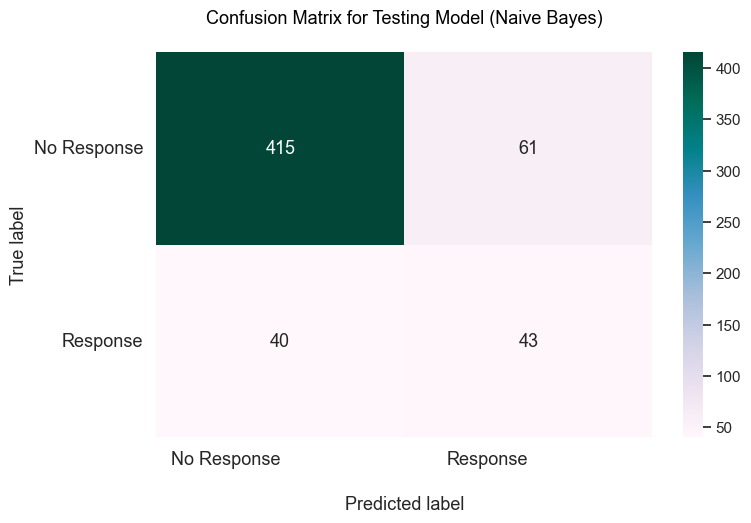

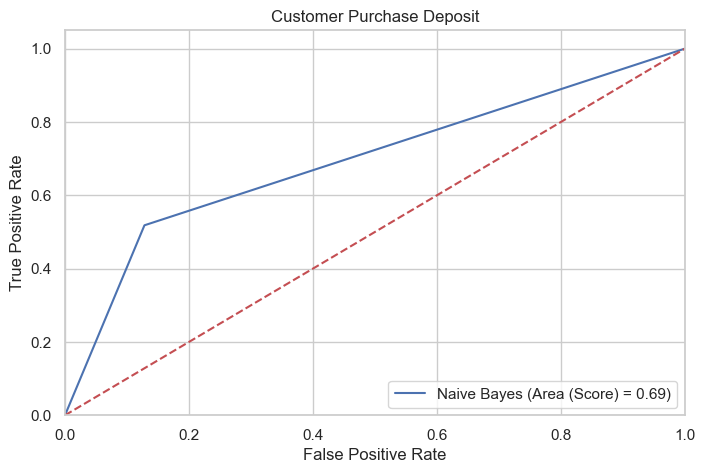

In [154]:
model_eval_test(gnb_model, "Naive Bayes", X_test, y_test)

Based on the **classification report** results, the training model of `Naive Bayes` algorithms have a `fairly good accuracy`, but `quite low on recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
    - `Response (TP) 79 times`
    - `No Response (TN) 840 times`
     
    In reality, this value is a high indication of incorrect predictions on both, FP = 73, FN = 71
- Response and No Response are not very good at classified classes
- Both Recalls and f1-score are also quite low

In [155]:
acc_gnb_train=round(gnb_model.score(X_train,y_train)*100,2)
acc_gnb_test=round(gnb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gnb_train))
print("Test Accuracy: {} %".format(acc_gnb_test))

Training Accuracy: 73.59 %
Test Accuracy: 81.93 %


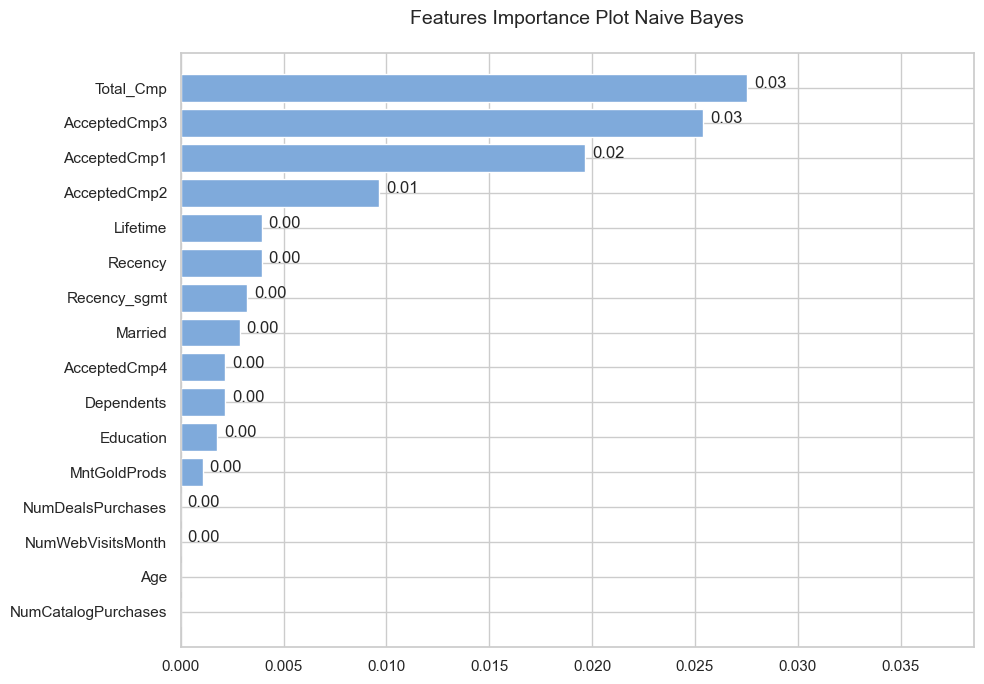

In [156]:
feature_importance_plot(gnb_model, "Naive Bayes", X_train)

### **5. K-Nearest Neighbors**

In [157]:
# train the model
knn_model = KNeighborsClassifier().fit(X_train,y_train)
print(knn_model)
eval_classification(knn_model)

KNeighborsClassifier()
Accuracy (Train Set): 0.900
Accuracy (Test Set): 0.810
Precision (Train Set): 0.805
Precision (Test Set): 0.403
Recall (Train Set): 0.924
Recall (Test Set): 0.578
F1-Score (Train Set): 0.860
F1-Score (Test Set): 0.475
roc_auc (train-proba): 0.970
roc_auc (test-proba): 0.794
roc_auc (crossval train): 0.938955615876172
roc_auc (crossval test): 0.7744093510395753


#### **Performance of Training Model**

Classification Report Training Model (K-Nearest Neighbors):

Accuracy Score is :0.9
Precision Score is :0.805
Recall Score is :0.924
F1  Score is :0.86
ROC AUC Score is :0.906
Cross Val Score (k=10) is :0.876

              precision    recall  f1-score   support

           0       0.96      0.89      0.92      1426
           1       0.80      0.92      0.86       713

    accuracy                           0.90      2139
   macro avg       0.88      0.91      0.89      2139
weighted avg       0.91      0.90      0.90      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Train) =====
TN = 1266, FP = 160, FN = 54, TP = 659
Predictly Correct = 1925
Predictly Wrong = 214 



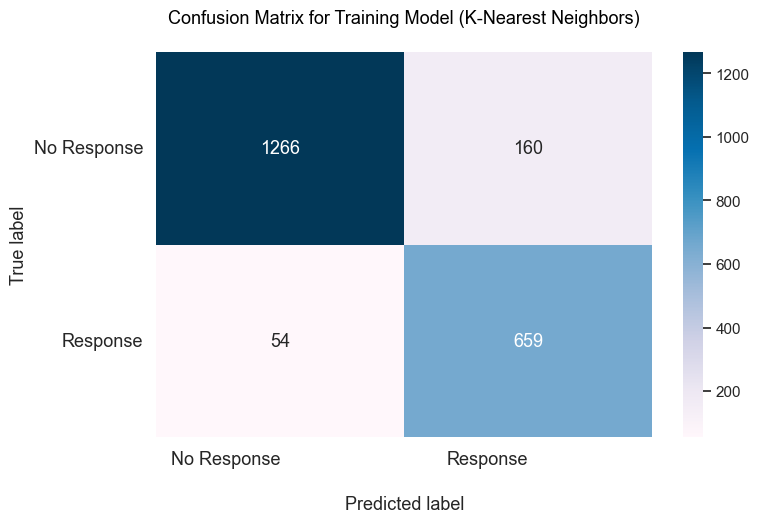

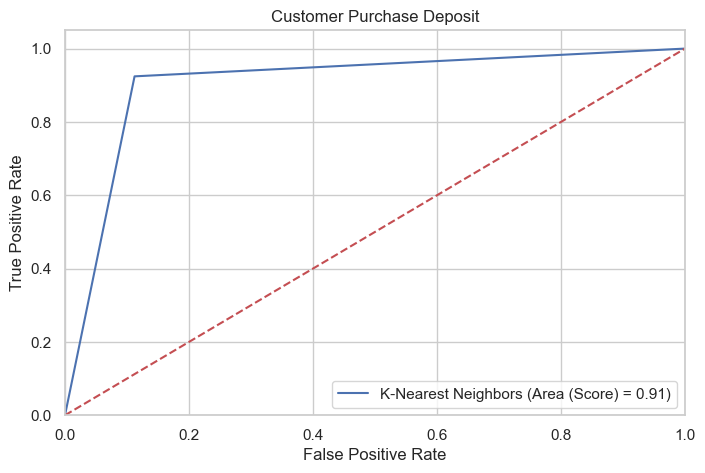

In [158]:
model_eval_train(knn_model, "K-Nearest Neighbors", X_train, y_train)

Based on the **classification report** results, the training model of `K-Nearest Neighbors` algorithms have a `fairly good accuracy`, but `quite low recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
     - `Response (TP) 153 times`
     - `No Response (TN) 2699 times`
     
       In reality, this value is a high indication of incorrect predictions FP = 40, FN = 295
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also quite low

#### **Performance of Testing Model**

Classification Report Testing Model (K-Nearest Neighbors):

Accuracy Score is :0.81
Precision Score is :0.403
Recall Score is :0.578
F1  Score is :0.475
ROC AUC Score is :0.715
Cross Val Score (k=10) is :0.876

              precision    recall  f1-score   support

           0       0.92      0.85      0.88       476
           1       0.40      0.58      0.48        83

    accuracy                           0.81       559
   macro avg       0.66      0.71      0.68       559
weighted avg       0.84      0.81      0.82       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 405, FP = 71, FN = 35, TP = 48
Predictly Correct = 453
Predictly Wrong = 106 



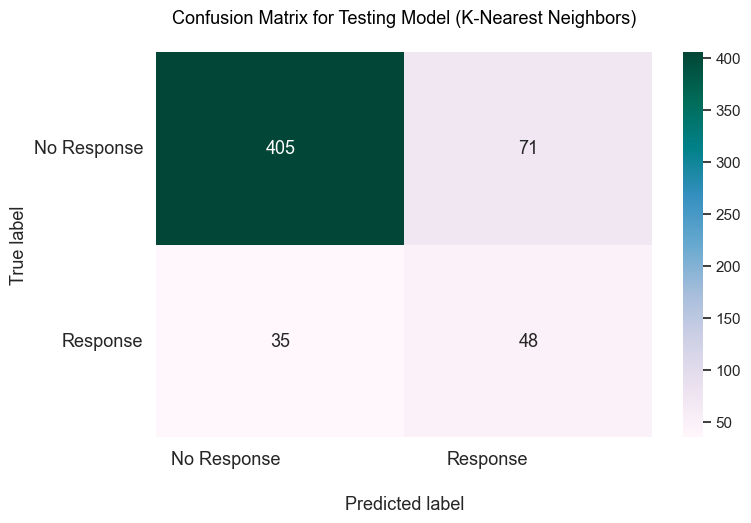

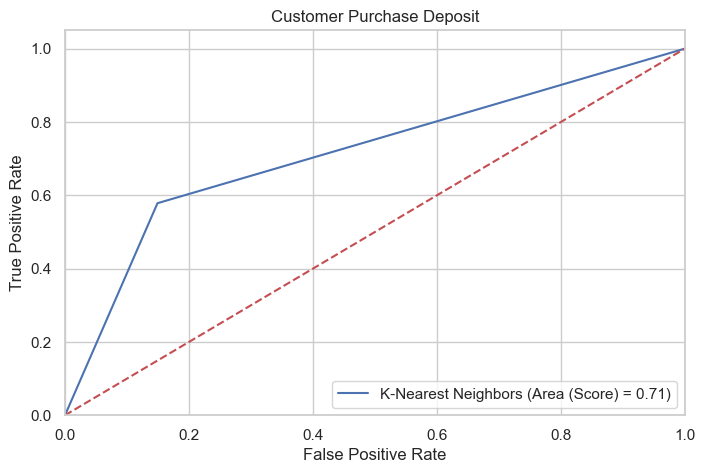

In [159]:
model_eval_test(knn_model, "K-Nearest Neighbors", X_test, y_test)

Based on the **classification report** results, the training model of `K-Nearest Neighbors` algorithms have a `fairly good accuracy`, but `very low on recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 41 times`
     - `No Response (TN) 890 times`
     
     In reality, this value is a high indication of incorrect predictions on both, FP = 23, FN = 109
- Response and No Response are not very good at classified classes
- Both Recalls and f1-scores are also very low

In [160]:
acc_knn_train=round(knn_model.score(X_train,y_train)*100,2)
acc_knn_test=round(knn_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_knn_train))
print("Test Accuracy: {} %".format(acc_knn_test))

Training Accuracy: 90.0 %
Test Accuracy: 81.04 %


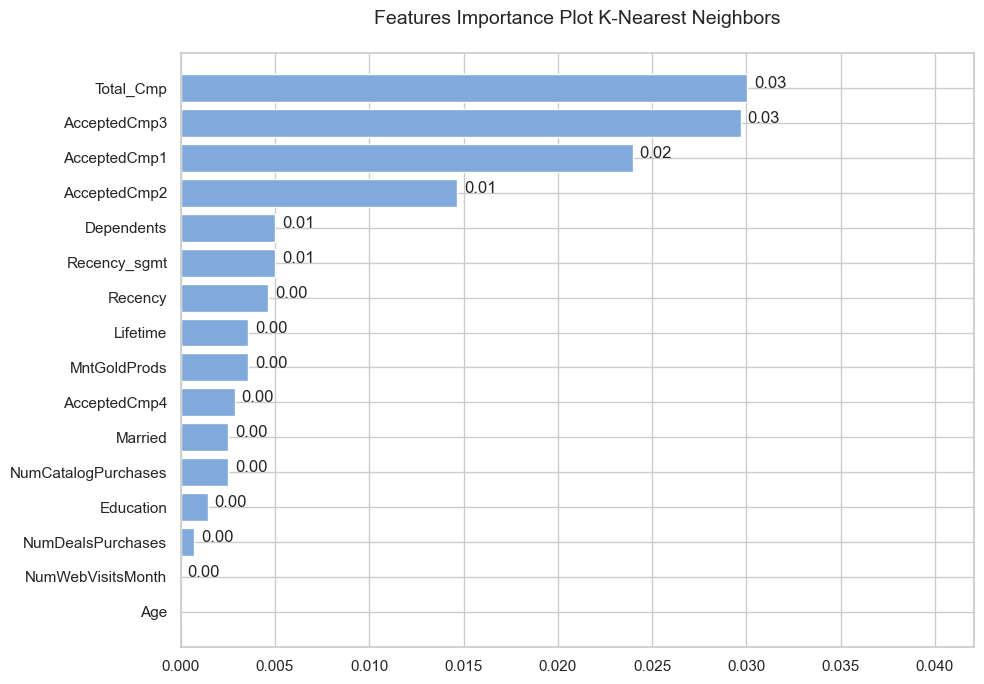

In [161]:
feature_importance_plot(knn_model, "K-Nearest Neighbors", X_train)

### **6. MLP Classifier (Neural Network)**

In [162]:
# train the model
mlp_model = MLPClassifier(random_state=1, max_iter=len(X_train)).fit(X_train, y_train)

eval_classification(mlp_model)

Accuracy (Train Set): 0.955
Accuracy (Test Set): 0.855
Precision (Train Set): 0.931
Precision (Test Set): 0.511
Recall (Train Set): 0.934
Recall (Test Set): 0.542
F1-Score (Train Set): 0.933
F1-Score (Test Set): 0.526
roc_auc (train-proba): 0.990
roc_auc (test-proba): 0.864
roc_auc (crossval train): 0.9849098815906425
roc_auc (crossval test): 0.8499367014779798


#### **Performance of Training Model**

Classification Report Training Model (MLP Classifier):

Accuracy Score is :0.955
Precision Score is :0.931
Recall Score is :0.934
F1  Score is :0.933
ROC AUC Score is :0.95
Cross Val Score (k=10) is :0.883

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1426
           1       0.93      0.93      0.93       713

    accuracy                           0.96      2139
   macro avg       0.95      0.95      0.95      2139
weighted avg       0.96      0.96      0.96      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Train) =====
TN = 1377, FP = 49, FN = 47, TP = 666
Predictly Correct = 2043
Predictly Wrong = 96 



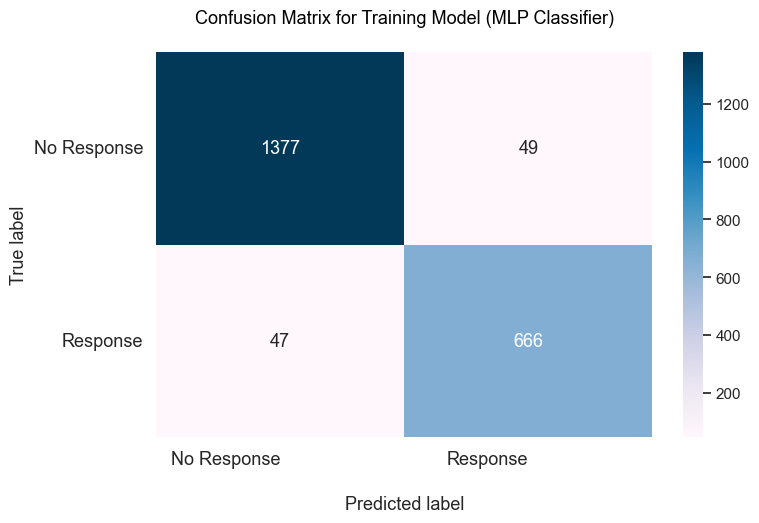

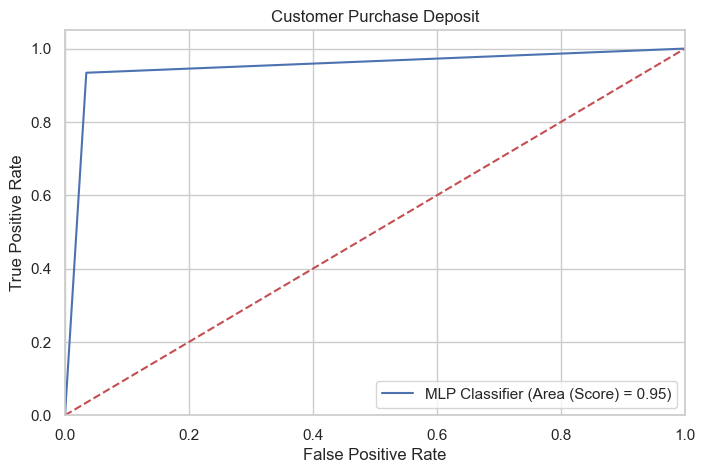

In [163]:
model_eval_train(mlp_model, "MLP Classifier", X_train, y_train)

Based on the **classification report** results, the training model of `MLP Classifier` algorithms have a `fairly good accuracy`, but `very low recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
    - `Response (TP) 65 times`
    - `No Response (TN) 2710 times`
     
        In reality, this value is a high indication of incorrect predictions FP = 29, FN = 383
- Response and No Response are both not very good at classified classes
- Both recall and f1-score are also very low

#### **Performance of Testing Model**

Classification Report Testing Model (MLP Classifier):

Accuracy Score is :0.855
Precision Score is :0.511
Recall Score is :0.542
F1  Score is :0.526
ROC AUC Score is :0.726
Cross Val Score (k=10) is :0.883

              precision    recall  f1-score   support

           0       0.92      0.91      0.91       476
           1       0.51      0.54      0.53        83

    accuracy                           0.86       559
   macro avg       0.72      0.73      0.72       559
weighted avg       0.86      0.86      0.86       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 433, FP = 43, FN = 38, TP = 45
Predictly Correct = 478
Predictly Wrong = 81 



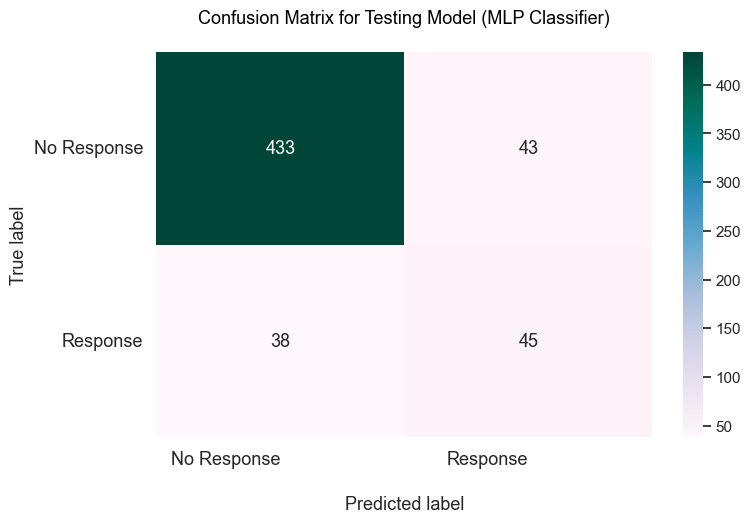

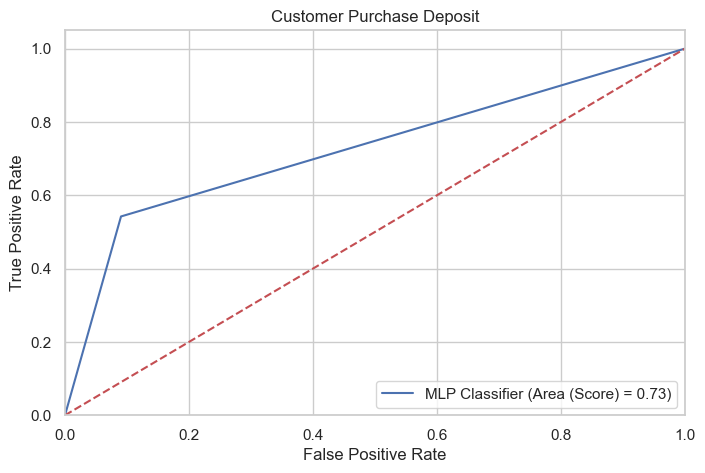

In [164]:
model_eval_test(mlp_model, "MLP Classifier", X_test, y_test)

Based on the **classification report** results, the training model of `MLP Classifier` algorithms have a `fairly good accuracy`, but `very low on recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 10 times`
     - `No Response (TN) 907 times`
     
     In reality, this value is a high indication of incorrect predictions on both, FP = 6, FN = 140
- Response and No Response are not very good at classified classes
- Both Recalls and f1-scores are also very low

In [165]:
acc_mlp_train=round(mlp_model.score(X_train,y_train)*100,2)
acc_mlp_test=round(mlp_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_mlp_train))
print("Test Accuracy: {} %".format(acc_mlp_test))

Training Accuracy: 95.51 %
Test Accuracy: 85.51 %


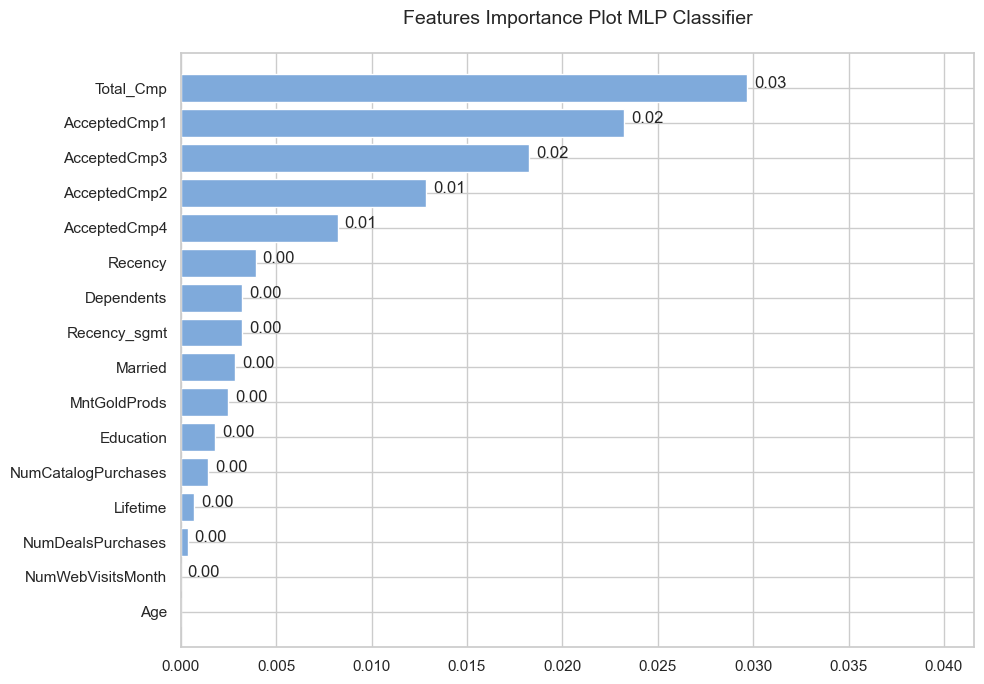

In [166]:
feature_importance_plot(mlp_model, "MLP Classifier", X_train)

### **7. XGBoost Classifier**

In [166]:
# train the model
xgb_model = XGBClassifier().fit(X_train, y_train)
eval_classification(xgb_model)

#### **Performance of Training Model**

Classification Report Training Model (XGBoost Classifier):

Accuracy Score is :0.997
Precision Score is :0.997
Recall Score is :0.996
F1  Score is :0.995
ROC AUC Score is :0.996
Cross Val Score (k=10) is :0.878

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1426
           1       0.99      1.00      1.00       713

    accuracy                           1.00      2139
   macro avg       1.00      1.00      1.00      2139
weighted avg       1.00      1.00      1.00      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Test) =====
TN = 1422, FP = 4, FN = 3, TP = 710
Predictly Correct = 2132
Predictly Wrong = 7 



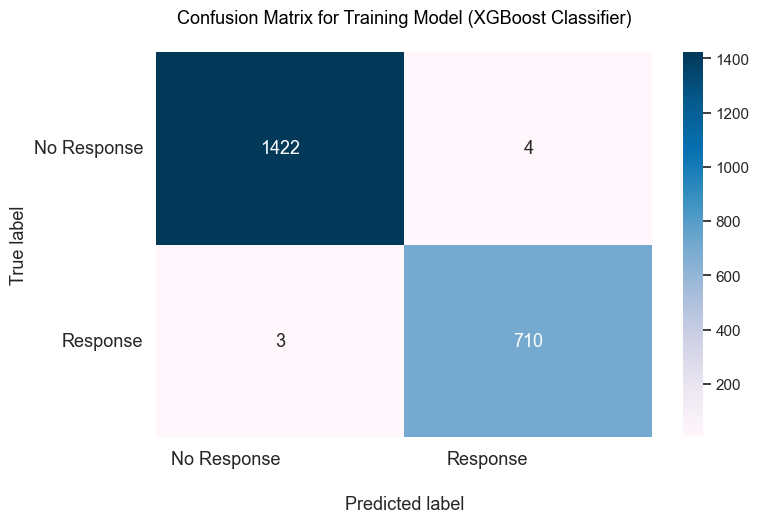

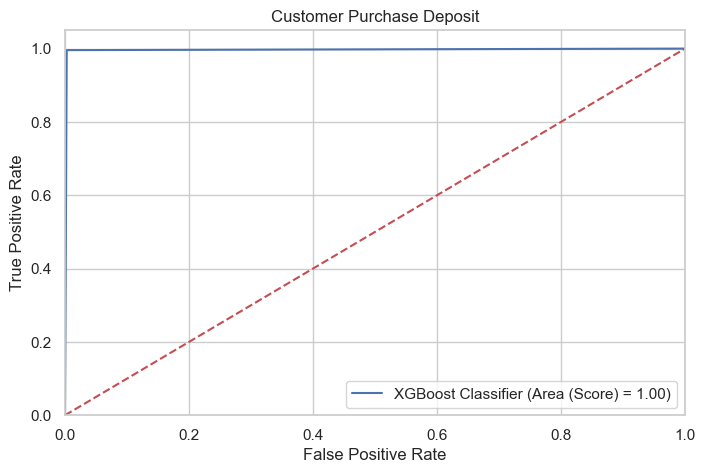

In [167]:
model_eval_train(xgb_model, "XGBoost Classifier", X_train, y_train)

Based on the **classification report** results, the training model of `XGBoost Classifier` algorithms also has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions. Everything is close to right.
- The classifier predicted
  - `Response (TP) 376 times`
  - `No Response (TN) 2737 times`
     
      In reality, Response status in the sample is compared that all are almost true.
- Response and No Response are both the best-classified classes approaching 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (XGBoost Classifier):

Accuracy Score is :0.889
Precision Score is :0.889
Recall Score is :0.566
F1  Score is :0.603
ROC AUC Score is :0.756
Cross Val Score (k=10) is :0.878

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       476
           1       0.64      0.57      0.60        83

    accuracy                           0.89       559
   macro avg       0.78      0.76      0.77       559
weighted avg       0.88      0.89      0.89       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 450, FP = 26, FN = 36, TP = 47
Predictly Correct = 497
Predictly Wrong = 62 



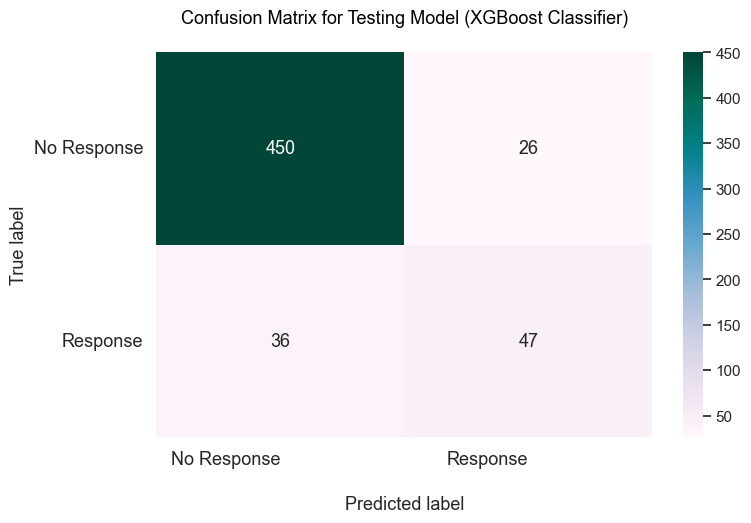

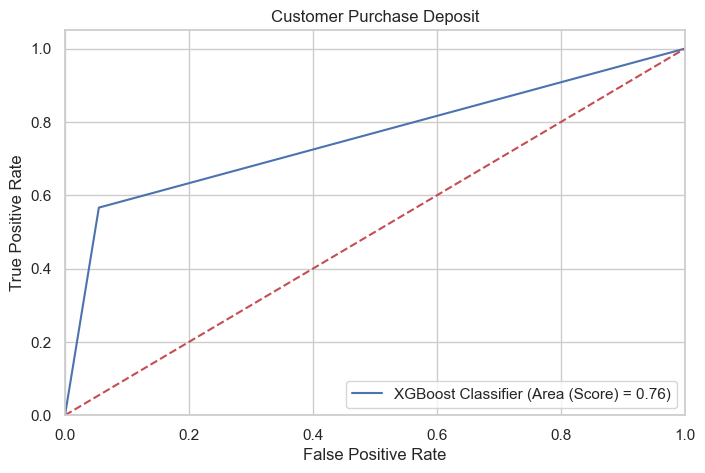

In [168]:
model_eval_test(xgb_model, "XGBoost Classifier", X_test, y_test)

Based on the **classification report** results, the testing model of `XGBoost Classifier` algorithms has a `very high accuracy, recall and f1 score` above 91%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 127 times`
     - `No Response (TN) 912 times`
- Response and No Response are both well classified. The model classified approaches 100% of them correctly.
- Both recall and f1-score are also pretty good

In [169]:
acc_xgb_train=round(xgb_model.score(X_train,y_train)*100,2)
acc_xgb_test=round(xgb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_xgb_train))
print("Test Accuracy: {} %".format(acc_xgb_test))

Training Accuracy: 99.67 %
Test Accuracy: 88.91 %


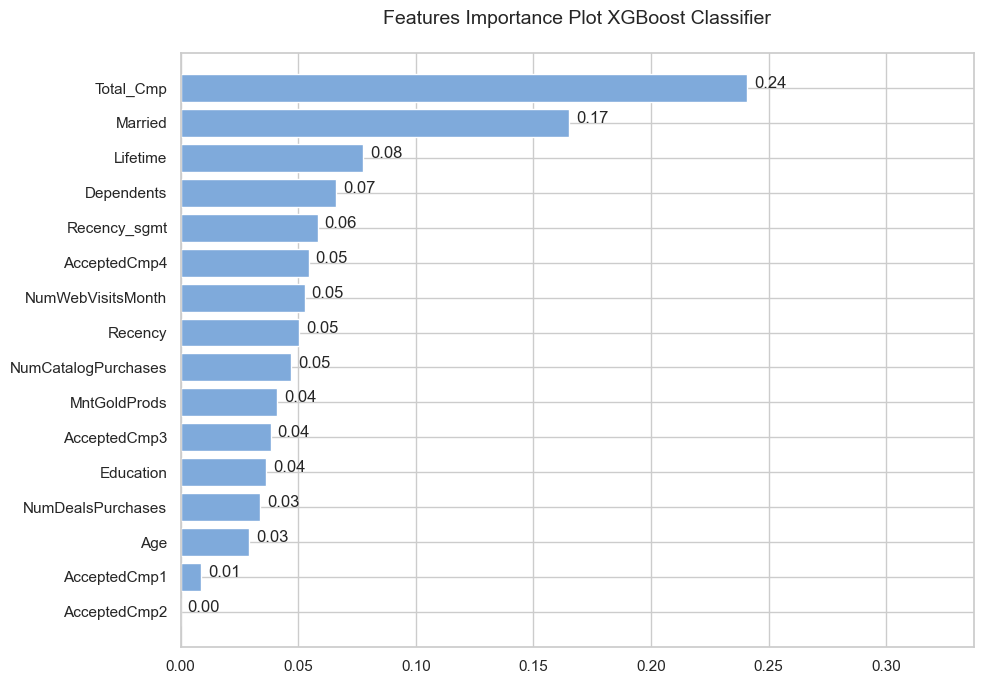

In [170]:
feature_importance_plot(xgb_model, "XGBoost Classifier")

### **8. Gradient Boosting Classifier**

In [171]:
# train the model
# gb_model = GradientBoostingClassifier().fit(X_train, y_train)
gb_model = GradientBoostingClassifier(learning_rate=0.01, n_estimators=400,max_depth=13).fit(X_train, y_train)
eval_classification(gb_model)

#### **Performance of Training Model**

Classification Report Training Model (Gradient Boosting Classifier):

Accuracy Score is :0.997
Precision Score is :0.997
Recall Score is :0.99
F1  Score is :0.995
ROC AUC Score is :0.995
Cross Val Score (k=10) is :0.846

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1426
           1       1.00      0.99      1.00       713

    accuracy                           1.00      2139
   macro avg       1.00      1.00      1.00      2139
weighted avg       1.00      1.00      1.00      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Test) =====
TN = 1426, FP = 0, FN = 7, TP = 706
Predictly Correct = 2132
Predictly Wrong = 7 



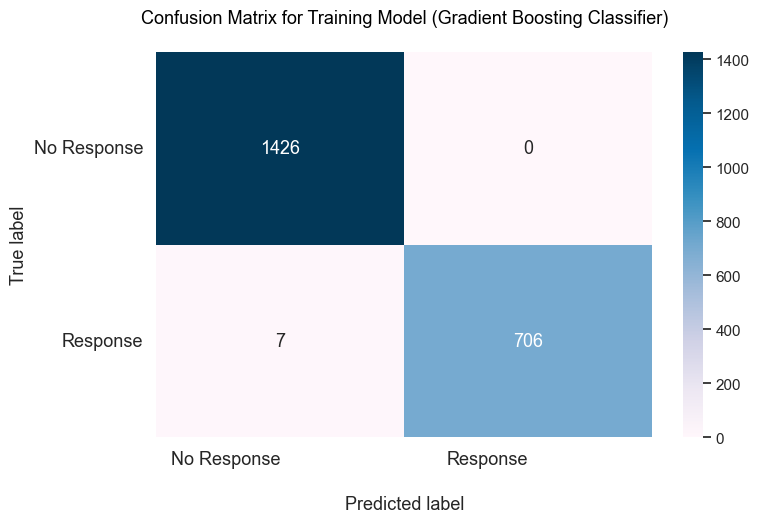

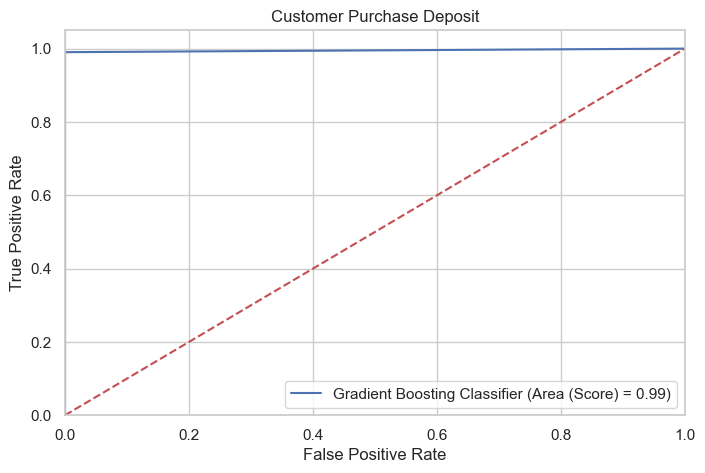

In [172]:
model_eval_train(gb_model, "Gradient Boosting Classifier", X_train, y_train)

Based on the **classification report** results, the training model of `Gradient Boosting Classifier` algorithms also has a `very high accuracy, recall and f1 score` value.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions. Everything is close to right.
- The classifier predicted
  - `Response (TP) 447 times`
  - `No Response (TN) 2739 times`
     
      In reality, Response status in the sample is compared that all are true.
- Response and No Response are both the best-classified classes 100% of them correctly.
- Both recall and f1-score are also very good

#### **Performance of Testing Model**

Classification Report Testing Model (Gradient Boosting Classifier):

Accuracy Score is :0.826
Precision Score is :0.826
Recall Score is :0.458
F1  Score is :0.439
ROC AUC Score is :0.674
Cross Val Score (k=10) is :0.847

              precision    recall  f1-score   support

           0       0.90      0.89      0.90       476
           1       0.42      0.46      0.44        83

    accuracy                           0.83       559
   macro avg       0.66      0.67      0.67       559
weighted avg       0.83      0.83      0.83       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 424, FP = 52, FN = 45, TP = 38
Predictly Correct = 462
Predictly Wrong = 97 



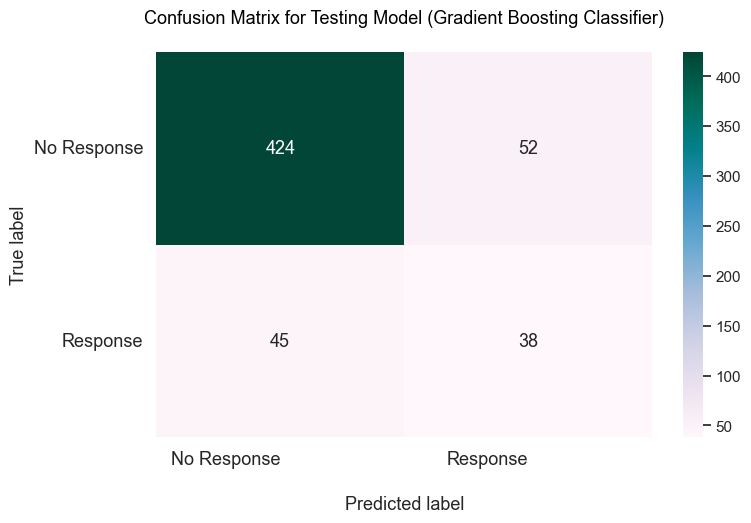

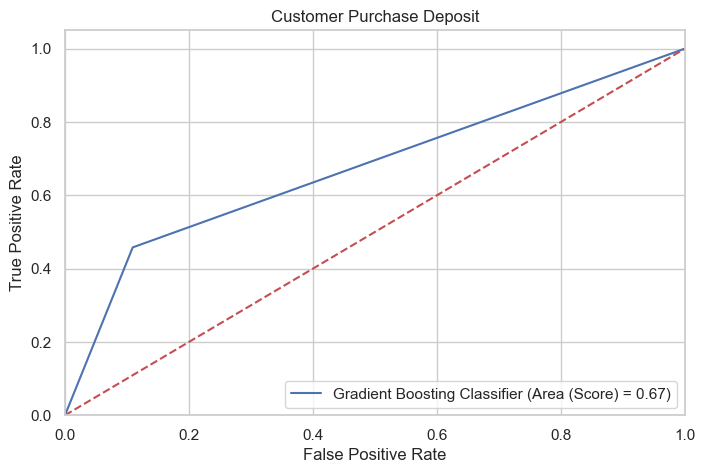

In [173]:
model_eval_test(gb_model, "Gradient Boosting Classifier", X_test, y_test)

Based on the **classification report** results, the testing model of `Gradient Boosting Classifier` algorithms has a `very high accuracy, recall and f1 score` above 91%.

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions. The classifier predicted
     - `Response (TP) 127 times`
     - `No Response (TN) 913 times`
- Response and No Response are both well classified. The model classified approaches 100% of them correctly.
- Both recall and f1-score are also very good

In [174]:
acc_gb_train=round(gb_model.score(X_train,y_train)*100,2)
acc_gb_test=round(gb_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_gb_train))
print("Test Accuracy: {} %".format(acc_gb_test))

Training Accuracy: 99.67 %
Test Accuracy: 82.65 %


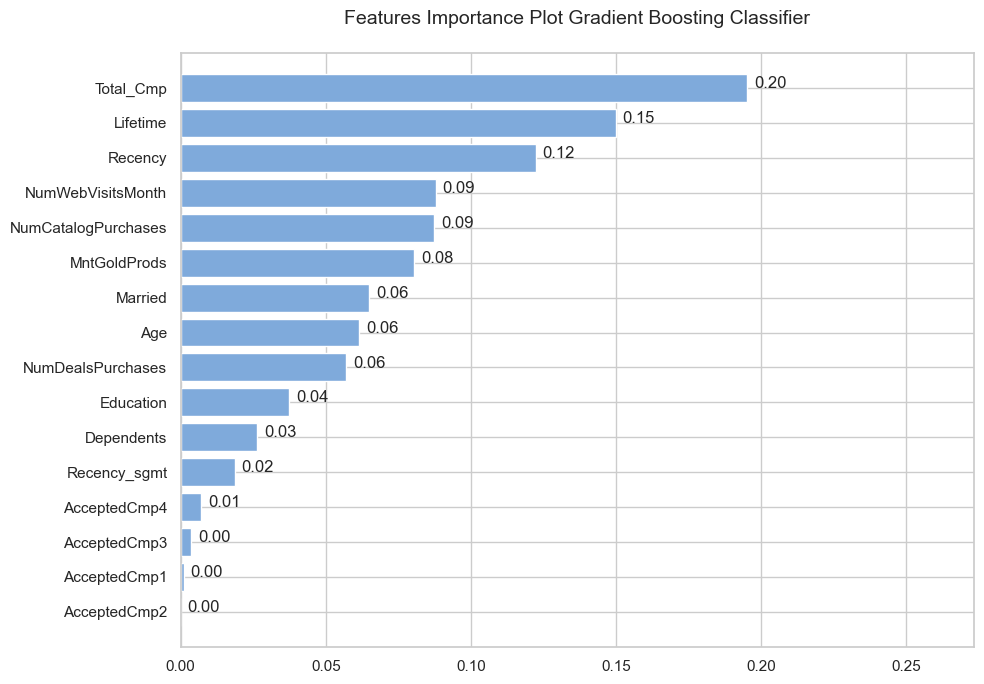

In [175]:
feature_importance_plot(gb_model, "Gradient Boosting Classifier")

### **9. Support Vector Machine**

In [176]:
# train the model
svm_model = SVC(kernel='rbf', probability=True).fit(X_train, y_train)
print(svm_model)
eval_classification(svm_model)

RandomForestClassifier()


#### **Performance of Training Model**

Classification Report Training Model (Support Vector Machine):

Accuracy Score is :0.847
Precision Score is :0.847
Recall Score is :0.682
F1  Score is :0.748
ROC AUC Score is :0.805
Cross Val Score (k=10) is :0.886

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1426
           1       0.83      0.68      0.75       713

    accuracy                           0.85      2139
   macro avg       0.84      0.81      0.82      2139
weighted avg       0.85      0.85      0.84      2139

==== Actual Data (Train) =====
Total = 2139
No Response = 1426
Response = 713
==== Predicted Data (Test) =====
TN = 1325, FP = 101, FN = 227, TP = 486
Predictly Correct = 1811
Predictly Wrong = 328 



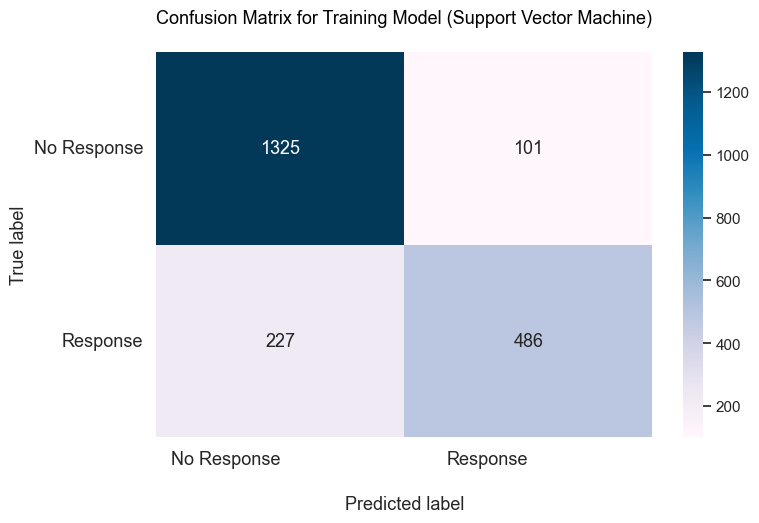

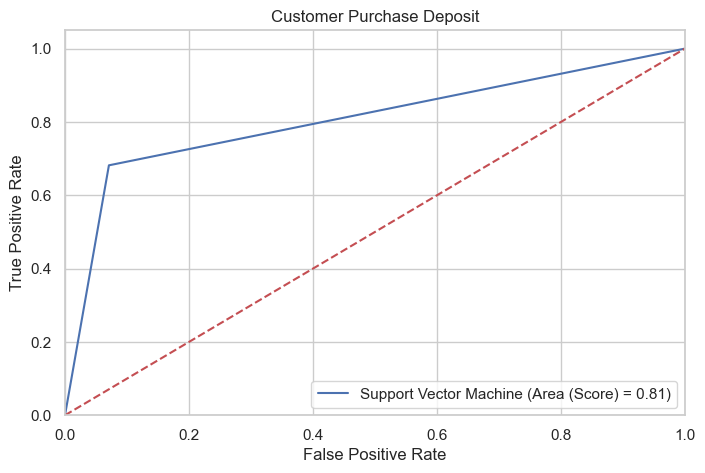

In [177]:
model_eval_train(svm_model, "Support Vector Machine", X_train, y_train)

Based on the **classification report** results, the training model of `Support Vector Machine` algorithms have a `fairly good accuracy`, but `very low recall and f1 score` value even up to 0% (FAIL).

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 3187 predictions.
- The classifier predicted
     - `Response (TP) 0, model failed prediction`
     - `No Response (TN) 2710 times`
     
         In reality, this value is a high indication of incorrect predictions on False Negative FN = 448
- No Response are not very good at classified classes
- Both recall and f1-score are also very low even up to 0% (FAIL).

#### **Performance of Testing Model**

Classification Report Testing Model (Support Vector Machine):

Accuracy Score is :0.869
Precision Score is :0.869
Recall Score is :0.566
F1  Score is :0.563
ROC AUC Score is :0.744
Cross Val Score (k=10) is :0.886

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       476
           1       0.56      0.57      0.56        83

    accuracy                           0.87       559
   macro avg       0.74      0.74      0.74       559
weighted avg       0.87      0.87      0.87       559

==== Actual Data (Test) =====
Total = 559
No Response = 476
Response = 83
==== Predicted Data (Test) =====
TN = 439, FP = 37, FN = 36, TP = 47
Predictly Correct = 486
Predictly Wrong = 73 



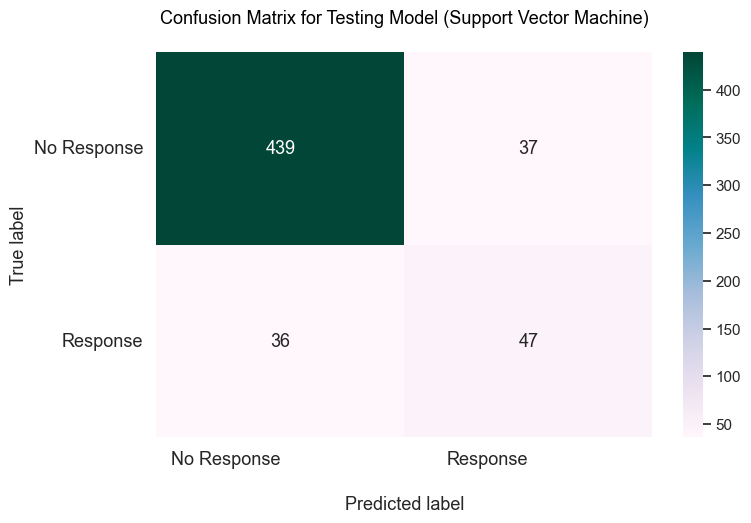

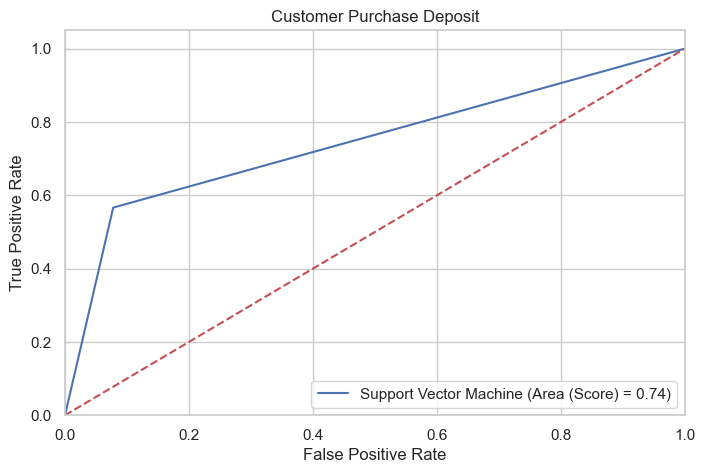

In [178]:
model_eval_test(svm_model, "Support Vector Machine", X_test, y_test)

Based on the **classification report** results, the testing model of `Support Vector Machine` algorithms have a `fairly good accuracy`, but `very low recall and f1 score` value even up to 0% (FAIL).

Based on **confusion matrix**, it is observed that:

- The classifier made a total of 1063 predictions.
- The classifier predicted
     - `Response (TP) 0, model failed prediction`
     - `No Response (TN) 913 times`
     
         In reality, this value is a high indication of incorrect predictions on False Negative FN = 150
- No Response are not very good at classified classes
- Both recall and f1-score are also very low even up to 0% (FAIL).

In [179]:
acc_svm_train=round(svm_model.score(X_train,y_train)*100,2)
acc_svm_test=round(svm_model.score(X_test,y_test)*100,2)
print("Training Accuracy: {} %".format(acc_svm_train))
print("Test Accuracy: {} %".format(acc_svm_test))

Training Accuracy: 84.67 %
Test Accuracy: 86.94 %


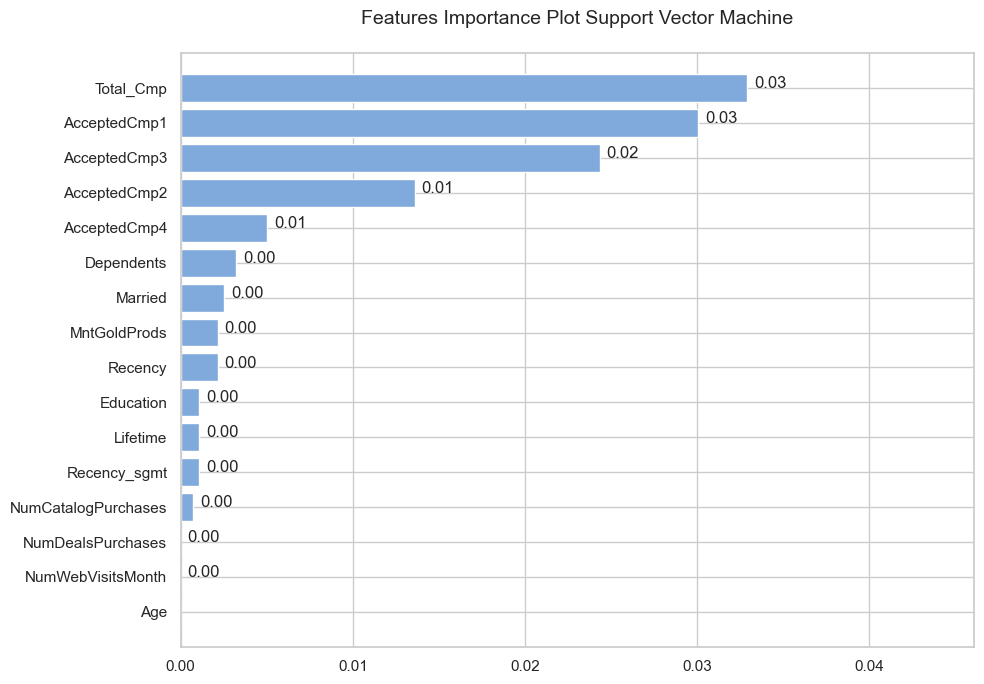

In [180]:
feature_importance_plot(svm_model, "Support Vector Machine", X_train)

## **Model Comparison**

The results will be evaluated and compared by looking at the accuracy value of each model. The accuracy value is the ratio of the number of correct predictions to the total number of input samples. I want the accuracy or correct prediction as high as possible. The following is the accuracy value of each model.

In [181]:
results_acc = pd.DataFrame({
    "Models" : train_modelname_list,
    "Training Accuracy Score" : train_accuracy_list,
    "Testing Accuracy Score" : test_accuracy_list
})

results_acc.sort_values(by=['Training Accuracy Score', 'Testing Accuracy Score'], ascending=[False,False]).reset_index(drop = True).style.background_gradient(cmap='Blues')

In [182]:
results_train = pd.DataFrame({
    'Model (Train)': train_modelname_list, 
    'Accuracy': train_accuracy_list,
    'Precision': train_precision_list, 
    'F1 Score': train_f1_score_list, 
    'Recall': train_recall_list,
    'ROC AUC Score': train_roc_auc_score_list,
    'Cross Val Score': train_cross_val_score_list
})

results_train.sort_values(by=['F1 Score', 'Recall', 'Cross Val Score'], ascending=False).reset_index(drop = True).style.background_gradient(cmap='Blues')

In [183]:
results_test = pd.DataFrame({
    'Model (Test)': test_modelname_list, 
    'Accuracy': test_accuracy_list, 
    'Precision': test_precision_list, 
    'F1 Score': test_f1_score_list, 
    'Recall': test_recall_list,
    'ROC AUC Score': train_roc_auc_score_list,
    'Cross Val Score': test_cross_val_score_list
})

results_test.sort_values(by=['F1 Score', 'Recall', 'Cross Val Score'], ascending=False).reset_index(drop = True).style.background_gradient(cmap='Blues')

## **Conclution & Recomendation**

### **Conclusion**

Of the several models tested, the chosen model is the `Random Forest`, because it has an `f-1 score (92%) and relatively high recall (87%) compared to the others`. The model also has the `highest Accuracy` which is `~97%`, this means the model is good enough to `minimize the occurrence of False Negatives (FN)`. In addition, the model has the ability to distinguish 0 (No Response) and 1 (Response) at the highest.

* Based on my observation I can see that most people who leave the service are the ones who use the service in the day/morning.
* It can also be observed that most people who use the service in the morning speak for shorter amounts of time but make more calls.
* International plan users are more consistent with their Response w.r.t the ones who do not have the service.Ini adalah faktor penting yang mempengaruhi customer Response

### **Recomendation**

* Introducing plans which minimize costs for more number of calls can be used.
* Decreasing the prices as the talk-time increases can be an effective way to reduce the Response.
* Improvement in the customer service can be done to reduce the number of calls which cause the Response.



# **Predict the Test Data**

After we use the model to predict the data we save the values in csv file to use in the submission 

## **Import Test Data**

In [184]:
# # df_test = pd.read_csv('./test.csv')
# df_test = pd.read_csv('https://drive.google.com/uc?id=119B0A1rJU-z1sY-ZCDreq3eiNx1M2gzM')
# test = df_test.copy()
# df_test.head()

In [185]:
# print("Shape of data :", df_test.shape)
# print("Number of rows :", df_test.shape[0])
# print("Number of columns :", df_test.shape[1])

## **Preprocessing**
We will also do the same treatment with the test data (according to the train data):
* Engineering Features
* Drop Unnecessary Columns
* Encoding
* Normalization

**Feature Engineering**

In [186]:
# df_test['total_net_minutes'] = df_test['total_day_minutes'] + df_test['total_eve_minutes'] + df_test['total_night_minutes']
# df_test['total_net_calls'] = df_test['total_day_calls'] + df_test['total_eve_calls'] + df_test['total_night_calls']
# df_test['total_net_charge'] = df_test['total_day_charge'] + df_test['total_eve_charge'] + df_test['total_night_charge']

In [187]:
# df_test.head()

**Drop Unnecessary Columns**

In [188]:
# df_test.drop(columns=['id', 'state', 'area_code'], inplace=True)

# df_test.drop(columns=['total_day_charge', 'total_eve_charge','total_night_charge',
#                  'total_day_calls','total_eve_calls', 'total_night_calls', 
#                  'total_day_minutes', 'total_eve_minutes', 'total_night_minutes'], inplace=True)

In [189]:
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()

# for i in cat_cols:
#   df_test[i] = le.fit_transform(df_test[i])
#   print(i)
#   print(list(le.classes_))
#   print(le.transform(list(le.classes_)))
#   print()

In [190]:
# from sklearn.preprocessing import MinMaxScaler

# # normalize the data for numerical stability
# scaler = MinMaxScaler()
# X_test = scaler.fit_transform(df_test)

## **Prediction & Save**

In [191]:
# pre = rf_model.predict(df_test)
# print(pre[:5])
# ans_rf_model = test[["id"]].copy()
# ans_rf_model["Response"] = pre
# ans_rf_model["Response"]= ans_rf_model["Response"].map({ 1: 'yes', 0 : 'no'}) 
# ans_rf_model.to_csv('sampleSubmission.csv', index=False)
# ans_rf_model.head()

In [192]:
# # table
# Response_test_grp = ans_rf_model.groupby('Response').size().reset_index()
# Response_test_grp.columns = ['Response','total']
# Response_test_grp['%'] = round(Response_test_grp['total']*100/sum(Response_test_grp['total']),2)
# Response_test_grp.sort_values(by='total', ascending=False).style.background_gradient(cmap='Blues')

In [193]:
# fig = plt.figure(figsize = (10, 5))
# colors = ["#43CDCC", "tab:orange"]
# sns.set_style('whitegrid')
# sns.set_palette(sns.color_palette(colors))

# plt.subplot(121)
# plt.pie(ans_rf_model.Response.value_counts(),labels = ['No Response', 'Response'], autopct = '%.1f%%', radius = 1, textprops={'fontsize': 10, 'fontweight': 'bold'})
# plt.title('Response Outcome Pie Chart', fontsize = 10, fontweight = 'bold')
# plt.subplot(122)
# t = sns.countplot(ans_rf_model.Response)
# t.set_xlabel('Response', fontweight = 'bold', fontsize = 10)
# t.set_ylabel('Count', fontweight = 'bold', fontsize = 10)
# plt.title('Response Outcome Distributions', fontsize = 10, fontweight = 'bold')
# plt.tight_layout()

# **====== STAGE 4 ======**
`Stage 4 (Final Preparation & Simulation)`